# Load the relevant libraries 

In [1]:
import cv2
import datetime as dt
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import csv
import os

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.getcwd()

'C:\\Users\\Aashish\\Desktop\\MURA'

# Load path of the images

In [3]:
#Load path to images
root_Path_CSV = 'C:/Users/Aashish/Desktop/MURA-v1.1/train_image_paths.csv'
#root_Path_CSV = 'MURA-v1.1/train_image_paths.csv'
with open(root_Path_CSV) as csvfile:
    path = csv.reader(csvfile, delimiter = ',')
    
    train_Image_Path = []
    
    for row in path:
        image = row[0]
        train_Image_Path.append(image)

In [4]:
len(train_Image_Path)

36808

In [5]:
root = 'C:/Users/Aashish/Desktop/'
path = []
for i in range(len(train_Image_Path)):
    pa = root + train_Image_Path[i]
    path.append(pa)

# Creating Labels for Images

In [6]:
#Assigning images appropriate labels
new_Labels = []
for i in range (0, len(train_Image_Path)):
    if "positive" in train_Image_Path[i]:
        new_Labels.append(1)
    elif "negative" in train_Image_Path[i]:
        new_Labels.append(0)
    else:
        new_Labels.append(None)

In [7]:
len(new_Labels)

36808

# Printing path to Images and Labels

In [8]:
#Printing new labels
for counter, value in enumerate(new_Labels):
    serial_Number = str(counter) + ")."
    print(serial_Number, "Image Path =", train_Image_Path[counter], "||", "Label =", value)

0). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png || Label = 1
1). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png || Label = 1
2). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png || Label = 1
3). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png || Label = 1
4). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png || Label = 1
5). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image3.png || Label = 1
6). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png || Label = 1
7). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image2.png || Label = 1
8). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image3.png || Label = 1
9). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/image1.png || Label = 1
10). Image Path = MU

156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00051/study2_negative/image2.png || Label = 0
157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00051/study2_negative/image3.png || Label = 0
158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00052/study1_positive/image1.png || Label = 1
159). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00052/study1_positive/image2.png || Label = 1
160). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00052/study1_positive/image3.png || Label = 1
161). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00052/study1_positive/image4.png || Label = 1
162). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00053/study1_positive/image1.png || Label = 1
163). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00053/study1_positive/image2.png || Label = 1
164). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00053/study1_positive/image3.png || Label = 1
165). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00053/study2_positive/image1.png || Label = 1


239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00076/study1_positive/image1.png || Label = 1
240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00076/study1_positive/image2.png || Label = 1
241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00077/study1_positive/image1.png || Label = 1
242). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00077/study1_positive/image2.png || Label = 1
243). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00077/study1_positive/image3.png || Label = 1
244). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00077/study1_positive/image4.png || Label = 1
245). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00077/study2_positive/image1.png || Label = 1
246). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00077/study2_positive/image2.png || Label = 1
247). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00078/study1_positive/image1.png || Label = 1
248). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00078/study1_positive/image2.png || Label = 1


322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00101/study1_positive/image4.png || Label = 1
323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00102/study1_positive/image1.png || Label = 1
324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00102/study1_positive/image2.png || Label = 1
325). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00102/study1_positive/image3.png || Label = 1
326). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00102/study1_positive/image4.png || Label = 1
327). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00103/study1_positive/image1.png || Label = 1
328). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00103/study1_positive/image2.png || Label = 1
329). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00104/study1_positive/image1.png || Label = 1
330). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00104/study1_positive/image2.png || Label = 1
331). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00104/study1_positive/image3.png || Label = 1


406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00126/study1_positive/image4.png || Label = 1
407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00127/study1_positive/image1.png || Label = 1
408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00127/study1_positive/image2.png || Label = 1
409). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00127/study1_positive/image3.png || Label = 1
410). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00127/study1_positive/image4.png || Label = 1
411). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00128/study1_positive/image1.png || Label = 1
412). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00128/study1_positive/image2.png || Label = 1
413). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00128/study1_positive/image3.png || Label = 1
414). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00128/study1_positive/image4.png || Label = 1
415). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00129/study1_positive/image1.png || Label = 1


489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00148/study1_positive/image2.png || Label = 1
490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00149/study1_positive/image1.png || Label = 1
491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00150/study1_positive/image1.png || Label = 1
492). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00150/study1_positive/image2.png || Label = 1
493). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00151/study1_positive/image1.png || Label = 1
494). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00151/study1_positive/image2.png || Label = 1
495). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00151/study1_positive/image3.png || Label = 1
496). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00152/study1_positive/image1.png || Label = 1
497). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00152/study1_positive/image2.png || Label = 1
498). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00152/study1_positive/image3.png || Label = 1


572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00178/study1_positive/image3.png || Label = 1
573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00178/study1_positive/image4.png || Label = 1
574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00179/study1_positive/image1.png || Label = 1
575). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00179/study1_positive/image2.png || Label = 1
576). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00179/study1_positive/image3.png || Label = 1
577). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00180/study1_positive/image1.png || Label = 1
578). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00180/study1_positive/image2.png || Label = 1
579). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00181/study1_positive/image1.png || Label = 1
580). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00181/study1_positive/image2.png || Label = 1
581). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00181/study1_positive/image3.png || Label = 1


655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00207/study1_positive/image2.png || Label = 1
656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00207/study1_positive/image3.png || Label = 1
657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00207/study1_positive/image4.png || Label = 1
658). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00208/study1_positive/image1.png || Label = 1
659). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00209/study1_positive/image1.png || Label = 1
660). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00209/study1_positive/image2.png || Label = 1
661). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00209/study1_positive/image3.png || Label = 1
662). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00209/study1_positive/image4.png || Label = 1
663). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00209/study1_positive/image5.png || Label = 1
664). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00210/study1_positive/image1.png || Label = 1


739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00234/study1_positive/image2.png || Label = 1
740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00234/study1_positive/image3.png || Label = 1
741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00235/study1_positive/image1.png || Label = 1
742). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00235/study1_positive/image2.png || Label = 1
743). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00235/study1_positive/image3.png || Label = 1
744). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00235/study1_positive/image4.png || Label = 1
745). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00236/study1_positive/image1.png || Label = 1
746). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00236/study1_positive/image2.png || Label = 1
747). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00237/study1_positive/image1.png || Label = 1
748). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00237/study1_positive/image2.png || Label = 1


822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00261/study1_positive/image3.png || Label = 1
823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00262/study1_positive/image1.png || Label = 1
824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00263/study1_positive/image1.png || Label = 1
825). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00264/study1_positive/image1.png || Label = 1
826). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00264/study1_positive/image2.png || Label = 1
827). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00264/study2_negative/image1.png || Label = 0
828). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00264/study2_negative/image2.png || Label = 0
829). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00264/study2_negative/image3.png || Label = 0
830). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00264/study2_negative/image4.png || Label = 0
831). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00265/study1_positive/image1.png || Label = 1


905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00287/study1_positive/image2.png || Label = 1
906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00287/study1_positive/image3.png || Label = 1
907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00287/study1_positive/image4.png || Label = 1
908). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00288/study1_positive/image1.png || Label = 1
909). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00288/study1_positive/image2.png || Label = 1
910). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00288/study1_positive/image3.png || Label = 1
911). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00289/study1_positive/image1.png || Label = 1
912). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00289/study1_positive/image2.png || Label = 1
913). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00289/study1_positive/image3.png || Label = 1
914). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00289/study1_positive/image4.png || Label = 1


988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00305/study1_positive/image3.png || Label = 1
989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00306/study1_positive/image1.png || Label = 1
990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00306/study1_positive/image2.png || Label = 1
991). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00307/study1_positive/image1.png || Label = 1
992). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00307/study1_positive/image2.png || Label = 1
993). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00307/study1_positive/image3.png || Label = 1
994). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00307/study1_positive/image4.png || Label = 1
995). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00308/study1_positive/image1.png || Label = 1
996). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00308/study1_positive/image2.png || Label = 1
997). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00309/study1_positive/image1.png || Label = 1


1072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00328/study2_positive/image3.png || Label = 1
1073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00329/study1_positive/image1.png || Label = 1
1074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00329/study1_positive/image2.png || Label = 1
1075). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00329/study1_positive/image3.png || Label = 1
1076). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00329/study1_positive/image4.png || Label = 1
1077). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00329/study2_negative/image1.png || Label = 0
1078). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00329/study2_negative/image2.png || Label = 0
1079). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00329/study2_negative/image3.png || Label = 0
1080). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00330/study1_positive/image1.png || Label = 1
1081). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00330/study1_positive/image2.png || 

1155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00355/study1_positive/image2.png || Label = 1
1156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00355/study1_positive/image3.png || Label = 1
1157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00356/study1_positive/image1.png || Label = 1
1158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00356/study1_positive/image2.png || Label = 1
1159). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00356/study1_positive/image3.png || Label = 1
1160). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00357/study1_positive/image1.png || Label = 1
1161). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00357/study1_positive/image2.png || Label = 1
1162). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00358/study1_positive/image1.png || Label = 1
1163). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00358/study1_positive/image2.png || Label = 1
1164). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00358/study1_positive/image3.png || 

1238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00383/study1_positive/image2.png || Label = 1
1239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00383/study1_positive/image3.png || Label = 1
1240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00383/study1_positive/image4.png || Label = 1
1241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00384/study1_positive/image1.png || Label = 1
1242). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00384/study1_positive/image2.png || Label = 1
1243). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00385/study1_positive/image1.png || Label = 1
1244). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00385/study1_positive/image2.png || Label = 1
1245). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00385/study1_positive/image3.png || Label = 1
1246). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00385/study1_positive/image4.png || Label = 1
1247). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00386/study1_positive/image1.png || 

1321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00410/study1_positive/image2.png || Label = 1
1322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00410/study1_positive/image3.png || Label = 1
1323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00411/study1_positive/image1.png || Label = 1
1324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00412/study1_positive/image1.png || Label = 1
1325). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00412/study1_positive/image2.png || Label = 1
1326). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00412/study1_positive/image3.png || Label = 1
1327). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00413/study1_positive/image1.png || Label = 1
1328). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00414/study1_positive/image1.png || Label = 1
1329). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00414/study1_positive/image2.png || Label = 1
1330). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00414/study1_positive/image3.png || 

1405). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00440/study2_negative/image2.png || Label = 0
1406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00440/study2_negative/image3.png || Label = 0
1407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00440/study2_negative/image4.png || Label = 0
1408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00441/study1_positive/image1.png || Label = 1
1409). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00441/study1_positive/image2.png || Label = 1
1410). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00441/study1_positive/image3.png || Label = 1
1411). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00442/study1_positive/image1.png || Label = 1
1412). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00442/study1_positive/image2.png || Label = 1
1413). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00443/study1_positive/image1.png || Label = 1
1414). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00443/study1_positive/image2.png || 

1488). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00470/study1_positive/image2.png || Label = 1
1489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00470/study1_positive/image3.png || Label = 1
1490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00470/study1_positive/image4.png || Label = 1
1491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00471/study1_positive/image1.png || Label = 1
1492). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00471/study1_positive/image2.png || Label = 1
1493). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00471/study1_positive/image3.png || Label = 1
1494). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00472/study1_positive/image1.png || Label = 1
1495). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00472/study1_positive/image2.png || Label = 1
1496). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00473/study1_positive/image1.png || Label = 1
1497). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00473/study1_positive/image2.png || 

1571). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00496/study1_positive/image3.png || Label = 1
1572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00496/study1_positive/image4.png || Label = 1
1573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00496/study1_positive/image5.png || Label = 1
1574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00497/study1_positive/image1.png || Label = 1
1575). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00497/study2_negative/image1.png || Label = 0
1576). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00497/study2_negative/image2.png || Label = 0
1577). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00497/study2_negative/image3.png || Label = 0
1578). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00497/study2_negative/image4.png || Label = 0
1579). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00498/study1_positive/image1.png || Label = 1
1580). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00498/study1_positive/image2.png || 

1654). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00522/study1_positive/image2.png || Label = 1
1655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00522/study1_positive/image3.png || Label = 1
1656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00523/study1_positive/image1.png || Label = 1
1657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00523/study1_positive/image2.png || Label = 1
1658). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00523/study1_positive/image3.png || Label = 1
1659). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00523/study1_positive/image4.png || Label = 1
1660). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00523/study1_positive/image5.png || Label = 1
1661). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00524/study1_positive/image1.png || Label = 1
1662). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00524/study1_positive/image2.png || Label = 1
1663). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00524/study1_positive/image3.png || 

1738). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00550/study2_negative/image1.png || Label = 0
1739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00550/study2_negative/image2.png || Label = 0
1740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study1_positive/image1.png || Label = 1
1741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study1_positive/image2.png || Label = 1
1742). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study1_positive/image3.png || Label = 1
1743). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study2_positive/image1.png || Label = 1
1744). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study2_positive/image2.png || Label = 1
1745). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study3_positive/image1.png || Label = 1
1746). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study3_positive/image2.png || Label = 1
1747). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00551/study3_positive/image3.png || 

1821). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00571/study1_positive/image1.png || Label = 1
1822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00571/study1_positive/image2.png || Label = 1
1823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00571/study2_negative/image1.png || Label = 0
1824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00571/study2_negative/image2.png || Label = 0
1825). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00571/study2_negative/image3.png || Label = 0
1826). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00572/study1_positive/image1.png || Label = 1
1827). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00572/study1_positive/image2.png || Label = 1
1828). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00572/study1_positive/image3.png || Label = 1
1829). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00573/study1_positive/image1.png || Label = 1
1830). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00573/study1_positive/image2.png || 

1904). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00602/study1_positive/image1.png || Label = 1
1905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00602/study1_positive/image2.png || Label = 1
1906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00602/study1_positive/image3.png || Label = 1
1907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00603/study1_positive/image1.png || Label = 1
1908). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00604/study1_positive/image1.png || Label = 1
1909). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00604/study1_positive/image2.png || Label = 1
1910). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00604/study2_positive/image1.png || Label = 1
1911). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00604/study2_positive/image2.png || Label = 1
1912). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00604/study2_positive/image3.png || Label = 1
1913). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00604/study3_negative/image1.png || 

1987). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00628/study1_positive/image1.png || Label = 1
1988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00628/study1_positive/image2.png || Label = 1
1989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00628/study1_positive/image3.png || Label = 1
1990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00628/study1_positive/image4.png || Label = 1
1991). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00629/study1_positive/image1.png || Label = 1
1992). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00629/study1_positive/image2.png || Label = 1
1993). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00629/study1_positive/image3.png || Label = 1
1994). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00629/study1_positive/image4.png || Label = 1
1995). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00629/study1_positive/image5.png || Label = 1
1996). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00630/study1_positive/image1.png || 

2071). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00655/study1_positive/image2.png || Label = 1
2072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00655/study1_positive/image3.png || Label = 1
2073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00656/study1_positive/image1.png || Label = 1
2074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00657/study1_positive/image1.png || Label = 1
2075). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00657/study1_positive/image2.png || Label = 1
2076). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00658/study1_positive/image1.png || Label = 1
2077). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00658/study1_positive/image2.png || Label = 1
2078). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00658/study1_positive/image3.png || Label = 1
2079). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00659/study1_positive/image1.png || Label = 1
2080). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00659/study1_positive/image2.png || 

2154). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00681/study1_positive/image2.png || Label = 1
2155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00681/study1_positive/image3.png || Label = 1
2156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00682/study1_positive/image1.png || Label = 1
2157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00682/study1_positive/image2.png || Label = 1
2158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00682/study1_positive/image3.png || Label = 1
2159). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00682/study1_positive/image4.png || Label = 1
2160). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00683/study1_positive/image1.png || Label = 1
2161). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00683/study1_positive/image2.png || Label = 1
2162). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00683/study1_positive/image3.png || Label = 1
2163). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00683/study1_positive/image4.png || 

2237). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00707/study1_positive/image4.png || Label = 1
2238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00708/study1_positive/image1.png || Label = 1
2239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00708/study1_positive/image2.png || Label = 1
2240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00708/study1_positive/image3.png || Label = 1
2241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00708/study1_positive/image4.png || Label = 1
2242). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00709/study1_positive/image1.png || Label = 1
2243). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00709/study1_positive/image2.png || Label = 1
2244). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00709/study1_positive/image3.png || Label = 1
2245). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00709/study1_positive/image4.png || Label = 1
2246). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00710/study1_positive/image1.png || 

2320). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00730/study2_positive/image4.png || Label = 1
2321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00731/study1_positive/image1.png || Label = 1
2322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00731/study1_positive/image2.png || Label = 1
2323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00732/study1_positive/image1.png || Label = 1
2324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00732/study1_positive/image2.png || Label = 1
2325). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00733/study1_positive/image1.png || Label = 1
2326). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00733/study1_positive/image2.png || Label = 1
2327). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00733/study1_positive/image3.png || Label = 1
2328). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00734/study1_positive/image1.png || Label = 1
2329). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00735/study1_positive/image1.png || 

2404). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00755/study1_positive/image2.png || Label = 1
2405). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00755/study1_positive/image3.png || Label = 1
2406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00755/study1_positive/image4.png || Label = 1
2407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00756/study1_positive/image1.png || Label = 1
2408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00756/study1_positive/image2.png || Label = 1
2409). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00756/study1_positive/image3.png || Label = 1
2410). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00756/study1_positive/image4.png || Label = 1
2411). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00757/study1_positive/image1.png || Label = 1
2412). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00757/study1_positive/image2.png || Label = 1
2413). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00758/study1_positive/image1.png || 

2487). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00783/study1_positive/image1.png || Label = 1
2488). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00783/study1_positive/image2.png || Label = 1
2489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00784/study1_positive/image1.png || Label = 1
2490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00784/study1_positive/image2.png || Label = 1
2491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00785/study1_positive/image1.png || Label = 1
2492). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00786/study1_positive/image1.png || Label = 1
2493). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00786/study1_positive/image2.png || Label = 1
2494). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00786/study1_positive/image3.png || Label = 1
2495). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00787/study1_positive/image1.png || Label = 1
2496). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00788/study1_positive/image1.png || 

2570). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00816/study1_positive/image1.png || Label = 1
2571). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00817/study1_positive/image1.png || Label = 1
2572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00817/study1_positive/image2.png || Label = 1
2573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00817/study1_positive/image3.png || Label = 1
2574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00818/study1_positive/image1.png || Label = 1
2575). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00818/study1_positive/image2.png || Label = 1
2576). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00818/study1_positive/image3.png || Label = 1
2577). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00819/study1_positive/image1.png || Label = 1
2578). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00819/study1_positive/image2.png || Label = 1
2579). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00820/study1_positive/image1.png || 

2653). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00844/study1_positive/image4.png || Label = 1
2654). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00845/study1_positive/image1.png || Label = 1
2655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00845/study1_positive/image2.png || Label = 1
2656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00846/study1_positive/image1.png || Label = 1
2657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00846/study1_positive/image2.png || Label = 1
2658). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00846/study1_positive/image3.png || Label = 1
2659). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00846/study2_negative/image1.png || Label = 0
2660). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00846/study2_negative/image2.png || Label = 0
2661). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00846/study2_negative/image3.png || Label = 0
2662). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00846/study2_negative/image4.png || 

2737). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00869/study1_positive/image3.png || Label = 1
2738). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00870/study1_positive/image1.png || Label = 1
2739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00870/study1_positive/image2.png || Label = 1
2740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00870/study1_positive/image3.png || Label = 1
2741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00870/study1_positive/image4.png || Label = 1
2742). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00871/study1_positive/image1.png || Label = 1
2743). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00871/study1_positive/image2.png || Label = 1
2744). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00871/study1_positive/image3.png || Label = 1
2745). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00872/study1_positive/image1.png || Label = 1
2746). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00872/study1_positive/image2.png || 

2820). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00898/study1_positive/image3.png || Label = 1
2821). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00898/study1_positive/image4.png || Label = 1
2822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00899/study1_positive/image1.png || Label = 1
2823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00899/study1_positive/image2.png || Label = 1
2824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00899/study1_positive/image3.png || Label = 1
2825). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00899/study1_positive/image4.png || Label = 1
2826). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00900/study1_positive/image1.png || Label = 1
2827). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00900/study1_positive/image2.png || Label = 1
2828). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00901/study1_positive/image1.png || Label = 1
2829). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00901/study1_positive/image2.png || 

2903). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00925/study1_positive/image3.png || Label = 1
2904). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00926/study1_positive/image1.png || Label = 1
2905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00926/study1_positive/image2.png || Label = 1
2906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00927/study1_positive/image1.png || Label = 1
2907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00927/study1_positive/image2.png || Label = 1
2908). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00927/study1_positive/image3.png || Label = 1
2909). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00927/study1_positive/image4.png || Label = 1
2910). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00928/study1_positive/image1.png || Label = 1
2911). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00928/study1_positive/image2.png || Label = 1
2912). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00928/study1_positive/image3.png || 

2986). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00950/study1_positive/image2.png || Label = 1
2987). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00950/study1_positive/image3.png || Label = 1
2988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00951/study1_positive/image1.png || Label = 1
2989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00951/study1_positive/image2.png || Label = 1
2990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00952/study1_positive/image1.png || Label = 1
2991). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00953/study1_positive/image1.png || Label = 1
2992). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00953/study1_positive/image2.png || Label = 1
2993). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00954/study1_positive/image1.png || Label = 1
2994). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00954/study1_positive/image2.png || Label = 1
2995). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00954/study1_positive/image3.png || 

3070). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00979/study1_positive/image1.png || Label = 1
3071). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00979/study1_positive/image2.png || Label = 1
3072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00980/study1_positive/image1.png || Label = 1
3073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00980/study1_positive/image2.png || Label = 1
3074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00980/study1_positive/image3.png || Label = 1
3075). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00980/study1_positive/image4.png || Label = 1
3076). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00981/study1_positive/image1.png || Label = 1
3077). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00981/study1_positive/image2.png || Label = 1
3078). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00982/study1_positive/image1.png || Label = 1
3079). Image Path = MURA-v1.1/train/XR_SHOULDER/patient00983/study1_positive/image1.png || 

3153). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01008/study1_positive/image3.png || Label = 1
3154). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01008/study1_positive/image4.png || Label = 1
3155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01008/study1_positive/image5.png || Label = 1
3156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01009/study1_positive/image1.png || Label = 1
3157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01009/study1_positive/image2.png || Label = 1
3158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01009/study1_positive/image3.png || Label = 1
3159). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01009/study1_positive/image4.png || Label = 1
3160). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01010/study1_positive/image1.png || Label = 1
3161). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01010/study1_positive/image2.png || Label = 1
3162). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01010/study1_positive/image3.png || 

3236). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01038/study1_positive/image3.png || Label = 1
3237). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01039/study1_positive/image1.png || Label = 1
3238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01039/study1_positive/image2.png || Label = 1
3239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01039/study1_positive/image3.png || Label = 1
3240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01039/study1_positive/image4.png || Label = 1
3241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01040/study1_positive/image1.png || Label = 1
3242). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01041/study1_positive/image1.png || Label = 1
3243). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01042/study1_positive/image1.png || Label = 1
3244). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01042/study1_positive/image2.png || Label = 1
3245). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01042/study1_positive/image3.png || 

3319). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01067/study1_positive/image2.png || Label = 1
3320). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01067/study1_positive/image3.png || Label = 1
3321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01068/study1_positive/image1.png || Label = 1
3322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01068/study1_positive/image2.png || Label = 1
3323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01068/study1_positive/image3.png || Label = 1
3324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01068/study1_positive/image4.png || Label = 1
3325). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01069/study1_positive/image1.png || Label = 1
3326). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01069/study1_positive/image2.png || Label = 1
3327). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01070/study1_positive/image1.png || Label = 1
3328). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01070/study1_positive/image2.png || 

3403). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01095/study1_positive/image1.png || Label = 1
3404). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01095/study1_positive/image2.png || Label = 1
3405). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01095/study1_positive/image3.png || Label = 1
3406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01095/study1_positive/image4.png || Label = 1
3407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01096/study1_positive/image1.png || Label = 1
3408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01097/study1_positive/image1.png || Label = 1
3409). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01097/study1_positive/image2.png || Label = 1
3410). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01097/study1_positive/image3.png || Label = 1
3411). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01097/study1_positive/image4.png || Label = 1
3412). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01098/study1_positive/image1.png || 

3486). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01126/study1_positive/image2.png || Label = 1
3487). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01126/study1_positive/image3.png || Label = 1
3488). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01126/study2_positive/image1.png || Label = 1
3489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01126/study2_positive/image2.png || Label = 1
3490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01127/study1_positive/image1.png || Label = 1
3491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01127/study1_positive/image2.png || Label = 1
3492). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01127/study1_positive/image3.png || Label = 1
3493). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01127/study1_positive/image4.png || Label = 1
3494). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01128/study1_positive/image1.png || Label = 1
3495). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01128/study1_positive/image2.png || 

3569). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01151/study1_positive/image4.png || Label = 1
3570). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01152/study1_positive/image1.png || Label = 1
3571). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01152/study1_positive/image2.png || Label = 1
3572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01152/study1_positive/image3.png || Label = 1
3573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01153/study1_positive/image1.png || Label = 1
3574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01153/study1_positive/image2.png || Label = 1
3575). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01153/study1_positive/image3.png || Label = 1
3576). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01153/study1_positive/image4.png || Label = 1
3577). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01154/study1_positive/image1.png || Label = 1
3578). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01154/study1_positive/image2.png || 

3652). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01178/study1_positive/image3.png || Label = 1
3653). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01178/study1_positive/image4.png || Label = 1
3654). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01179/study1_positive/image1.png || Label = 1
3655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01179/study1_positive/image2.png || Label = 1
3656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01179/study1_positive/image3.png || Label = 1
3657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01179/study1_positive/image4.png || Label = 1
3658). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01180/study1_positive/image1.png || Label = 1
3659). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01181/study1_positive/image1.png || Label = 1
3660). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01181/study1_positive/image2.png || Label = 1
3661). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01181/study1_positive/image3.png || 

3736). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01207/study1_positive/image1.png || Label = 1
3737). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01207/study1_positive/image2.png || Label = 1
3738). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01208/study1_positive/image1.png || Label = 1
3739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01208/study1_positive/image2.png || Label = 1
3740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01208/study1_positive/image3.png || Label = 1
3741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01209/study1_positive/image1.png || Label = 1
3742). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01209/study1_positive/image2.png || Label = 1
3743). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01209/study1_positive/image3.png || Label = 1
3744). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01209/study1_positive/image4.png || Label = 1
3745). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01210/study1_positive/image1.png || 

3819). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01235/study1_positive/image1.png || Label = 1
3820). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01235/study1_positive/image2.png || Label = 1
3821). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01236/study1_positive/image1.png || Label = 1
3822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01236/study1_positive/image2.png || Label = 1
3823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01237/study1_positive/image1.png || Label = 1
3824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01237/study1_positive/image2.png || Label = 1
3825). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01238/study1_positive/image1.png || Label = 1
3826). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01238/study1_positive/image2.png || Label = 1
3827). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01238/study1_positive/image3.png || Label = 1
3828). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01239/study1_positive/image1.png || 

3902). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01267/study1_positive/image1.png || Label = 1
3903). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01267/study1_positive/image2.png || Label = 1
3904). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01267/study1_positive/image3.png || Label = 1
3905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01267/study1_positive/image4.png || Label = 1
3906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01267/study1_positive/image5.png || Label = 1
3907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01268/study1_positive/image1.png || Label = 1
3908). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01268/study1_positive/image2.png || Label = 1
3909). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01268/study1_positive/image3.png || Label = 1
3910). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01269/study1_positive/image1.png || Label = 1
3911). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01269/study1_positive/image2.png || 

3985). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01294/study1_positive/image5.png || Label = 1
3986). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01295/study1_positive/image1.png || Label = 1
3987). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01296/study1_positive/image1.png || Label = 1
3988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01296/study1_positive/image2.png || Label = 1
3989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01296/study1_positive/image3.png || Label = 1
3990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01296/study1_positive/image4.png || Label = 1
3991). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01297/study1_positive/image1.png || Label = 1
3992). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01298/study1_positive/image1.png || Label = 1
3993). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01298/study1_positive/image2.png || Label = 1
3994). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01298/study1_positive/image3.png || 

4069). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01321/study1_positive/image3.png || Label = 1
4070). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01321/study1_positive/image4.png || Label = 1
4071). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01322/study1_positive/image1.png || Label = 1
4072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01323/study1_positive/image1.png || Label = 1
4073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01323/study1_positive/image2.png || Label = 1
4074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01323/study1_positive/image3.png || Label = 1
4075). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01323/study1_positive/image4.png || Label = 1
4076). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01324/study1_positive/image1.png || Label = 1
4077). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01324/study1_positive/image2.png || Label = 1
4078). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01324/study1_positive/image3.png || 

4152). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01349/study1_positive/image1.png || Label = 1
4153). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01349/study1_positive/image2.png || Label = 1
4154). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01350/study1_positive/image1.png || Label = 1
4155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01350/study1_positive/image2.png || Label = 1
4156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01350/study1_positive/image3.png || Label = 1
4157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01350/study1_positive/image4.png || Label = 1
4158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01351/study1_positive/image1.png || Label = 1
4159). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01351/study1_positive/image2.png || Label = 1
4160). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01351/study1_positive/image3.png || Label = 1
4161). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01351/study1_positive/image4.png || 

4235). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01375/study1_positive/image2.png || Label = 1
4236). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01376/study1_positive/image1.png || Label = 1
4237). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01377/study1_positive/image1.png || Label = 1
4238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01377/study1_positive/image2.png || Label = 1
4239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01377/study1_positive/image3.png || Label = 1
4240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01377/study1_positive/image4.png || Label = 1
4241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01377/study1_positive/image5.png || Label = 1
4242). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01378/study1_positive/image1.png || Label = 1
4243). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01378/study1_positive/image2.png || Label = 1
4244). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01378/study1_positive/image3.png || 

4318). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01407/study1_positive/image3.png || Label = 1
4319). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01407/study1_positive/image4.png || Label = 1
4320). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01408/study1_positive/image1.png || Label = 1
4321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01408/study1_positive/image2.png || Label = 1
4322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01409/study1_positive/image1.png || Label = 1
4323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01409/study1_positive/image2.png || Label = 1
4324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01410/study1_positive/image1.png || Label = 1
4325). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01411/study1_positive/image1.png || Label = 1
4326). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01411/study1_positive/image2.png || Label = 1
4327). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01411/study1_positive/image3.png || 

4402). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01433/study1_negative/image2.png || Label = 0
4403). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01433/study1_negative/image3.png || Label = 0
4404). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01433/study1_negative/image4.png || Label = 0
4405). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01434/study1_negative/image1.png || Label = 0
4406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01434/study1_negative/image2.png || Label = 0
4407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01435/study1_negative/image1.png || Label = 0
4408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01435/study1_negative/image2.png || Label = 0
4409). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01435/study1_negative/image3.png || Label = 0
4410). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01435/study1_negative/image4.png || Label = 0
4411). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01436/study1_negative/image1.png || 

4485). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01458/study2_negative/image2.png || Label = 0
4486). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01458/study2_negative/image3.png || Label = 0
4487). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01459/study1_negative/image1.png || Label = 0
4488). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01459/study1_negative/image2.png || Label = 0
4489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01459/study1_negative/image3.png || Label = 0
4490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01460/study1_negative/image1.png || Label = 0
4491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01460/study1_negative/image2.png || Label = 0
4492). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01460/study1_negative/image3.png || Label = 0
4493). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01460/study1_negative/image4.png || Label = 0
4494). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01461/study1_negative/image1.png || 

4568). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01486/study1_negative/image3.png || Label = 0
4569). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01487/study1_negative/image1.png || Label = 0
4570). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01487/study1_negative/image2.png || Label = 0
4571). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01487/study1_negative/image3.png || Label = 0
4572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01488/study1_negative/image1.png || Label = 0
4573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01488/study1_negative/image2.png || Label = 0
4574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01488/study1_negative/image3.png || Label = 0
4575). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01489/study1_negative/image1.png || Label = 0
4576). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01489/study1_negative/image2.png || Label = 0
4577). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01489/study1_negative/image3.png || 

4651). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01511/study1_negative/image3.png || Label = 0
4652). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01511/study1_negative/image4.png || Label = 0
4653). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01512/study1_negative/image1.png || Label = 0
4654). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01512/study1_negative/image2.png || Label = 0
4655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01512/study1_negative/image3.png || Label = 0
4656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01513/study1_negative/image1.png || Label = 0
4657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01513/study1_negative/image2.png || Label = 0
4658). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01513/study1_negative/image3.png || Label = 0
4659). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01514/study1_negative/image1.png || Label = 0
4660). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01514/study1_negative/image2.png || 

4735). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01540/study1_negative/image2.png || Label = 0
4736). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01540/study1_negative/image3.png || Label = 0
4737). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01541/study1_negative/image1.png || Label = 0
4738). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01542/study1_negative/image1.png || Label = 0
4739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01542/study1_negative/image2.png || Label = 0
4740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01542/study1_negative/image3.png || Label = 0
4741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01543/study1_negative/image1.png || Label = 0
4742). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01543/study1_negative/image2.png || Label = 0
4743). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01543/study1_negative/image3.png || Label = 0
4744). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01544/study1_negative/image1.png || 

4818). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01566/study1_negative/image3.png || Label = 0
4819). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01566/study1_negative/image4.png || Label = 0
4820). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01567/study1_negative/image1.png || Label = 0
4821). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01567/study1_negative/image2.png || Label = 0
4822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01568/study1_negative/image1.png || Label = 0
4823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01568/study1_negative/image2.png || Label = 0
4824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01568/study1_negative/image3.png || Label = 0
4825). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01568/study1_negative/image4.png || Label = 0
4826). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01569/study1_negative/image1.png || Label = 0
4827). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01569/study1_negative/image2.png || 

4901). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01594/study1_negative/image4.png || Label = 0
4902). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01595/study1_negative/image1.png || Label = 0
4903). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01595/study1_negative/image2.png || Label = 0
4904). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01595/study1_negative/image3.png || Label = 0
4905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01596/study1_negative/image1.png || Label = 0
4906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01596/study1_negative/image2.png || Label = 0
4907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01596/study1_negative/image3.png || Label = 0
4908). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01597/study1_negative/image1.png || Label = 0
4909). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01597/study1_negative/image2.png || Label = 0
4910). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01598/study1_negative/image1.png || 

4984). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01623/study1_negative/image3.png || Label = 0
4985). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01624/study1_negative/image1.png || Label = 0
4986). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01624/study1_negative/image2.png || Label = 0
4987). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01625/study1_negative/image1.png || Label = 0
4988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01625/study1_negative/image2.png || Label = 0
4989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01625/study1_negative/image3.png || Label = 0
4990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01625/study1_negative/image4.png || Label = 0
4991). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01626/study1_negative/image1.png || Label = 0
4992). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01626/study1_negative/image2.png || Label = 0
4993). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01627/study1_negative/image1.png || 

5068). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01650/study1_negative/image1.png || Label = 0
5069). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01650/study1_negative/image2.png || Label = 0
5070). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01650/study1_negative/image3.png || Label = 0
5071). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01650/study1_negative/image4.png || Label = 0
5072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01651/study1_negative/image1.png || Label = 0
5073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01651/study1_negative/image2.png || Label = 0
5074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01651/study1_negative/image3.png || Label = 0
5075). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01651/study1_negative/image4.png || Label = 0
5076). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01652/study1_negative/image1.png || Label = 0
5077). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01652/study1_negative/image2.png || 

5151). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01676/study1_negative/image1.png || Label = 0
5152). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01676/study1_negative/image2.png || Label = 0
5153). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01676/study1_negative/image3.png || Label = 0
5154). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01676/study2_negative/image1.png || Label = 0
5155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01676/study2_negative/image2.png || Label = 0
5156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01676/study2_negative/image3.png || Label = 0
5157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01677/study1_negative/image1.png || Label = 0
5158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01677/study1_negative/image2.png || Label = 0
5159). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01677/study1_negative/image3.png || Label = 0
5160). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01677/study1_negative/image4.png || 

5234). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01700/study1_negative/image3.png || Label = 0
5235). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01701/study1_negative/image1.png || Label = 0
5236). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01701/study1_negative/image2.png || Label = 0
5237). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01701/study1_negative/image3.png || Label = 0
5238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01702/study1_negative/image1.png || Label = 0
5239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01702/study1_negative/image2.png || Label = 0
5240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01702/study1_negative/image3.png || Label = 0
5241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01702/study1_negative/image4.png || Label = 0
5242). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01703/study1_negative/image1.png || Label = 0
5243). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01703/study1_negative/image2.png || 

5317). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01722/study2_negative/image4.png || Label = 0
5318). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01723/study1_negative/image1.png || Label = 0
5319). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01723/study1_negative/image2.png || Label = 0
5320). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01723/study1_negative/image3.png || Label = 0
5321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01724/study1_negative/image1.png || Label = 0
5322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01725/study1_negative/image1.png || Label = 0
5323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01725/study1_negative/image2.png || Label = 0
5324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01725/study1_negative/image3.png || Label = 0
5325). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01725/study1_negative/image4.png || Label = 0
5326). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01726/study1_negative/image1.png || 

5401). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01751/study1_negative/image2.png || Label = 0
5402). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01751/study1_negative/image3.png || Label = 0
5403). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01751/study1_negative/image4.png || Label = 0
5404). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01752/study1_negative/image1.png || Label = 0
5405). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01752/study1_negative/image2.png || Label = 0
5406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01753/study1_negative/image1.png || Label = 0
5407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01753/study1_negative/image2.png || Label = 0
5408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01753/study1_negative/image3.png || Label = 0
5409). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01754/study1_negative/image1.png || Label = 0
5410). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01754/study1_negative/image2.png || 

5484). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01776/study1_negative/image1.png || Label = 0
5485). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01776/study1_negative/image2.png || Label = 0
5486). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01776/study1_negative/image3.png || Label = 0
5487). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01777/study1_negative/image1.png || Label = 0
5488). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01777/study1_negative/image2.png || Label = 0
5489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01778/study1_negative/image1.png || Label = 0
5490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01778/study1_negative/image2.png || Label = 0
5491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01778/study1_negative/image3.png || Label = 0
5492). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01778/study1_negative/image4.png || Label = 0
5493). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01779/study1_negative/image1.png || 

5567). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01801/study1_negative/image3.png || Label = 0
5568). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01801/study1_negative/image4.png || Label = 0
5569). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01802/study1_negative/image1.png || Label = 0
5570). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01802/study1_negative/image2.png || Label = 0
5571). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01802/study1_negative/image3.png || Label = 0
5572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01803/study1_negative/image1.png || Label = 0
5573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01803/study1_negative/image2.png || Label = 0
5574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01803/study1_negative/image3.png || Label = 0
5575). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01803/study1_negative/image4.png || Label = 0
5576). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01804/study1_negative/image1.png || 

5650). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01826/study1_negative/image4.png || Label = 0
5651). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01827/study1_negative/image1.png || Label = 0
5652). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01827/study1_negative/image2.png || Label = 0
5653). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01827/study1_negative/image3.png || Label = 0
5654). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01828/study1_negative/image1.png || Label = 0
5655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01828/study1_negative/image2.png || Label = 0
5656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01828/study1_negative/image3.png || Label = 0
5657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01828/study1_negative/image4.png || Label = 0
5658). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01829/study1_negative/image1.png || Label = 0
5659). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01829/study1_negative/image2.png || 

5734). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01851/study1_negative/image3.png || Label = 0
5735). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01852/study1_negative/image1.png || Label = 0
5736). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01852/study1_negative/image2.png || Label = 0
5737). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01852/study1_negative/image3.png || Label = 0
5738). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01852/study1_negative/image4.png || Label = 0
5739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01853/study1_negative/image1.png || Label = 0
5740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01853/study1_negative/image2.png || Label = 0
5741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01853/study1_negative/image3.png || Label = 0
5742). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01854/study1_negative/image1.png || Label = 0
5743). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01854/study1_negative/image2.png || 

5817). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01877/study1_negative/image2.png || Label = 0
5818). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01877/study1_negative/image3.png || Label = 0
5819). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01877/study1_negative/image4.png || Label = 0
5820). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01878/study1_negative/image1.png || Label = 0
5821). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01878/study1_negative/image2.png || Label = 0
5822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01879/study1_negative/image1.png || Label = 0
5823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01879/study1_negative/image2.png || Label = 0
5824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01879/study1_negative/image3.png || Label = 0
5825). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01880/study1_negative/image1.png || Label = 0
5826). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01880/study1_negative/image2.png || 

5900). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01903/study1_negative/image3.png || Label = 0
5901). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01904/study1_negative/image1.png || Label = 0
5902). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01904/study1_negative/image2.png || Label = 0
5903). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01904/study1_negative/image3.png || Label = 0
5904). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01905/study1_negative/image1.png || Label = 0
5905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01905/study1_negative/image2.png || Label = 0
5906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01906/study1_negative/image1.png || Label = 0
5907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01906/study1_negative/image2.png || Label = 0
5908). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01907/study1_negative/image1.png || Label = 0
5909). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01907/study1_negative/image2.png || 

5983). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01930/study1_negative/image4.png || Label = 0
5984). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01931/study1_negative/image1.png || Label = 0
5985). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01932/study1_negative/image1.png || Label = 0
5986). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01932/study1_negative/image2.png || Label = 0
5987). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01933/study1_negative/image1.png || Label = 0
5988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01933/study1_negative/image2.png || Label = 0
5989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01933/study1_negative/image3.png || Label = 0
5990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01933/study1_negative/image4.png || Label = 0
5991). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01933/study2_negative/image1.png || Label = 0
5992). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01933/study2_negative/image2.png || 

6067). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01957/study2_negative/image1.png || Label = 0
6068). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01957/study2_negative/image2.png || Label = 0
6069). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01957/study2_negative/image3.png || Label = 0
6070). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01957/study2_negative/image4.png || Label = 0
6071). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01958/study1_negative/image1.png || Label = 0
6072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01958/study1_negative/image2.png || Label = 0
6073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01958/study1_negative/image3.png || Label = 0
6074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01959/study1_negative/image1.png || Label = 0
6075). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01959/study1_negative/image2.png || Label = 0
6076). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01959/study1_negative/image3.png || 

6150). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01984/study1_negative/image1.png || Label = 0
6151). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01984/study1_negative/image2.png || Label = 0
6152). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01985/study1_negative/image1.png || Label = 0
6153). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01985/study1_negative/image2.png || Label = 0
6154). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01985/study1_negative/image3.png || Label = 0
6155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01986/study1_negative/image1.png || Label = 0
6156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01986/study1_negative/image2.png || Label = 0
6157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01986/study1_negative/image3.png || Label = 0
6158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01986/study1_negative/image4.png || Label = 0
6159). Image Path = MURA-v1.1/train/XR_SHOULDER/patient01987/study1_negative/image1.png || 

6233). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02011/study1_negative/image1.png || Label = 0
6234). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02012/study1_negative/image1.png || Label = 0
6235). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02012/study1_negative/image2.png || Label = 0
6236). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02012/study1_negative/image3.png || Label = 0
6237). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02013/study1_negative/image1.png || Label = 0
6238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02013/study1_negative/image2.png || Label = 0
6239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02013/study1_negative/image3.png || Label = 0
6240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02014/study1_negative/image1.png || Label = 0
6241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02014/study1_negative/image2.png || Label = 0
6242). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02014/study1_negative/image3.png || 

6316). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02036/study1_negative/image3.png || Label = 0
6317). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02036/study1_negative/image4.png || Label = 0
6318). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02037/study1_negative/image1.png || Label = 0
6319). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02038/study1_negative/image1.png || Label = 0
6320). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02038/study1_negative/image2.png || Label = 0
6321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02038/study1_negative/image3.png || Label = 0
6322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02039/study1_negative/image1.png || Label = 0
6323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02039/study1_negative/image2.png || Label = 0
6324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02039/study1_negative/image3.png || Label = 0
6325). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02039/study1_negative/image4.png || 

6400). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02064/study1_negative/image1.png || Label = 0
6401). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02065/study1_negative/image1.png || Label = 0
6402). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02065/study1_negative/image2.png || Label = 0
6403). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02065/study1_negative/image3.png || Label = 0
6404). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02066/study1_negative/image1.png || Label = 0
6405). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02066/study1_negative/image2.png || Label = 0
6406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02066/study1_negative/image3.png || Label = 0
6407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02066/study1_negative/image4.png || Label = 0
6408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02067/study1_negative/image1.png || Label = 0
6409). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02067/study1_negative/image2.png || 

6483). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02092/study1_negative/image3.png || Label = 0
6484). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02093/study1_negative/image1.png || Label = 0
6485). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02093/study1_negative/image2.png || Label = 0
6486). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02093/study1_negative/image3.png || Label = 0
6487). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02094/study1_negative/image1.png || Label = 0
6488). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02095/study1_negative/image1.png || Label = 0
6489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02095/study1_negative/image2.png || Label = 0
6490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02095/study1_negative/image3.png || Label = 0
6491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02095/study1_negative/image4.png || Label = 0
6492). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02096/study1_negative/image1.png || 

6566). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02120/study1_negative/image1.png || Label = 0
6567). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02120/study1_negative/image2.png || Label = 0
6568). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02121/study1_negative/image1.png || Label = 0
6569). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02121/study1_negative/image2.png || Label = 0
6570). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02121/study1_negative/image3.png || Label = 0
6571). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02122/study1_negative/image1.png || Label = 0
6572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02122/study1_negative/image2.png || Label = 0
6573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02122/study1_negative/image3.png || Label = 0
6574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02123/study1_negative/image1.png || Label = 0
6575). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02123/study1_negative/image2.png || 

6649). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02147/study1_negative/image2.png || Label = 0
6650). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02147/study1_negative/image3.png || Label = 0
6651). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02148/study1_negative/image1.png || Label = 0
6652). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02148/study1_negative/image2.png || Label = 0
6653). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02148/study1_negative/image3.png || Label = 0
6654). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02148/study1_negative/image4.png || Label = 0
6655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02149/study1_negative/image1.png || Label = 0
6656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02149/study1_negative/image2.png || Label = 0
6657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02149/study1_negative/image3.png || Label = 0
6658). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02150/study1_negative/image1.png || 

6733). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02173/study1_negative/image2.png || Label = 0
6734). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02173/study1_negative/image3.png || Label = 0
6735). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02173/study1_negative/image4.png || Label = 0
6736). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02174/study1_negative/image1.png || Label = 0
6737). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02174/study1_negative/image2.png || Label = 0
6738). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02174/study1_negative/image3.png || Label = 0
6739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02175/study1_negative/image1.png || Label = 0
6740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02175/study1_negative/image2.png || Label = 0
6741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02175/study1_negative/image3.png || Label = 0
6742). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02175/study2_negative/image1.png || 

6816). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02198/study1_negative/image1.png || Label = 0
6817). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02198/study1_negative/image2.png || Label = 0
6818). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02198/study1_negative/image3.png || Label = 0
6819). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02199/study1_negative/image1.png || Label = 0
6820). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02200/study1_negative/image1.png || Label = 0
6821). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02200/study1_negative/image2.png || Label = 0
6822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02200/study1_negative/image3.png || Label = 0
6823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02201/study1_negative/image1.png || Label = 0
6824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02201/study1_negative/image2.png || Label = 0
6825). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02201/study1_negative/image3.png || 

6899). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02223/study1_negative/image3.png || Label = 0
6900). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02223/study1_negative/image4.png || Label = 0
6901). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02224/study1_negative/image1.png || Label = 0
6902). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02224/study1_negative/image2.png || Label = 0
6903). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02224/study1_negative/image3.png || Label = 0
6904). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02224/study1_negative/image4.png || Label = 0
6905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02225/study1_negative/image1.png || Label = 0
6906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02225/study1_negative/image2.png || Label = 0
6907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02225/study1_negative/image3.png || Label = 0
6908). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02225/study1_negative/image4.png || 

6982). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02249/study1_negative/image3.png || Label = 0
6983). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02249/study1_negative/image4.png || Label = 0
6984). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02250/study1_negative/image1.png || Label = 0
6985). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02250/study1_negative/image2.png || Label = 0
6986). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02250/study1_negative/image3.png || Label = 0
6987). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02250/study1_negative/image4.png || Label = 0
6988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02250/study1_negative/image5.png || Label = 0
6989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02251/study1_negative/image1.png || Label = 0
6990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02251/study1_negative/image2.png || Label = 0
6991). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02251/study1_negative/image3.png || 

7066). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02275/study1_negative/image1.png || Label = 0
7067). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02276/study1_negative/image1.png || Label = 0
7068). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02276/study1_negative/image2.png || Label = 0
7069). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02276/study1_negative/image3.png || Label = 0
7070). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02276/study1_negative/image4.png || Label = 0
7071). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02277/study1_negative/image1.png || Label = 0
7072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02277/study1_negative/image2.png || Label = 0
7073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02277/study1_negative/image3.png || Label = 0
7074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02278/study1_negative/image1.png || Label = 0
7075). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02278/study1_negative/image2.png || 

7149). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02300/study1_negative/image4.png || Label = 0
7150). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02301/study1_negative/image1.png || Label = 0
7151). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02301/study1_negative/image2.png || Label = 0
7152). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02301/study1_negative/image3.png || Label = 0
7153). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02302/study1_negative/image1.png || Label = 0
7154). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02302/study1_negative/image2.png || Label = 0
7155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02303/study1_negative/image1.png || Label = 0
7156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02303/study1_negative/image2.png || Label = 0
7157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02303/study1_negative/image3.png || Label = 0
7158). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02304/study1_negative/image1.png || 

7232). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02327/study1_negative/image4.png || Label = 0
7233). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02328/study1_negative/image1.png || Label = 0
7234). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02328/study1_negative/image2.png || Label = 0
7235). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02328/study1_negative/image3.png || Label = 0
7236). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02329/study1_negative/image1.png || Label = 0
7237). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02329/study1_negative/image2.png || Label = 0
7238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02329/study1_negative/image3.png || Label = 0
7239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02330/study1_negative/image1.png || Label = 0
7240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02330/study1_negative/image2.png || Label = 0
7241). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02330/study1_negative/image3.png || 

7315). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02354/study1_negative/image2.png || Label = 0
7316). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02354/study1_negative/image3.png || Label = 0
7317). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02354/study1_negative/image4.png || Label = 0
7318). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02355/study1_negative/image1.png || Label = 0
7319). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02355/study1_negative/image2.png || Label = 0
7320). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02355/study1_negative/image3.png || Label = 0
7321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02355/study1_negative/image4.png || Label = 0
7322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02356/study1_negative/image1.png || Label = 0
7323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02356/study1_negative/image2.png || Label = 0
7324). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02356/study1_negative/image3.png || 

7399). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02382/study1_negative/image3.png || Label = 0
7400). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02383/study1_negative/image1.png || Label = 0
7401). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02383/study1_negative/image2.png || Label = 0
7402). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02383/study1_negative/image3.png || Label = 0
7403). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02383/study1_negative/image4.png || Label = 0
7404). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02384/study1_negative/image1.png || Label = 0
7405). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02384/study1_negative/image2.png || Label = 0
7406). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02384/study1_negative/image3.png || Label = 0
7407). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02384/study1_negative/image4.png || Label = 0
7408). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02385/study1_negative/image1.png || 

7482). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02408/study1_negative/image4.png || Label = 0
7483). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02409/study1_negative/image1.png || Label = 0
7484). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02409/study1_negative/image2.png || Label = 0
7485). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02410/study1_negative/image1.png || Label = 0
7486). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02410/study1_negative/image2.png || Label = 0
7487). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02410/study1_negative/image3.png || Label = 0
7488). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02410/study1_negative/image4.png || Label = 0
7489). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02411/study1_negative/image1.png || Label = 0
7490). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02411/study1_negative/image2.png || Label = 0
7491). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02411/study1_negative/image3.png || 

7565). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02433/study1_negative/image4.png || Label = 0
7566). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02434/study1_negative/image1.png || Label = 0
7567). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02434/study1_negative/image2.png || Label = 0
7568). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02434/study1_negative/image3.png || Label = 0
7569). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02434/study1_negative/image4.png || Label = 0
7570). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02435/study1_negative/image1.png || Label = 0
7571). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02435/study1_negative/image2.png || Label = 0
7572). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02435/study1_negative/image3.png || Label = 0
7573). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02436/study1_negative/image1.png || Label = 0
7574). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02436/study1_negative/image2.png || 

7648). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02460/study1_negative/image1.png || Label = 0
7649). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02460/study1_negative/image2.png || Label = 0
7650). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02461/study1_negative/image1.png || Label = 0
7651). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02461/study1_negative/image2.png || Label = 0
7652). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02461/study1_negative/image3.png || Label = 0
7653). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02462/study1_negative/image1.png || Label = 0
7654). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02463/study1_negative/image1.png || Label = 0
7655). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02463/study1_negative/image2.png || Label = 0
7656). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02463/study1_negative/image3.png || Label = 0
7657). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02464/study1_negative/image1.png || 

7732). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02489/study1_negative/image2.png || Label = 0
7733). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02489/study1_negative/image3.png || Label = 0
7734). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02490/study1_negative/image1.png || Label = 0
7735). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02490/study1_negative/image2.png || Label = 0
7736). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02490/study1_negative/image3.png || Label = 0
7737). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02490/study1_negative/image4.png || Label = 0
7738). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02491/study1_negative/image1.png || Label = 0
7739). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02491/study1_negative/image2.png || Label = 0
7740). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02491/study1_negative/image3.png || Label = 0
7741). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02491/study1_negative/image4.png || 

7815). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02516/study1_negative/image2.png || Label = 0
7816). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02516/study1_negative/image3.png || Label = 0
7817). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02516/study1_negative/image4.png || Label = 0
7818). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02517/study1_negative/image1.png || Label = 0
7819). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02517/study1_negative/image2.png || Label = 0
7820). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02517/study1_negative/image3.png || Label = 0
7821). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02518/study1_negative/image1.png || Label = 0
7822). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02518/study1_negative/image2.png || Label = 0
7823). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02519/study1_negative/image1.png || Label = 0
7824). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02519/study1_negative/image2.png || 

7898). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02545/study1_negative/image1.png || Label = 0
7899). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02545/study1_negative/image2.png || Label = 0
7900). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02545/study1_negative/image3.png || Label = 0
7901). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02546/study1_negative/image1.png || Label = 0
7902). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02546/study1_negative/image2.png || Label = 0
7903). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02546/study1_negative/image3.png || Label = 0
7904). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02547/study1_negative/image1.png || Label = 0
7905). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02547/study1_negative/image2.png || Label = 0
7906). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02547/study1_negative/image3.png || Label = 0
7907). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02547/study1_negative/image4.png || 

7981). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02569/study1_negative/image2.png || Label = 0
7982). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02570/study1_negative/image1.png || Label = 0
7983). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02570/study1_negative/image2.png || Label = 0
7984). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02570/study1_negative/image3.png || Label = 0
7985). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02570/study1_negative/image4.png || Label = 0
7986). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02571/study1_negative/image1.png || Label = 0
7987). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02571/study1_negative/image2.png || Label = 0
7988). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02571/study1_negative/image3.png || Label = 0
7989). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02571/study1_negative/image4.png || Label = 0
7990). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02572/study1_negative/image1.png || 

8065). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02593/study1_negative/image2.png || Label = 0
8066). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02593/study1_negative/image3.png || Label = 0
8067). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02594/study1_negative/image1.png || Label = 0
8068). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02594/study1_negative/image2.png || Label = 0
8069). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02594/study1_negative/image3.png || Label = 0
8070). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02595/study1_negative/image1.png || Label = 0
8071). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02595/study1_negative/image2.png || Label = 0
8072). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02595/study1_negative/image3.png || Label = 0
8073). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02595/study1_negative/image4.png || Label = 0
8074). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02596/study1_negative/image1.png || 

8148). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02619/study1_negative/image2.png || Label = 0
8149). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02619/study1_negative/image3.png || Label = 0
8150). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02619/study1_negative/image4.png || Label = 0
8151). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02619/study1_negative/image5.png || Label = 0
8152). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02620/study1_negative/image1.png || Label = 0
8153). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02620/study1_negative/image2.png || Label = 0
8154). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02620/study1_negative/image3.png || Label = 0
8155). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02621/study1_negative/image1.png || Label = 0
8156). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02621/study1_negative/image2.png || Label = 0
8157). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02621/study1_negative/image3.png || 

8231). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02646/study1_negative/image1.png || Label = 0
8232). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02646/study1_negative/image2.png || Label = 0
8233). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02646/study1_negative/image3.png || Label = 0
8234). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02646/study1_negative/image4.png || Label = 0
8235). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02647/study1_negative/image1.png || Label = 0
8236). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02647/study1_negative/image2.png || Label = 0
8237). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02647/study1_negative/image3.png || Label = 0
8238). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02648/study1_negative/image1.png || Label = 0
8239). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02648/study1_negative/image2.png || Label = 0
8240). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02648/study1_negative/image3.png || 

8314). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02673/study1_negative/image2.png || Label = 0
8315). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02673/study1_negative/image3.png || Label = 0
8316). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02674/study1_negative/image1.png || Label = 0
8317). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02674/study1_negative/image2.png || Label = 0
8318). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02674/study1_negative/image3.png || Label = 0
8319). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02675/study1_negative/image1.png || Label = 0
8320). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02675/study1_negative/image2.png || Label = 0
8321). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02675/study1_negative/image3.png || Label = 0
8322). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02675/study1_negative/image4.png || Label = 0
8323). Image Path = MURA-v1.1/train/XR_SHOULDER/patient02676/study1_negative/image1.png || 

8398). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02704/study1_positive/image2.png || Label = 1
8399). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02705/study1_positive/image1.png || Label = 1
8400). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02705/study1_positive/image2.png || Label = 1
8401). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02185/study1_positive/image1.png || Label = 1
8402). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02185/study1_positive/image2.png || Label = 1
8403). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02706/study1_positive/image1.png || Label = 1
8404). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02706/study1_positive/image2.png || Label = 1
8405). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02707/study1_positive/image1.png || Label = 1
8406). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02707/study1_positive/image2.png || Label = 1
8407). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02708/study1_positive/image1.png || Label = 1


8481). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02736/study1_positive/image2.png || Label = 1
8482). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02736/study1_positive/image3.png || Label = 1
8483). Image Path = MURA-v1.1/train/XR_HUMERUS/patient01768/study1_positive/image1.png || Label = 1
8484). Image Path = MURA-v1.1/train/XR_HUMERUS/patient01768/study1_positive/image2.png || Label = 1
8485). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02737/study1_positive/image1.png || Label = 1
8486). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02737/study1_positive/image2.png || Label = 1
8487). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02737/study1_positive/image3.png || Label = 1
8488). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02738/study1_positive/image1.png || Label = 1
8489). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02738/study1_positive/image2.png || Label = 1
8490). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02739/study1_positive/image1.png || Label = 1


8564). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02769/study1_positive/image2.png || Label = 1
8565). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02770/study1_positive/image1.png || Label = 1
8566). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02770/study1_positive/image2.png || Label = 1
8567). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02771/study1_positive/image1.png || Label = 1
8568). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02771/study1_positive/image2.png || Label = 1
8569). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02772/study1_positive/image1.png || Label = 1
8570). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02772/study1_positive/image2.png || Label = 1
8571). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02772/study1_positive/image3.png || Label = 1
8572). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02426/study1_positive/image1.png || Label = 1
8573). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02426/study1_positive/image2.png || Label = 1


8647). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02802/study1_positive/image3.png || Label = 1
8648). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02803/study1_positive/image1.png || Label = 1
8649). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02803/study1_positive/image2.png || Label = 1
8650). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02804/study1_positive/image1.png || Label = 1
8651). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02804/study1_positive/image2.png || Label = 1
8652). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02805/study1_positive/image1.png || Label = 1
8653). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02805/study1_positive/image2.png || Label = 1
8654). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02805/study1_positive/image3.png || Label = 1
8655). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02805/study1_positive/image4.png || Label = 1
8656). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02806/study1_positive/image1.png || Label = 1


8731). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02838/study1_positive/image1.png || Label = 1
8732). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02838/study1_positive/image2.png || Label = 1
8733). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02839/study1_positive/image1.png || Label = 1
8734). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02839/study1_positive/image2.png || Label = 1
8735). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02839/study1_positive/image3.png || Label = 1
8736). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02840/study1_positive/image1.png || Label = 1
8737). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02840/study1_positive/image2.png || Label = 1
8738). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02841/study1_positive/image1.png || Label = 1
8739). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02841/study1_positive/image2.png || Label = 1
8740). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02842/study1_positive/image1.png || Label = 1


8814). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02871/study1_positive/image2.png || Label = 1
8815). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02871/study1_positive/image3.png || Label = 1
8816). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02871/study1_positive/image4.png || Label = 1
8817). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02871/study1_positive/image5.png || Label = 1
8818). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02872/study1_positive/image1.png || Label = 1
8819). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02872/study1_positive/image2.png || Label = 1
8820). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02873/study1_positive/image1.png || Label = 1
8821). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02873/study1_positive/image2.png || Label = 1
8822). Image Path = MURA-v1.1/train/XR_HUMERUS/patient00051/study1_positive/image1.png || Label = 1
8823). Image Path = MURA-v1.1/train/XR_HUMERUS/patient00051/study1_positive/image2.png || Label = 1


8897). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02905/study1_positive/image2.png || Label = 1
8898). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02906/study1_positive/image1.png || Label = 1
8899). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02906/study1_positive/image2.png || Label = 1
8900). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02907/study1_positive/image1.png || Label = 1
8901). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02907/study1_positive/image2.png || Label = 1
8902). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02908/study1_positive/image1.png || Label = 1
8903). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02908/study1_positive/image2.png || Label = 1
8904). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02909/study1_positive/image1.png || Label = 1
8905). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02909/study1_positive/image2.png || Label = 1
8906). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02910/study1_positive/image1.png || Label = 1


8980). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02938/study1_positive/image2.png || Label = 1
8981). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02939/study1_positive/image1.png || Label = 1
8982). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02939/study1_positive/image2.png || Label = 1
8983). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02940/study1_negative/image1.png || Label = 0
8984). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02940/study1_negative/image2.png || Label = 0
8985). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02941/study1_negative/image1.png || Label = 0
8986). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02941/study1_negative/image2.png || Label = 0
8987). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02942/study1_negative/image1.png || Label = 0
8988). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02942/study1_negative/image2.png || Label = 0
8989). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02943/study1_negative/image1.png || Label = 0


9064). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02977/study1_negative/image2.png || Label = 0
9065). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02978/study1_negative/image1.png || Label = 0
9066). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02978/study1_negative/image2.png || Label = 0
9067). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02979/study1_negative/image1.png || Label = 0
9068). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02979/study1_negative/image2.png || Label = 0
9069). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02980/study1_negative/image1.png || Label = 0
9070). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02980/study1_negative/image2.png || Label = 0
9071). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02981/study1_negative/image1.png || Label = 0
9072). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02982/study1_negative/image1.png || Label = 0
9073). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02982/study1_negative/image2.png || Label = 0


9147). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03010/study1_negative/image2.png || Label = 0
9148). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03011/study1_negative/image1.png || Label = 0
9149). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03011/study1_negative/image2.png || Label = 0
9150). Image Path = MURA-v1.1/train/XR_HUMERUS/patient00462/study1_negative/image1.png || Label = 0
9151). Image Path = MURA-v1.1/train/XR_HUMERUS/patient00462/study1_negative/image2.png || Label = 0
9152). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03012/study1_negative/image1.png || Label = 0
9153). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03012/study1_negative/image2.png || Label = 0
9154). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03013/study1_negative/image1.png || Label = 0
9155). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03013/study1_negative/image2.png || Label = 0
9156). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03014/study1_negative/image1.png || Label = 0


9230). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03045/study1_negative/image2.png || Label = 0
9231). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03046/study1_negative/image1.png || Label = 0
9232). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03046/study1_negative/image2.png || Label = 0
9233). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03046/study1_negative/image3.png || Label = 0
9234). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03047/study1_negative/image1.png || Label = 0
9235). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03047/study1_negative/image2.png || Label = 0
9236). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02232/study1_negative/image1.png || Label = 0
9237). Image Path = MURA-v1.1/train/XR_HUMERUS/patient02232/study1_negative/image2.png || Label = 0
9238). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03048/study1_negative/image1.png || Label = 0
9239). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03048/study1_negative/image2.png || Label = 0


9313). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03071/study1_negative/image3.png || Label = 0
9314). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03072/study1_negative/image1.png || Label = 0
9315). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03072/study1_negative/image2.png || Label = 0
9316). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03073/study1_negative/image1.png || Label = 0
9317). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03073/study1_negative/image2.png || Label = 0
9318). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03074/study1_negative/image1.png || Label = 0
9319). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03074/study1_negative/image2.png || Label = 0
9320). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03075/study1_negative/image1.png || Label = 0
9321). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03075/study1_negative/image2.png || Label = 0
9322). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03076/study1_negative/image1.png || Label = 0


9397). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03109/study1_negative/image3.png || Label = 0
9398). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03110/study1_negative/image1.png || Label = 0
9399). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03110/study1_negative/image2.png || Label = 0
9400). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03111/study1_negative/image1.png || Label = 0
9401). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03111/study1_negative/image2.png || Label = 0
9402). Image Path = MURA-v1.1/train/XR_HUMERUS/patient01941/study1_negative/image1.png || Label = 0
9403). Image Path = MURA-v1.1/train/XR_HUMERUS/patient01941/study1_negative/image2.png || Label = 0
9404). Image Path = MURA-v1.1/train/XR_HUMERUS/patient01941/study1_negative/image3.png || Label = 0
9405). Image Path = MURA-v1.1/train/XR_HUMERUS/patient01941/study1_negative/image4.png || Label = 0
9406). Image Path = MURA-v1.1/train/XR_HUMERUS/patient00963/study1_negative/image1.png || Label = 0


9480). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03143/study1_negative/image1.png || Label = 0
9481). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03143/study1_negative/image2.png || Label = 0
9482). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03144/study1_negative/image1.png || Label = 0
9483). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03144/study1_negative/image2.png || Label = 0
9484). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03145/study1_negative/image1.png || Label = 0
9485). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03145/study1_negative/image2.png || Label = 0
9486). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03146/study1_negative/image1.png || Label = 0
9487). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03146/study1_negative/image2.png || Label = 0
9488). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03147/study1_negative/image1.png || Label = 0
9489). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03147/study1_negative/image2.png || Label = 0


9563). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03183/study1_negative/image2.png || Label = 0
9564). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03184/study1_negative/image1.png || Label = 0
9565). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03185/study1_negative/image1.png || Label = 0
9566). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03185/study1_negative/image2.png || Label = 0
9567). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03186/study1_negative/image1.png || Label = 0
9568). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03186/study1_negative/image2.png || Label = 0
9569). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03187/study1_negative/image1.png || Label = 0
9570). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03187/study1_negative/image2.png || Label = 0
9571). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03188/study1_negative/image1.png || Label = 0
9572). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03188/study1_negative/image2.png || Label = 0


9646). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03224/study1_negative/image2.png || Label = 0
9647). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03225/study1_negative/image1.png || Label = 0
9648). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03225/study1_negative/image2.png || Label = 0
9649). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03226/study1_negative/image1.png || Label = 0
9650). Image Path = MURA-v1.1/train/XR_HUMERUS/patient03226/study1_negative/image2.png || Label = 0
9651). Image Path = MURA-v1.1/train/XR_FINGER/patient03227/study1_positive/image1.png || Label = 1
9652). Image Path = MURA-v1.1/train/XR_FINGER/patient03227/study1_positive/image2.png || Label = 1
9653). Image Path = MURA-v1.1/train/XR_FINGER/patient03227/study1_positive/image3.png || Label = 1
9654). Image Path = MURA-v1.1/train/XR_FINGER/patient03228/study1_positive/image1.png || Label = 1
9655). Image Path = MURA-v1.1/train/XR_FINGER/patient03228/study1_positive/image2.png || Label = 1
9656)

9730). Image Path = MURA-v1.1/train/XR_FINGER/patient03244/study1_positive/image2.png || Label = 1
9731). Image Path = MURA-v1.1/train/XR_FINGER/patient03244/study1_positive/image3.png || Label = 1
9732). Image Path = MURA-v1.1/train/XR_FINGER/patient03245/study1_positive/image1.png || Label = 1
9733). Image Path = MURA-v1.1/train/XR_FINGER/patient03245/study1_positive/image2.png || Label = 1
9734). Image Path = MURA-v1.1/train/XR_FINGER/patient03245/study1_positive/image3.png || Label = 1
9735). Image Path = MURA-v1.1/train/XR_FINGER/patient03245/study1_positive/image4.png || Label = 1
9736). Image Path = MURA-v1.1/train/XR_FINGER/patient03246/study1_positive/image1.png || Label = 1
9737). Image Path = MURA-v1.1/train/XR_FINGER/patient03246/study1_positive/image2.png || Label = 1
9738). Image Path = MURA-v1.1/train/XR_FINGER/patient03246/study1_positive/image3.png || Label = 1
9739). Image Path = MURA-v1.1/train/XR_FINGER/patient03247/study1_positive/image1.png || Label = 1
9740). Ima

9813). Image Path = MURA-v1.1/train/XR_FINGER/patient03265/study1_positive/image2.png || Label = 1
9814). Image Path = MURA-v1.1/train/XR_FINGER/patient03265/study1_positive/image3.png || Label = 1
9815). Image Path = MURA-v1.1/train/XR_FINGER/patient03266/study1_positive/image1.png || Label = 1
9816). Image Path = MURA-v1.1/train/XR_FINGER/patient03267/study1_positive/image1.png || Label = 1
9817). Image Path = MURA-v1.1/train/XR_FINGER/patient03267/study1_positive/image2.png || Label = 1
9818). Image Path = MURA-v1.1/train/XR_FINGER/patient03267/study1_positive/image3.png || Label = 1
9819). Image Path = MURA-v1.1/train/XR_FINGER/patient03268/study1_positive/image1.png || Label = 1
9820). Image Path = MURA-v1.1/train/XR_FINGER/patient03268/study1_positive/image2.png || Label = 1
9821). Image Path = MURA-v1.1/train/XR_FINGER/patient03268/study1_positive/image3.png || Label = 1
9822). Image Path = MURA-v1.1/train/XR_FINGER/patient03268/study1_positive/image4.png || Label = 1
9823). Ima

9896). Image Path = MURA-v1.1/train/XR_FINGER/patient02055/study1_positive/image3.png || Label = 1
9897). Image Path = MURA-v1.1/train/XR_FINGER/patient03289/study1_positive/image1.png || Label = 1
9898). Image Path = MURA-v1.1/train/XR_FINGER/patient03289/study1_positive/image2.png || Label = 1
9899). Image Path = MURA-v1.1/train/XR_FINGER/patient03289/study1_positive/image3.png || Label = 1
9900). Image Path = MURA-v1.1/train/XR_FINGER/patient03290/study1_positive/image1.png || Label = 1
9901). Image Path = MURA-v1.1/train/XR_FINGER/patient03290/study1_positive/image2.png || Label = 1
9902). Image Path = MURA-v1.1/train/XR_FINGER/patient03290/study1_positive/image3.png || Label = 1
9903). Image Path = MURA-v1.1/train/XR_FINGER/patient03290/study1_positive/image4.png || Label = 1
9904). Image Path = MURA-v1.1/train/XR_FINGER/patient02724/study1_positive/image1.png || Label = 1
9905). Image Path = MURA-v1.1/train/XR_FINGER/patient02724/study1_positive/image2.png || Label = 1
9906). Ima

9979). Image Path = MURA-v1.1/train/XR_FINGER/patient03312/study1_positive/image1.png || Label = 1
9980). Image Path = MURA-v1.1/train/XR_FINGER/patient03312/study1_positive/image2.png || Label = 1
9981). Image Path = MURA-v1.1/train/XR_FINGER/patient03312/study1_positive/image3.png || Label = 1
9982). Image Path = MURA-v1.1/train/XR_FINGER/patient03312/study1_positive/image4.png || Label = 1
9983). Image Path = MURA-v1.1/train/XR_FINGER/patient03312/study1_positive/image5.png || Label = 1
9984). Image Path = MURA-v1.1/train/XR_FINGER/patient03313/study1_positive/image1.png || Label = 1
9985). Image Path = MURA-v1.1/train/XR_FINGER/patient03313/study1_positive/image2.png || Label = 1
9986). Image Path = MURA-v1.1/train/XR_FINGER/patient03313/study1_positive/image3.png || Label = 1
9987). Image Path = MURA-v1.1/train/XR_FINGER/patient03314/study1_positive/image1.png || Label = 1
9988). Image Path = MURA-v1.1/train/XR_FINGER/patient03314/study1_positive/image2.png || Label = 1
9989). Ima

10063). Image Path = MURA-v1.1/train/XR_FINGER/patient03335/study2_positive/image3.png || Label = 1
10064). Image Path = MURA-v1.1/train/XR_FINGER/patient03335/study2_positive/image4.png || Label = 1
10065). Image Path = MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/image1.png || Label = 1
10066). Image Path = MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/image2.png || Label = 1
10067). Image Path = MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/image3.png || Label = 1
10068). Image Path = MURA-v1.1/train/XR_FINGER/patient03337/study1_positive/image1.png || Label = 1
10069). Image Path = MURA-v1.1/train/XR_FINGER/patient03337/study1_positive/image2.png || Label = 1
10070). Image Path = MURA-v1.1/train/XR_FINGER/patient03338/study1_positive/image1.png || Label = 1
10071). Image Path = MURA-v1.1/train/XR_FINGER/patient03338/study1_positive/image2.png || Label = 1
10072). Image Path = MURA-v1.1/train/XR_FINGER/patient03338/study1_positive/image3.png || Label = 1


10146). Image Path = MURA-v1.1/train/XR_FINGER/patient03360/study1_positive/image3.png || Label = 1
10147). Image Path = MURA-v1.1/train/XR_FINGER/patient03361/study1_positive/image1.png || Label = 1
10148). Image Path = MURA-v1.1/train/XR_FINGER/patient03361/study1_positive/image2.png || Label = 1
10149). Image Path = MURA-v1.1/train/XR_FINGER/patient03361/study1_positive/image3.png || Label = 1
10150). Image Path = MURA-v1.1/train/XR_FINGER/patient00256/study1_positive/image1.png || Label = 1
10151). Image Path = MURA-v1.1/train/XR_FINGER/patient00256/study1_positive/image2.png || Label = 1
10152). Image Path = MURA-v1.1/train/XR_FINGER/patient00256/study1_positive/image3.png || Label = 1
10153). Image Path = MURA-v1.1/train/XR_FINGER/patient03362/study1_positive/image1.png || Label = 1
10154). Image Path = MURA-v1.1/train/XR_FINGER/patient03362/study1_positive/image2.png || Label = 1
10155). Image Path = MURA-v1.1/train/XR_FINGER/patient03363/study1_positive/image1.png || Label = 1


10229). Image Path = MURA-v1.1/train/XR_FINGER/patient03386/study1_positive/image3.png || Label = 1
10230). Image Path = MURA-v1.1/train/XR_FINGER/patient03387/study1_positive/image1.png || Label = 1
10231). Image Path = MURA-v1.1/train/XR_FINGER/patient03387/study1_positive/image2.png || Label = 1
10232). Image Path = MURA-v1.1/train/XR_FINGER/patient03387/study1_positive/image3.png || Label = 1
10233). Image Path = MURA-v1.1/train/XR_FINGER/patient03387/study2_positive/image1.png || Label = 1
10234). Image Path = MURA-v1.1/train/XR_FINGER/patient03387/study2_positive/image2.png || Label = 1
10235). Image Path = MURA-v1.1/train/XR_FINGER/patient03387/study2_positive/image3.png || Label = 1
10236). Image Path = MURA-v1.1/train/XR_FINGER/patient03388/study1_positive/image1.png || Label = 1
10237). Image Path = MURA-v1.1/train/XR_FINGER/patient03388/study1_positive/image2.png || Label = 1
10238). Image Path = MURA-v1.1/train/XR_FINGER/patient03388/study1_positive/image3.png || Label = 1


10312). Image Path = MURA-v1.1/train/XR_FINGER/patient03411/study1_positive/image1.png || Label = 1
10313). Image Path = MURA-v1.1/train/XR_FINGER/patient03411/study1_positive/image2.png || Label = 1
10314). Image Path = MURA-v1.1/train/XR_FINGER/patient03411/study1_positive/image3.png || Label = 1
10315). Image Path = MURA-v1.1/train/XR_FINGER/patient03412/study1_positive/image1.png || Label = 1
10316). Image Path = MURA-v1.1/train/XR_FINGER/patient03412/study1_positive/image2.png || Label = 1
10317). Image Path = MURA-v1.1/train/XR_FINGER/patient03412/study1_positive/image3.png || Label = 1
10318). Image Path = MURA-v1.1/train/XR_FINGER/patient03173/study1_positive/image1.png || Label = 1
10319). Image Path = MURA-v1.1/train/XR_FINGER/patient03173/study1_positive/image2.png || Label = 1
10320). Image Path = MURA-v1.1/train/XR_FINGER/patient03173/study1_positive/image3.png || Label = 1
10321). Image Path = MURA-v1.1/train/XR_FINGER/patient03413/study1_positive/image1.png || Label = 1


10396). Image Path = MURA-v1.1/train/XR_FINGER/patient03436/study1_positive/image3.png || Label = 1
10397). Image Path = MURA-v1.1/train/XR_FINGER/patient03437/study1_positive/image1.png || Label = 1
10398). Image Path = MURA-v1.1/train/XR_FINGER/patient03437/study1_positive/image2.png || Label = 1
10399). Image Path = MURA-v1.1/train/XR_FINGER/patient03437/study1_positive/image3.png || Label = 1
10400). Image Path = MURA-v1.1/train/XR_FINGER/patient02626/study1_positive/image1.png || Label = 1
10401). Image Path = MURA-v1.1/train/XR_FINGER/patient02626/study1_positive/image2.png || Label = 1
10402). Image Path = MURA-v1.1/train/XR_FINGER/patient02626/study1_positive/image3.png || Label = 1
10403). Image Path = MURA-v1.1/train/XR_FINGER/patient02626/study1_positive/image4.png || Label = 1
10404). Image Path = MURA-v1.1/train/XR_FINGER/patient03438/study1_positive/image1.png || Label = 1
10405). Image Path = MURA-v1.1/train/XR_FINGER/patient03438/study1_positive/image2.png || Label = 1


10479). Image Path = MURA-v1.1/train/XR_FINGER/patient03458/study1_positive/image3.png || Label = 1
10480). Image Path = MURA-v1.1/train/XR_FINGER/patient03459/study1_positive/image1.png || Label = 1
10481). Image Path = MURA-v1.1/train/XR_FINGER/patient03459/study1_positive/image2.png || Label = 1
10482). Image Path = MURA-v1.1/train/XR_FINGER/patient03459/study1_positive/image3.png || Label = 1
10483). Image Path = MURA-v1.1/train/XR_FINGER/patient03460/study1_positive/image1.png || Label = 1
10484). Image Path = MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/image1.png || Label = 1
10485). Image Path = MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/image2.png || Label = 1
10486). Image Path = MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/image3.png || Label = 1
10487). Image Path = MURA-v1.1/train/XR_FINGER/patient03462/study1_positive/image1.png || Label = 1
10488). Image Path = MURA-v1.1/train/XR_FINGER/patient03462/study1_positive/image2.png || Label = 1


10562). Image Path = MURA-v1.1/train/XR_FINGER/patient03484/study1_positive/image3.png || Label = 1
10563). Image Path = MURA-v1.1/train/XR_FINGER/patient03485/study1_positive/image1.png || Label = 1
10564). Image Path = MURA-v1.1/train/XR_FINGER/patient03485/study1_positive/image2.png || Label = 1
10565). Image Path = MURA-v1.1/train/XR_FINGER/patient03485/study1_positive/image3.png || Label = 1
10566). Image Path = MURA-v1.1/train/XR_FINGER/patient03486/study1_positive/image1.png || Label = 1
10567). Image Path = MURA-v1.1/train/XR_FINGER/patient03486/study1_positive/image2.png || Label = 1
10568). Image Path = MURA-v1.1/train/XR_FINGER/patient03486/study1_positive/image3.png || Label = 1
10569). Image Path = MURA-v1.1/train/XR_FINGER/patient03487/study1_positive/image1.png || Label = 1
10570). Image Path = MURA-v1.1/train/XR_FINGER/patient03487/study1_positive/image2.png || Label = 1
10571). Image Path = MURA-v1.1/train/XR_FINGER/patient03487/study1_positive/image3.png || Label = 1


10645). Image Path = MURA-v1.1/train/XR_FINGER/patient03509/study1_positive/image2.png || Label = 1
10646). Image Path = MURA-v1.1/train/XR_FINGER/patient03509/study1_positive/image3.png || Label = 1
10647). Image Path = MURA-v1.1/train/XR_FINGER/patient03510/study1_positive/image1.png || Label = 1
10648). Image Path = MURA-v1.1/train/XR_FINGER/patient03510/study1_positive/image2.png || Label = 1
10649). Image Path = MURA-v1.1/train/XR_FINGER/patient03510/study1_positive/image3.png || Label = 1
10650). Image Path = MURA-v1.1/train/XR_FINGER/patient03511/study1_positive/image1.png || Label = 1
10651). Image Path = MURA-v1.1/train/XR_FINGER/patient03511/study1_positive/image2.png || Label = 1
10652). Image Path = MURA-v1.1/train/XR_FINGER/patient03512/study1_positive/image1.png || Label = 1
10653). Image Path = MURA-v1.1/train/XR_FINGER/patient03512/study1_positive/image2.png || Label = 1
10654). Image Path = MURA-v1.1/train/XR_FINGER/patient03512/study1_positive/image3.png || Label = 1


10729). Image Path = MURA-v1.1/train/XR_FINGER/patient03534/study1_positive/image1.png || Label = 1
10730). Image Path = MURA-v1.1/train/XR_FINGER/patient03534/study1_positive/image2.png || Label = 1
10731). Image Path = MURA-v1.1/train/XR_FINGER/patient03534/study1_positive/image3.png || Label = 1
10732). Image Path = MURA-v1.1/train/XR_FINGER/patient03535/study1_positive/image1.png || Label = 1
10733). Image Path = MURA-v1.1/train/XR_FINGER/patient03535/study1_positive/image2.png || Label = 1
10734). Image Path = MURA-v1.1/train/XR_FINGER/patient03535/study1_positive/image3.png || Label = 1
10735). Image Path = MURA-v1.1/train/XR_FINGER/patient01179/study1_positive/image1.png || Label = 1
10736). Image Path = MURA-v1.1/train/XR_FINGER/patient01179/study1_positive/image2.png || Label = 1
10737). Image Path = MURA-v1.1/train/XR_FINGER/patient01179/study1_positive/image3.png || Label = 1
10738). Image Path = MURA-v1.1/train/XR_FINGER/patient03536/study1_positive/image1.png || Label = 1


10812). Image Path = MURA-v1.1/train/XR_FINGER/patient03555/study1_positive/image3.png || Label = 1
10813). Image Path = MURA-v1.1/train/XR_FINGER/patient03556/study1_positive/image1.png || Label = 1
10814). Image Path = MURA-v1.1/train/XR_FINGER/patient03556/study1_positive/image2.png || Label = 1
10815). Image Path = MURA-v1.1/train/XR_FINGER/patient03556/study1_positive/image3.png || Label = 1
10816). Image Path = MURA-v1.1/train/XR_FINGER/patient03557/study1_positive/image1.png || Label = 1
10817). Image Path = MURA-v1.1/train/XR_FINGER/patient03557/study1_positive/image2.png || Label = 1
10818). Image Path = MURA-v1.1/train/XR_FINGER/patient03557/study1_positive/image3.png || Label = 1
10819). Image Path = MURA-v1.1/train/XR_FINGER/patient03558/study1_positive/image1.png || Label = 1
10820). Image Path = MURA-v1.1/train/XR_FINGER/patient03558/study1_positive/image2.png || Label = 1
10821). Image Path = MURA-v1.1/train/XR_FINGER/patient03558/study1_positive/image3.png || Label = 1


10895). Image Path = MURA-v1.1/train/XR_FINGER/patient03579/study1_positive/image3.png || Label = 1
10896). Image Path = MURA-v1.1/train/XR_FINGER/patient03579/study1_positive/image4.png || Label = 1
10897). Image Path = MURA-v1.1/train/XR_FINGER/patient03579/study1_positive/image5.png || Label = 1
10898). Image Path = MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/image1.png || Label = 1
10899). Image Path = MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/image2.png || Label = 1
10900). Image Path = MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/image3.png || Label = 1
10901). Image Path = MURA-v1.1/train/XR_FINGER/patient03581/study1_positive/image1.png || Label = 1
10902). Image Path = MURA-v1.1/train/XR_FINGER/patient03581/study1_positive/image2.png || Label = 1
10903). Image Path = MURA-v1.1/train/XR_FINGER/patient03581/study1_positive/image3.png || Label = 1
10904). Image Path = MURA-v1.1/train/XR_FINGER/patient03582/study1_positive/image1.png || Label = 1


10978). Image Path = MURA-v1.1/train/XR_FINGER/patient03603/study1_positive/image2.png || Label = 1
10979). Image Path = MURA-v1.1/train/XR_FINGER/patient03603/study1_positive/image3.png || Label = 1
10980). Image Path = MURA-v1.1/train/XR_FINGER/patient03604/study1_positive/image1.png || Label = 1
10981). Image Path = MURA-v1.1/train/XR_FINGER/patient03604/study1_positive/image2.png || Label = 1
10982). Image Path = MURA-v1.1/train/XR_FINGER/patient03604/study1_positive/image3.png || Label = 1
10983). Image Path = MURA-v1.1/train/XR_FINGER/patient03605/study1_positive/image1.png || Label = 1
10984). Image Path = MURA-v1.1/train/XR_FINGER/patient03605/study1_positive/image2.png || Label = 1
10985). Image Path = MURA-v1.1/train/XR_FINGER/patient03605/study1_positive/image3.png || Label = 1
10986). Image Path = MURA-v1.1/train/XR_FINGER/patient03606/study1_positive/image1.png || Label = 1
10987). Image Path = MURA-v1.1/train/XR_FINGER/patient03606/study1_positive/image2.png || Label = 1


11062). Image Path = MURA-v1.1/train/XR_FINGER/patient03629/study1_positive/image2.png || Label = 1
11063). Image Path = MURA-v1.1/train/XR_FINGER/patient03629/study1_positive/image3.png || Label = 1
11064). Image Path = MURA-v1.1/train/XR_FINGER/patient03630/study1_positive/image1.png || Label = 1
11065). Image Path = MURA-v1.1/train/XR_FINGER/patient03631/study1_positive/image1.png || Label = 1
11066). Image Path = MURA-v1.1/train/XR_FINGER/patient03631/study1_positive/image2.png || Label = 1
11067). Image Path = MURA-v1.1/train/XR_FINGER/patient03631/study1_positive/image3.png || Label = 1
11068). Image Path = MURA-v1.1/train/XR_FINGER/patient03632/study1_positive/image1.png || Label = 1
11069). Image Path = MURA-v1.1/train/XR_FINGER/patient03632/study1_positive/image2.png || Label = 1
11070). Image Path = MURA-v1.1/train/XR_FINGER/patient03632/study1_positive/image3.png || Label = 1
11071). Image Path = MURA-v1.1/train/XR_FINGER/patient03632/study1_positive/image4.png || Label = 1


11145). Image Path = MURA-v1.1/train/XR_FINGER/patient03653/study1_positive/image1.png || Label = 1
11146). Image Path = MURA-v1.1/train/XR_FINGER/patient03653/study1_positive/image2.png || Label = 1
11147). Image Path = MURA-v1.1/train/XR_FINGER/patient03653/study1_positive/image3.png || Label = 1
11148). Image Path = MURA-v1.1/train/XR_FINGER/patient03654/study1_positive/image1.png || Label = 1
11149). Image Path = MURA-v1.1/train/XR_FINGER/patient03655/study1_positive/image1.png || Label = 1
11150). Image Path = MURA-v1.1/train/XR_FINGER/patient03655/study1_positive/image2.png || Label = 1
11151). Image Path = MURA-v1.1/train/XR_FINGER/patient03655/study1_positive/image3.png || Label = 1
11152). Image Path = MURA-v1.1/train/XR_FINGER/patient03656/study1_positive/image1.png || Label = 1
11153). Image Path = MURA-v1.1/train/XR_FINGER/patient03656/study1_positive/image2.png || Label = 1
11154). Image Path = MURA-v1.1/train/XR_FINGER/patient03656/study1_positive/image3.png || Label = 1


11228). Image Path = MURA-v1.1/train/XR_FINGER/patient03674/study1_positive/image1.png || Label = 1
11229). Image Path = MURA-v1.1/train/XR_FINGER/patient03674/study1_positive/image2.png || Label = 1
11230). Image Path = MURA-v1.1/train/XR_FINGER/patient03674/study1_positive/image3.png || Label = 1
11231). Image Path = MURA-v1.1/train/XR_FINGER/patient03675/study1_positive/image1.png || Label = 1
11232). Image Path = MURA-v1.1/train/XR_FINGER/patient03675/study1_positive/image2.png || Label = 1
11233). Image Path = MURA-v1.1/train/XR_FINGER/patient03675/study1_positive/image3.png || Label = 1
11234). Image Path = MURA-v1.1/train/XR_FINGER/patient03676/study1_positive/image1.png || Label = 1
11235). Image Path = MURA-v1.1/train/XR_FINGER/patient03676/study1_positive/image2.png || Label = 1
11236). Image Path = MURA-v1.1/train/XR_FINGER/patient03676/study1_positive/image3.png || Label = 1
11237). Image Path = MURA-v1.1/train/XR_FINGER/patient03677/study1_positive/image1.png || Label = 1


11311). Image Path = MURA-v1.1/train/XR_FINGER/patient03701/study1_positive/image3.png || Label = 1
11312). Image Path = MURA-v1.1/train/XR_FINGER/patient03701/study1_positive/image4.png || Label = 1
11313). Image Path = MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/image1.png || Label = 1
11314). Image Path = MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/image2.png || Label = 1
11315). Image Path = MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/image3.png || Label = 1
11316). Image Path = MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/image4.png || Label = 1
11317). Image Path = MURA-v1.1/train/XR_FINGER/patient03703/study1_positive/image1.png || Label = 1
11318). Image Path = MURA-v1.1/train/XR_FINGER/patient03703/study1_positive/image2.png || Label = 1
11319). Image Path = MURA-v1.1/train/XR_FINGER/patient03703/study1_positive/image3.png || Label = 1
11320). Image Path = MURA-v1.1/train/XR_FINGER/patient03704/study1_positive/image1.png || Label = 1


11395). Image Path = MURA-v1.1/train/XR_FINGER/patient03725/study1_positive/image2.png || Label = 1
11396). Image Path = MURA-v1.1/train/XR_FINGER/patient03725/study1_positive/image3.png || Label = 1
11397). Image Path = MURA-v1.1/train/XR_FINGER/patient03725/study1_positive/image4.png || Label = 1
11398). Image Path = MURA-v1.1/train/XR_FINGER/patient03726/study1_positive/image1.png || Label = 1
11399). Image Path = MURA-v1.1/train/XR_FINGER/patient03726/study1_positive/image2.png || Label = 1
11400). Image Path = MURA-v1.1/train/XR_FINGER/patient03726/study1_positive/image3.png || Label = 1
11401). Image Path = MURA-v1.1/train/XR_FINGER/patient03726/study1_positive/image4.png || Label = 1
11402). Image Path = MURA-v1.1/train/XR_FINGER/patient03727/study1_positive/image1.png || Label = 1
11403). Image Path = MURA-v1.1/train/XR_FINGER/patient03727/study1_positive/image2.png || Label = 1
11404). Image Path = MURA-v1.1/train/XR_FINGER/patient03727/study1_positive/image3.png || Label = 1


11478). Image Path = MURA-v1.1/train/XR_FINGER/patient03749/study1_positive/image1.png || Label = 1
11479). Image Path = MURA-v1.1/train/XR_FINGER/patient03749/study1_positive/image2.png || Label = 1
11480). Image Path = MURA-v1.1/train/XR_FINGER/patient03749/study1_positive/image3.png || Label = 1
11481). Image Path = MURA-v1.1/train/XR_FINGER/patient03750/study1_positive/image1.png || Label = 1
11482). Image Path = MURA-v1.1/train/XR_FINGER/patient03750/study1_positive/image2.png || Label = 1
11483). Image Path = MURA-v1.1/train/XR_FINGER/patient03750/study1_positive/image3.png || Label = 1
11484). Image Path = MURA-v1.1/train/XR_FINGER/patient03751/study1_positive/image1.png || Label = 1
11485). Image Path = MURA-v1.1/train/XR_FINGER/patient03751/study1_positive/image2.png || Label = 1
11486). Image Path = MURA-v1.1/train/XR_FINGER/patient03751/study1_positive/image3.png || Label = 1
11487). Image Path = MURA-v1.1/train/XR_FINGER/patient03752/study1_positive/image1.png || Label = 1


11561). Image Path = MURA-v1.1/train/XR_FINGER/patient03771/study1_positive/image1.png || Label = 1
11562). Image Path = MURA-v1.1/train/XR_FINGER/patient03771/study1_positive/image2.png || Label = 1
11563). Image Path = MURA-v1.1/train/XR_FINGER/patient03772/study1_positive/image1.png || Label = 1
11564). Image Path = MURA-v1.1/train/XR_FINGER/patient03772/study1_positive/image2.png || Label = 1
11565). Image Path = MURA-v1.1/train/XR_FINGER/patient03772/study1_positive/image3.png || Label = 1
11566). Image Path = MURA-v1.1/train/XR_FINGER/patient03773/study1_positive/image1.png || Label = 1
11567). Image Path = MURA-v1.1/train/XR_FINGER/patient03773/study1_positive/image2.png || Label = 1
11568). Image Path = MURA-v1.1/train/XR_FINGER/patient03773/study1_positive/image3.png || Label = 1
11569). Image Path = MURA-v1.1/train/XR_FINGER/patient03774/study1_positive/image1.png || Label = 1
11570). Image Path = MURA-v1.1/train/XR_FINGER/patient03774/study1_positive/image2.png || Label = 1


11644). Image Path = MURA-v1.1/train/XR_FINGER/patient03793/study1_positive/image2.png || Label = 1
11645). Image Path = MURA-v1.1/train/XR_FINGER/patient03793/study1_positive/image3.png || Label = 1
11646). Image Path = MURA-v1.1/train/XR_FINGER/patient03794/study1_positive/image1.png || Label = 1
11647). Image Path = MURA-v1.1/train/XR_FINGER/patient03794/study1_positive/image2.png || Label = 1
11648). Image Path = MURA-v1.1/train/XR_FINGER/patient03794/study1_positive/image3.png || Label = 1
11649). Image Path = MURA-v1.1/train/XR_FINGER/patient03795/study1_positive/image1.png || Label = 1
11650). Image Path = MURA-v1.1/train/XR_FINGER/patient03795/study1_positive/image2.png || Label = 1
11651). Image Path = MURA-v1.1/train/XR_FINGER/patient03795/study1_positive/image3.png || Label = 1
11652). Image Path = MURA-v1.1/train/XR_FINGER/patient03796/study1_positive/image1.png || Label = 1
11653). Image Path = MURA-v1.1/train/XR_FINGER/patient03796/study1_positive/image2.png || Label = 1


11728). Image Path = MURA-v1.1/train/XR_FINGER/patient03822/study1_negative/image2.png || Label = 0
11729). Image Path = MURA-v1.1/train/XR_FINGER/patient03823/study1_negative/image1.png || Label = 0
11730). Image Path = MURA-v1.1/train/XR_FINGER/patient03823/study1_negative/image2.png || Label = 0
11731). Image Path = MURA-v1.1/train/XR_FINGER/patient03823/study1_negative/image3.png || Label = 0
11732). Image Path = MURA-v1.1/train/XR_FINGER/patient03824/study1_negative/image1.png || Label = 0
11733). Image Path = MURA-v1.1/train/XR_FINGER/patient03824/study1_negative/image2.png || Label = 0
11734). Image Path = MURA-v1.1/train/XR_FINGER/patient03824/study1_negative/image3.png || Label = 0
11735). Image Path = MURA-v1.1/train/XR_FINGER/patient03824/study1_negative/image4.png || Label = 0
11736). Image Path = MURA-v1.1/train/XR_FINGER/patient03825/study1_negative/image1.png || Label = 0
11737). Image Path = MURA-v1.1/train/XR_FINGER/patient03825/study1_negative/image2.png || Label = 0


11811). Image Path = MURA-v1.1/train/XR_FINGER/patient03856/study1_negative/image1.png || Label = 0
11812). Image Path = MURA-v1.1/train/XR_FINGER/patient03857/study1_negative/image1.png || Label = 0
11813). Image Path = MURA-v1.1/train/XR_FINGER/patient03858/study1_negative/image1.png || Label = 0
11814). Image Path = MURA-v1.1/train/XR_FINGER/patient03859/study1_negative/image1.png || Label = 0
11815). Image Path = MURA-v1.1/train/XR_FINGER/patient03860/study1_negative/image1.png || Label = 0
11816). Image Path = MURA-v1.1/train/XR_FINGER/patient03860/study1_negative/image2.png || Label = 0
11817). Image Path = MURA-v1.1/train/XR_FINGER/patient03860/study1_negative/image3.png || Label = 0
11818). Image Path = MURA-v1.1/train/XR_FINGER/patient01936/study1_negative/image1.png || Label = 0
11819). Image Path = MURA-v1.1/train/XR_FINGER/patient01936/study1_negative/image2.png || Label = 0
11820). Image Path = MURA-v1.1/train/XR_FINGER/patient03861/study1_negative/image1.png || Label = 0


11894). Image Path = MURA-v1.1/train/XR_FINGER/patient01458/study1_negative/image1.png || Label = 0
11895). Image Path = MURA-v1.1/train/XR_FINGER/patient01458/study1_negative/image2.png || Label = 0
11896). Image Path = MURA-v1.1/train/XR_FINGER/patient01458/study1_negative/image3.png || Label = 0
11897). Image Path = MURA-v1.1/train/XR_FINGER/patient03003/study1_negative/image1.png || Label = 0
11898). Image Path = MURA-v1.1/train/XR_FINGER/patient03003/study1_negative/image2.png || Label = 0
11899). Image Path = MURA-v1.1/train/XR_FINGER/patient03003/study1_negative/image3.png || Label = 0
11900). Image Path = MURA-v1.1/train/XR_FINGER/patient03889/study1_negative/image1.png || Label = 0
11901). Image Path = MURA-v1.1/train/XR_FINGER/patient03889/study1_negative/image2.png || Label = 0
11902). Image Path = MURA-v1.1/train/XR_FINGER/patient03889/study1_negative/image3.png || Label = 0
11903). Image Path = MURA-v1.1/train/XR_FINGER/patient03890/study1_negative/image1.png || Label = 0


11977). Image Path = MURA-v1.1/train/XR_FINGER/patient03911/study1_negative/image1.png || Label = 0
11978). Image Path = MURA-v1.1/train/XR_FINGER/patient03911/study1_negative/image2.png || Label = 0
11979). Image Path = MURA-v1.1/train/XR_FINGER/patient03911/study1_negative/image3.png || Label = 0
11980). Image Path = MURA-v1.1/train/XR_FINGER/patient03912/study1_negative/image1.png || Label = 0
11981). Image Path = MURA-v1.1/train/XR_FINGER/patient03912/study1_negative/image2.png || Label = 0
11982). Image Path = MURA-v1.1/train/XR_FINGER/patient03912/study1_negative/image3.png || Label = 0
11983). Image Path = MURA-v1.1/train/XR_FINGER/patient03913/study1_negative/image1.png || Label = 0
11984). Image Path = MURA-v1.1/train/XR_FINGER/patient03913/study1_negative/image2.png || Label = 0
11985). Image Path = MURA-v1.1/train/XR_FINGER/patient03913/study1_negative/image3.png || Label = 0
11986). Image Path = MURA-v1.1/train/XR_FINGER/patient03914/study1_negative/image1.png || Label = 0


12061). Image Path = MURA-v1.1/train/XR_FINGER/patient03941/study1_negative/image3.png || Label = 0
12062). Image Path = MURA-v1.1/train/XR_FINGER/patient03942/study1_negative/image1.png || Label = 0
12063). Image Path = MURA-v1.1/train/XR_FINGER/patient03943/study1_negative/image1.png || Label = 0
12064). Image Path = MURA-v1.1/train/XR_FINGER/patient03943/study1_negative/image2.png || Label = 0
12065). Image Path = MURA-v1.1/train/XR_FINGER/patient03943/study1_negative/image3.png || Label = 0
12066). Image Path = MURA-v1.1/train/XR_FINGER/patient03944/study1_negative/image1.png || Label = 0
12067). Image Path = MURA-v1.1/train/XR_FINGER/patient03945/study1_negative/image1.png || Label = 0
12068). Image Path = MURA-v1.1/train/XR_FINGER/patient03945/study1_negative/image2.png || Label = 0
12069). Image Path = MURA-v1.1/train/XR_FINGER/patient03945/study1_negative/image3.png || Label = 0
12070). Image Path = MURA-v1.1/train/XR_FINGER/patient03946/study1_negative/image1.png || Label = 0


12144). Image Path = MURA-v1.1/train/XR_FINGER/patient03973/study1_negative/image2.png || Label = 0
12145). Image Path = MURA-v1.1/train/XR_FINGER/patient03973/study1_negative/image3.png || Label = 0
12146). Image Path = MURA-v1.1/train/XR_FINGER/patient03974/study1_negative/image1.png || Label = 0
12147). Image Path = MURA-v1.1/train/XR_FINGER/patient03974/study1_negative/image2.png || Label = 0
12148). Image Path = MURA-v1.1/train/XR_FINGER/patient03974/study1_negative/image3.png || Label = 0
12149). Image Path = MURA-v1.1/train/XR_FINGER/patient03975/study1_negative/image1.png || Label = 0
12150). Image Path = MURA-v1.1/train/XR_FINGER/patient03975/study1_negative/image2.png || Label = 0
12151). Image Path = MURA-v1.1/train/XR_FINGER/patient03975/study1_negative/image3.png || Label = 0
12152). Image Path = MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/image1.png || Label = 0
12153). Image Path = MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/image2.png || Label = 0


12227). Image Path = MURA-v1.1/train/XR_FINGER/patient04003/study1_negative/image2.png || Label = 0
12228). Image Path = MURA-v1.1/train/XR_FINGER/patient04003/study1_negative/image3.png || Label = 0
12229). Image Path = MURA-v1.1/train/XR_FINGER/patient04003/study1_negative/image4.png || Label = 0
12230). Image Path = MURA-v1.1/train/XR_FINGER/patient04004/study1_negative/image1.png || Label = 0
12231). Image Path = MURA-v1.1/train/XR_FINGER/patient04004/study1_negative/image2.png || Label = 0
12232). Image Path = MURA-v1.1/train/XR_FINGER/patient04004/study1_negative/image3.png || Label = 0
12233). Image Path = MURA-v1.1/train/XR_FINGER/patient04005/study1_negative/image1.png || Label = 0
12234). Image Path = MURA-v1.1/train/XR_FINGER/patient04005/study1_negative/image2.png || Label = 0
12235). Image Path = MURA-v1.1/train/XR_FINGER/patient04005/study1_negative/image3.png || Label = 0
12236). Image Path = MURA-v1.1/train/XR_FINGER/patient04006/study1_negative/image1.png || Label = 0


12310). Image Path = MURA-v1.1/train/XR_FINGER/patient04029/study2_negative/image2.png || Label = 0
12311). Image Path = MURA-v1.1/train/XR_FINGER/patient04029/study2_negative/image3.png || Label = 0
12312). Image Path = MURA-v1.1/train/XR_FINGER/patient02251/study1_negative/image1.png || Label = 0
12313). Image Path = MURA-v1.1/train/XR_FINGER/patient02251/study1_negative/image2.png || Label = 0
12314). Image Path = MURA-v1.1/train/XR_FINGER/patient02251/study1_negative/image3.png || Label = 0
12315). Image Path = MURA-v1.1/train/XR_FINGER/patient04030/study1_negative/image1.png || Label = 0
12316). Image Path = MURA-v1.1/train/XR_FINGER/patient04030/study1_negative/image2.png || Label = 0
12317). Image Path = MURA-v1.1/train/XR_FINGER/patient04030/study1_negative/image3.png || Label = 0
12318). Image Path = MURA-v1.1/train/XR_FINGER/patient04031/study1_negative/image1.png || Label = 0
12319). Image Path = MURA-v1.1/train/XR_FINGER/patient04031/study1_negative/image2.png || Label = 0


12394). Image Path = MURA-v1.1/train/XR_FINGER/patient04059/study1_negative/image1.png || Label = 0
12395). Image Path = MURA-v1.1/train/XR_FINGER/patient04060/study1_negative/image1.png || Label = 0
12396). Image Path = MURA-v1.1/train/XR_FINGER/patient04060/study1_negative/image2.png || Label = 0
12397). Image Path = MURA-v1.1/train/XR_FINGER/patient04060/study1_negative/image3.png || Label = 0
12398). Image Path = MURA-v1.1/train/XR_FINGER/patient04060/study1_negative/image4.png || Label = 0
12399). Image Path = MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/image1.png || Label = 0
12400). Image Path = MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/image2.png || Label = 0
12401). Image Path = MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/image3.png || Label = 0
12402). Image Path = MURA-v1.1/train/XR_FINGER/patient04061/study2_negative/image1.png || Label = 0
12403). Image Path = MURA-v1.1/train/XR_FINGER/patient04061/study2_negative/image2.png || Label = 0


12477). Image Path = MURA-v1.1/train/XR_FINGER/patient04088/study1_negative/image2.png || Label = 0
12478). Image Path = MURA-v1.1/train/XR_FINGER/patient04088/study1_negative/image3.png || Label = 0
12479). Image Path = MURA-v1.1/train/XR_FINGER/patient04088/study2_negative/image1.png || Label = 0
12480). Image Path = MURA-v1.1/train/XR_FINGER/patient04088/study2_negative/image2.png || Label = 0
12481). Image Path = MURA-v1.1/train/XR_FINGER/patient04088/study2_negative/image3.png || Label = 0
12482). Image Path = MURA-v1.1/train/XR_FINGER/patient04089/study1_negative/image1.png || Label = 0
12483). Image Path = MURA-v1.1/train/XR_FINGER/patient04089/study1_negative/image2.png || Label = 0
12484). Image Path = MURA-v1.1/train/XR_FINGER/patient04089/study1_negative/image3.png || Label = 0
12485). Image Path = MURA-v1.1/train/XR_FINGER/patient04090/study1_negative/image1.png || Label = 0
12486). Image Path = MURA-v1.1/train/XR_FINGER/patient04090/study1_negative/image2.png || Label = 0


12560). Image Path = MURA-v1.1/train/XR_FINGER/patient04117/study1_negative/image3.png || Label = 0
12561). Image Path = MURA-v1.1/train/XR_FINGER/patient04118/study1_negative/image1.png || Label = 0
12562). Image Path = MURA-v1.1/train/XR_FINGER/patient04118/study1_negative/image2.png || Label = 0
12563). Image Path = MURA-v1.1/train/XR_FINGER/patient04118/study1_negative/image3.png || Label = 0
12564). Image Path = MURA-v1.1/train/XR_FINGER/patient00228/study1_negative/image1.png || Label = 0
12565). Image Path = MURA-v1.1/train/XR_FINGER/patient00228/study1_negative/image2.png || Label = 0
12566). Image Path = MURA-v1.1/train/XR_FINGER/patient00228/study1_negative/image3.png || Label = 0
12567). Image Path = MURA-v1.1/train/XR_FINGER/patient04119/study1_negative/image1.png || Label = 0
12568). Image Path = MURA-v1.1/train/XR_FINGER/patient04120/study1_negative/image1.png || Label = 0
12569). Image Path = MURA-v1.1/train/XR_FINGER/patient04120/study1_negative/image2.png || Label = 0


12643). Image Path = MURA-v1.1/train/XR_FINGER/patient04148/study1_negative/image1.png || Label = 0
12644). Image Path = MURA-v1.1/train/XR_FINGER/patient04148/study1_negative/image2.png || Label = 0
12645). Image Path = MURA-v1.1/train/XR_FINGER/patient04148/study1_negative/image3.png || Label = 0
12646). Image Path = MURA-v1.1/train/XR_FINGER/patient04149/study1_negative/image1.png || Label = 0
12647). Image Path = MURA-v1.1/train/XR_FINGER/patient04150/study1_negative/image1.png || Label = 0
12648). Image Path = MURA-v1.1/train/XR_FINGER/patient04151/study1_negative/image1.png || Label = 0
12649). Image Path = MURA-v1.1/train/XR_FINGER/patient04151/study1_negative/image2.png || Label = 0
12650). Image Path = MURA-v1.1/train/XR_FINGER/patient04151/study1_negative/image3.png || Label = 0
12651). Image Path = MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/image1.png || Label = 0
12652). Image Path = MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/image2.png || Label = 0


12727). Image Path = MURA-v1.1/train/XR_FINGER/patient04174/study1_negative/image2.png || Label = 0
12728). Image Path = MURA-v1.1/train/XR_FINGER/patient04174/study1_negative/image3.png || Label = 0
12729). Image Path = MURA-v1.1/train/XR_FINGER/patient04174/study2_negative/image1.png || Label = 0
12730). Image Path = MURA-v1.1/train/XR_FINGER/patient04174/study2_negative/image2.png || Label = 0
12731). Image Path = MURA-v1.1/train/XR_FINGER/patient04174/study2_negative/image3.png || Label = 0
12732). Image Path = MURA-v1.1/train/XR_FINGER/patient04175/study1_negative/image1.png || Label = 0
12733). Image Path = MURA-v1.1/train/XR_FINGER/patient04176/study1_negative/image1.png || Label = 0
12734). Image Path = MURA-v1.1/train/XR_FINGER/patient04176/study1_negative/image2.png || Label = 0
12735). Image Path = MURA-v1.1/train/XR_FINGER/patient04176/study1_negative/image3.png || Label = 0
12736). Image Path = MURA-v1.1/train/XR_FINGER/patient04177/study1_negative/image1.png || Label = 0


12810). Image Path = MURA-v1.1/train/XR_FINGER/patient04202/study1_negative/image1.png || Label = 0
12811). Image Path = MURA-v1.1/train/XR_FINGER/patient04203/study1_negative/image1.png || Label = 0
12812). Image Path = MURA-v1.1/train/XR_FINGER/patient04204/study1_negative/image1.png || Label = 0
12813). Image Path = MURA-v1.1/train/XR_FINGER/patient04205/study1_negative/image1.png || Label = 0
12814). Image Path = MURA-v1.1/train/XR_FINGER/patient04205/study1_negative/image2.png || Label = 0
12815). Image Path = MURA-v1.1/train/XR_FINGER/patient04205/study1_negative/image3.png || Label = 0
12816). Image Path = MURA-v1.1/train/XR_FINGER/patient00226/study1_negative/image1.png || Label = 0
12817). Image Path = MURA-v1.1/train/XR_FINGER/patient00226/study1_negative/image2.png || Label = 0
12818). Image Path = MURA-v1.1/train/XR_FINGER/patient00226/study1_negative/image3.png || Label = 0
12819). Image Path = MURA-v1.1/train/XR_FINGER/patient04206/study1_negative/image1.png || Label = 0


12893). Image Path = MURA-v1.1/train/XR_FINGER/patient04234/study1_negative/image1.png || Label = 0
12894). Image Path = MURA-v1.1/train/XR_FINGER/patient04235/study1_negative/image1.png || Label = 0
12895). Image Path = MURA-v1.1/train/XR_FINGER/patient04236/study1_negative/image1.png || Label = 0
12896). Image Path = MURA-v1.1/train/XR_FINGER/patient04236/study1_negative/image2.png || Label = 0
12897). Image Path = MURA-v1.1/train/XR_FINGER/patient04236/study1_negative/image3.png || Label = 0
12898). Image Path = MURA-v1.1/train/XR_FINGER/patient04237/study1_negative/image1.png || Label = 0
12899). Image Path = MURA-v1.1/train/XR_FINGER/patient04238/study1_negative/image1.png || Label = 0
12900). Image Path = MURA-v1.1/train/XR_FINGER/patient04238/study1_negative/image2.png || Label = 0
12901). Image Path = MURA-v1.1/train/XR_FINGER/patient04238/study1_negative/image3.png || Label = 0
12902). Image Path = MURA-v1.1/train/XR_FINGER/patient04239/study1_negative/image1.png || Label = 0


12976). Image Path = MURA-v1.1/train/XR_FINGER/patient04264/study1_negative/image2.png || Label = 0
12977). Image Path = MURA-v1.1/train/XR_FINGER/patient04264/study1_negative/image3.png || Label = 0
12978). Image Path = MURA-v1.1/train/XR_FINGER/patient04265/study1_negative/image1.png || Label = 0
12979). Image Path = MURA-v1.1/train/XR_FINGER/patient04266/study1_negative/image1.png || Label = 0
12980). Image Path = MURA-v1.1/train/XR_FINGER/patient04266/study1_negative/image2.png || Label = 0
12981). Image Path = MURA-v1.1/train/XR_FINGER/patient04266/study1_negative/image3.png || Label = 0
12982). Image Path = MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/image1.png || Label = 0
12983). Image Path = MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/image2.png || Label = 0
12984). Image Path = MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/image3.png || Label = 0
12985). Image Path = MURA-v1.1/train/XR_FINGER/patient04268/study1_negative/image1.png || Label = 0


13060). Image Path = MURA-v1.1/train/XR_FINGER/patient04289/study1_negative/image1.png || Label = 0
13061). Image Path = MURA-v1.1/train/XR_FINGER/patient04289/study1_negative/image2.png || Label = 0
13062). Image Path = MURA-v1.1/train/XR_FINGER/patient04289/study1_negative/image3.png || Label = 0
13063). Image Path = MURA-v1.1/train/XR_FINGER/patient04290/study1_negative/image1.png || Label = 0
13064). Image Path = MURA-v1.1/train/XR_FINGER/patient04290/study1_negative/image2.png || Label = 0
13065). Image Path = MURA-v1.1/train/XR_FINGER/patient04290/study1_negative/image3.png || Label = 0
13066). Image Path = MURA-v1.1/train/XR_FINGER/patient04291/study1_negative/image1.png || Label = 0
13067). Image Path = MURA-v1.1/train/XR_FINGER/patient04292/study1_negative/image1.png || Label = 0
13068). Image Path = MURA-v1.1/train/XR_FINGER/patient04292/study1_negative/image2.png || Label = 0
13069). Image Path = MURA-v1.1/train/XR_FINGER/patient04292/study1_negative/image3.png || Label = 0


13143). Image Path = MURA-v1.1/train/XR_FINGER/patient04319/study1_negative/image1.png || Label = 0
13144). Image Path = MURA-v1.1/train/XR_FINGER/patient04320/study1_negative/image1.png || Label = 0
13145). Image Path = MURA-v1.1/train/XR_FINGER/patient04320/study2_negative/image1.png || Label = 0
13146). Image Path = MURA-v1.1/train/XR_FINGER/patient04320/study2_negative/image2.png || Label = 0
13147). Image Path = MURA-v1.1/train/XR_FINGER/patient04320/study2_negative/image3.png || Label = 0
13148). Image Path = MURA-v1.1/train/XR_FINGER/patient04321/study1_negative/image1.png || Label = 0
13149). Image Path = MURA-v1.1/train/XR_FINGER/patient04321/study1_negative/image2.png || Label = 0
13150). Image Path = MURA-v1.1/train/XR_FINGER/patient04322/study1_negative/image1.png || Label = 0
13151). Image Path = MURA-v1.1/train/XR_FINGER/patient04323/study1_negative/image1.png || Label = 0
13152). Image Path = MURA-v1.1/train/XR_FINGER/patient04323/study1_negative/image2.png || Label = 0


13226). Image Path = MURA-v1.1/train/XR_FINGER/patient04352/study1_negative/image1.png || Label = 0
13227). Image Path = MURA-v1.1/train/XR_FINGER/patient04352/study1_negative/image2.png || Label = 0
13228). Image Path = MURA-v1.1/train/XR_FINGER/patient04352/study1_negative/image3.png || Label = 0
13229). Image Path = MURA-v1.1/train/XR_FINGER/patient04353/study1_negative/image1.png || Label = 0
13230). Image Path = MURA-v1.1/train/XR_FINGER/patient04353/study1_negative/image2.png || Label = 0
13231). Image Path = MURA-v1.1/train/XR_FINGER/patient04353/study1_negative/image3.png || Label = 0
13232). Image Path = MURA-v1.1/train/XR_FINGER/patient04353/study1_negative/image4.png || Label = 0
13233). Image Path = MURA-v1.1/train/XR_FINGER/patient04354/study1_negative/image1.png || Label = 0
13234). Image Path = MURA-v1.1/train/XR_FINGER/patient04354/study1_negative/image2.png || Label = 0
13235). Image Path = MURA-v1.1/train/XR_FINGER/patient04354/study1_negative/image3.png || Label = 0


13309). Image Path = MURA-v1.1/train/XR_FINGER/patient04382/study1_negative/image1.png || Label = 0
13310). Image Path = MURA-v1.1/train/XR_FINGER/patient04382/study1_negative/image2.png || Label = 0
13311). Image Path = MURA-v1.1/train/XR_FINGER/patient04382/study1_negative/image3.png || Label = 0
13312). Image Path = MURA-v1.1/train/XR_FINGER/patient04383/study1_negative/image1.png || Label = 0
13313). Image Path = MURA-v1.1/train/XR_FINGER/patient04383/study1_negative/image2.png || Label = 0
13314). Image Path = MURA-v1.1/train/XR_FINGER/patient04383/study1_negative/image3.png || Label = 0
13315). Image Path = MURA-v1.1/train/XR_FINGER/patient04384/study1_negative/image1.png || Label = 0
13316). Image Path = MURA-v1.1/train/XR_FINGER/patient04384/study1_negative/image2.png || Label = 0
13317). Image Path = MURA-v1.1/train/XR_FINGER/patient04384/study1_negative/image3.png || Label = 0
13318). Image Path = MURA-v1.1/train/XR_FINGER/patient04385/study1_negative/image1.png || Label = 0


13393). Image Path = MURA-v1.1/train/XR_FINGER/patient04409/study1_negative/image2.png || Label = 0
13394). Image Path = MURA-v1.1/train/XR_FINGER/patient04409/study1_negative/image3.png || Label = 0
13395). Image Path = MURA-v1.1/train/XR_FINGER/patient04410/study1_negative/image1.png || Label = 0
13396). Image Path = MURA-v1.1/train/XR_FINGER/patient04411/study1_negative/image1.png || Label = 0
13397). Image Path = MURA-v1.1/train/XR_FINGER/patient02526/study1_negative/image1.png || Label = 0
13398). Image Path = MURA-v1.1/train/XR_FINGER/patient02526/study1_negative/image2.png || Label = 0
13399). Image Path = MURA-v1.1/train/XR_FINGER/patient02526/study1_negative/image3.png || Label = 0
13400). Image Path = MURA-v1.1/train/XR_FINGER/patient04412/study1_negative/image1.png || Label = 0
13401). Image Path = MURA-v1.1/train/XR_FINGER/patient04413/study1_negative/image1.png || Label = 0
13402). Image Path = MURA-v1.1/train/XR_FINGER/patient04413/study1_negative/image2.png || Label = 0


13476). Image Path = MURA-v1.1/train/XR_FINGER/patient04436/study1_negative/image3.png || Label = 0
13477). Image Path = MURA-v1.1/train/XR_FINGER/patient04437/study1_negative/image1.png || Label = 0
13478). Image Path = MURA-v1.1/train/XR_FINGER/patient04437/study1_negative/image2.png || Label = 0
13479). Image Path = MURA-v1.1/train/XR_FINGER/patient04438/study1_negative/image1.png || Label = 0
13480). Image Path = MURA-v1.1/train/XR_FINGER/patient04438/study1_negative/image2.png || Label = 0
13481). Image Path = MURA-v1.1/train/XR_FINGER/patient00929/study1_negative/image1.png || Label = 0
13482). Image Path = MURA-v1.1/train/XR_FINGER/patient03016/study1_negative/image1.png || Label = 0
13483). Image Path = MURA-v1.1/train/XR_FINGER/patient03016/study1_negative/image2.png || Label = 0
13484). Image Path = MURA-v1.1/train/XR_FINGER/patient04439/study1_negative/image1.png || Label = 0
13485). Image Path = MURA-v1.1/train/XR_FINGER/patient04439/study1_negative/image2.png || Label = 0


13559). Image Path = MURA-v1.1/train/XR_FINGER/patient00258/study1_negative/image1.png || Label = 0
13560). Image Path = MURA-v1.1/train/XR_FINGER/patient00258/study1_negative/image2.png || Label = 0
13561). Image Path = MURA-v1.1/train/XR_FINGER/patient00258/study1_negative/image3.png || Label = 0
13562). Image Path = MURA-v1.1/train/XR_FINGER/patient04467/study1_negative/image1.png || Label = 0
13563). Image Path = MURA-v1.1/train/XR_FINGER/patient04467/study1_negative/image2.png || Label = 0
13564). Image Path = MURA-v1.1/train/XR_FINGER/patient04467/study1_negative/image3.png || Label = 0
13565). Image Path = MURA-v1.1/train/XR_FINGER/patient04468/study1_negative/image1.png || Label = 0
13566). Image Path = MURA-v1.1/train/XR_FINGER/patient04468/study1_negative/image2.png || Label = 0
13567). Image Path = MURA-v1.1/train/XR_FINGER/patient04468/study1_negative/image3.png || Label = 0
13568). Image Path = MURA-v1.1/train/XR_FINGER/patient04469/study1_negative/image1.png || Label = 0


13642). Image Path = MURA-v1.1/train/XR_FINGER/patient04497/study1_negative/image1.png || Label = 0
13643). Image Path = MURA-v1.1/train/XR_FINGER/patient03086/study1_negative/image1.png || Label = 0
13644). Image Path = MURA-v1.1/train/XR_FINGER/patient03086/study1_negative/image2.png || Label = 0
13645). Image Path = MURA-v1.1/train/XR_FINGER/patient03086/study1_negative/image3.png || Label = 0
13646). Image Path = MURA-v1.1/train/XR_FINGER/patient04498/study1_negative/image1.png || Label = 0
13647). Image Path = MURA-v1.1/train/XR_FINGER/patient04499/study1_negative/image1.png || Label = 0
13648). Image Path = MURA-v1.1/train/XR_FINGER/patient04499/study1_negative/image2.png || Label = 0
13649). Image Path = MURA-v1.1/train/XR_FINGER/patient04499/study1_negative/image3.png || Label = 0
13650). Image Path = MURA-v1.1/train/XR_FINGER/patient01524/study1_negative/image1.png || Label = 0
13651). Image Path = MURA-v1.1/train/XR_FINGER/patient04500/study1_negative/image1.png || Label = 0


13726). Image Path = MURA-v1.1/train/XR_FINGER/patient04527/study1_negative/image1.png || Label = 0
13727). Image Path = MURA-v1.1/train/XR_FINGER/patient04527/study1_negative/image2.png || Label = 0
13728). Image Path = MURA-v1.1/train/XR_FINGER/patient04527/study1_negative/image3.png || Label = 0
13729). Image Path = MURA-v1.1/train/XR_FINGER/patient04527/study1_negative/image4.png || Label = 0
13730). Image Path = MURA-v1.1/train/XR_FINGER/patient04527/study1_negative/image5.png || Label = 0
13731). Image Path = MURA-v1.1/train/XR_FINGER/patient04528/study1_negative/image1.png || Label = 0
13732). Image Path = MURA-v1.1/train/XR_FINGER/patient04528/study1_negative/image2.png || Label = 0
13733). Image Path = MURA-v1.1/train/XR_FINGER/patient04528/study1_negative/image3.png || Label = 0
13734). Image Path = MURA-v1.1/train/XR_FINGER/patient04528/study1_negative/image4.png || Label = 0
13735). Image Path = MURA-v1.1/train/XR_FINGER/patient04529/study1_negative/image1.png || Label = 0


13809). Image Path = MURA-v1.1/train/XR_FINGER/patient04553/study1_negative/image1.png || Label = 0
13810). Image Path = MURA-v1.1/train/XR_FINGER/patient04554/study1_negative/image1.png || Label = 0
13811). Image Path = MURA-v1.1/train/XR_FINGER/patient04555/study1_negative/image1.png || Label = 0
13812). Image Path = MURA-v1.1/train/XR_FINGER/patient04555/study1_negative/image2.png || Label = 0
13813). Image Path = MURA-v1.1/train/XR_FINGER/patient04555/study1_negative/image3.png || Label = 0
13814). Image Path = MURA-v1.1/train/XR_FINGER/patient04556/study1_negative/image1.png || Label = 0
13815). Image Path = MURA-v1.1/train/XR_FINGER/patient04556/study1_negative/image2.png || Label = 0
13816). Image Path = MURA-v1.1/train/XR_FINGER/patient04556/study1_negative/image3.png || Label = 0
13817). Image Path = MURA-v1.1/train/XR_FINGER/patient04557/study1_negative/image1.png || Label = 0
13818). Image Path = MURA-v1.1/train/XR_FINGER/patient04558/study1_negative/image1.png || Label = 0


13892). Image Path = MURA-v1.1/train/XR_FINGER/patient04584/study1_negative/image2.png || Label = 0
13893). Image Path = MURA-v1.1/train/XR_FINGER/patient04584/study1_negative/image3.png || Label = 0
13894). Image Path = MURA-v1.1/train/XR_FINGER/patient04584/study1_negative/image4.png || Label = 0
13895). Image Path = MURA-v1.1/train/XR_FINGER/patient04585/study1_negative/image1.png || Label = 0
13896). Image Path = MURA-v1.1/train/XR_FINGER/patient04585/study1_negative/image2.png || Label = 0
13897). Image Path = MURA-v1.1/train/XR_FINGER/patient04585/study1_negative/image3.png || Label = 0
13898). Image Path = MURA-v1.1/train/XR_FINGER/patient04586/study1_negative/image1.png || Label = 0
13899). Image Path = MURA-v1.1/train/XR_FINGER/patient04586/study1_negative/image2.png || Label = 0
13900). Image Path = MURA-v1.1/train/XR_FINGER/patient04586/study1_negative/image3.png || Label = 0
13901). Image Path = MURA-v1.1/train/XR_FINGER/patient04587/study1_negative/image1.png || Label = 0


13975). Image Path = MURA-v1.1/train/XR_FINGER/patient04614/study1_negative/image2.png || Label = 0
13976). Image Path = MURA-v1.1/train/XR_FINGER/patient04614/study1_negative/image3.png || Label = 0
13977). Image Path = MURA-v1.1/train/XR_FINGER/patient04615/study1_negative/image1.png || Label = 0
13978). Image Path = MURA-v1.1/train/XR_FINGER/patient04616/study1_negative/image1.png || Label = 0
13979). Image Path = MURA-v1.1/train/XR_FINGER/patient04616/study1_negative/image2.png || Label = 0
13980). Image Path = MURA-v1.1/train/XR_FINGER/patient04616/study1_negative/image3.png || Label = 0
13981). Image Path = MURA-v1.1/train/XR_FINGER/patient04617/study1_negative/image1.png || Label = 0
13982). Image Path = MURA-v1.1/train/XR_FINGER/patient04617/study1_negative/image2.png || Label = 0
13983). Image Path = MURA-v1.1/train/XR_FINGER/patient04617/study1_negative/image3.png || Label = 0
13984). Image Path = MURA-v1.1/train/XR_FINGER/patient04618/study1_negative/image1.png || Label = 0


14059). Image Path = MURA-v1.1/train/XR_FINGER/patient04646/study1_negative/image1.png || Label = 0
14060). Image Path = MURA-v1.1/train/XR_FINGER/patient04646/study1_negative/image2.png || Label = 0
14061). Image Path = MURA-v1.1/train/XR_FINGER/patient04646/study1_negative/image3.png || Label = 0
14062). Image Path = MURA-v1.1/train/XR_FINGER/patient04647/study1_negative/image1.png || Label = 0
14063). Image Path = MURA-v1.1/train/XR_FINGER/patient04647/study1_negative/image2.png || Label = 0
14064). Image Path = MURA-v1.1/train/XR_FINGER/patient04647/study1_negative/image3.png || Label = 0
14065). Image Path = MURA-v1.1/train/XR_FINGER/patient04648/study1_negative/image1.png || Label = 0
14066). Image Path = MURA-v1.1/train/XR_FINGER/patient04648/study1_negative/image2.png || Label = 0
14067). Image Path = MURA-v1.1/train/XR_FINGER/patient04648/study1_negative/image3.png || Label = 0
14068). Image Path = MURA-v1.1/train/XR_FINGER/patient04649/study1_negative/image1.png || Label = 0


14142). Image Path = MURA-v1.1/train/XR_FINGER/patient04675/study1_negative/image1.png || Label = 0
14143). Image Path = MURA-v1.1/train/XR_FINGER/patient04675/study1_negative/image2.png || Label = 0
14144). Image Path = MURA-v1.1/train/XR_FINGER/patient04675/study1_negative/image3.png || Label = 0
14145). Image Path = MURA-v1.1/train/XR_FINGER/patient04676/study1_negative/image1.png || Label = 0
14146). Image Path = MURA-v1.1/train/XR_FINGER/patient04676/study1_negative/image2.png || Label = 0
14147). Image Path = MURA-v1.1/train/XR_FINGER/patient04676/study1_negative/image3.png || Label = 0
14148). Image Path = MURA-v1.1/train/XR_FINGER/patient04676/study1_negative/image4.png || Label = 0
14149). Image Path = MURA-v1.1/train/XR_FINGER/patient04677/study1_negative/image1.png || Label = 0
14150). Image Path = MURA-v1.1/train/XR_FINGER/patient04677/study1_negative/image2.png || Label = 0
14151). Image Path = MURA-v1.1/train/XR_FINGER/patient04678/study1_negative/image1.png || Label = 0


14225). Image Path = MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/image2.png || Label = 0
14226). Image Path = MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/image3.png || Label = 0
14227). Image Path = MURA-v1.1/train/XR_FINGER/patient04705/study1_negative/image1.png || Label = 0
14228). Image Path = MURA-v1.1/train/XR_FINGER/patient04705/study1_negative/image2.png || Label = 0
14229). Image Path = MURA-v1.1/train/XR_FINGER/patient04705/study1_negative/image3.png || Label = 0
14230). Image Path = MURA-v1.1/train/XR_FINGER/patient04706/study1_negative/image1.png || Label = 0
14231). Image Path = MURA-v1.1/train/XR_FINGER/patient04706/study1_negative/image2.png || Label = 0
14232). Image Path = MURA-v1.1/train/XR_FINGER/patient04706/study1_negative/image3.png || Label = 0
14233). Image Path = MURA-v1.1/train/XR_FINGER/patient04707/study1_negative/image1.png || Label = 0
14234). Image Path = MURA-v1.1/train/XR_FINGER/patient04707/study1_negative/image2.png || Label = 0


14308). Image Path = MURA-v1.1/train/XR_FINGER/patient04737/study1_negative/image2.png || Label = 0
14309). Image Path = MURA-v1.1/train/XR_FINGER/patient04737/study1_negative/image3.png || Label = 0
14310). Image Path = MURA-v1.1/train/XR_FINGER/patient04738/study1_negative/image1.png || Label = 0
14311). Image Path = MURA-v1.1/train/XR_FINGER/patient04738/study1_negative/image2.png || Label = 0
14312). Image Path = MURA-v1.1/train/XR_FINGER/patient04738/study1_negative/image3.png || Label = 0
14313). Image Path = MURA-v1.1/train/XR_FINGER/patient04739/study1_negative/image1.png || Label = 0
14314). Image Path = MURA-v1.1/train/XR_FINGER/patient04739/study1_negative/image2.png || Label = 0
14315). Image Path = MURA-v1.1/train/XR_FINGER/patient04740/study1_negative/image1.png || Label = 0
14316). Image Path = MURA-v1.1/train/XR_FINGER/patient04740/study1_negative/image2.png || Label = 0
14317). Image Path = MURA-v1.1/train/XR_FINGER/patient04740/study1_negative/image3.png || Label = 0


14392). Image Path = MURA-v1.1/train/XR_FINGER/patient04770/study1_negative/image2.png || Label = 0
14393). Image Path = MURA-v1.1/train/XR_FINGER/patient04770/study1_negative/image3.png || Label = 0
14394). Image Path = MURA-v1.1/train/XR_FINGER/patient04771/study1_negative/image1.png || Label = 0
14395). Image Path = MURA-v1.1/train/XR_FINGER/patient04771/study1_negative/image2.png || Label = 0
14396). Image Path = MURA-v1.1/train/XR_FINGER/patient04771/study1_negative/image3.png || Label = 0
14397). Image Path = MURA-v1.1/train/XR_FINGER/patient00372/study1_negative/image1.png || Label = 0
14398). Image Path = MURA-v1.1/train/XR_FINGER/patient02258/study1_negative/image1.png || Label = 0
14399). Image Path = MURA-v1.1/train/XR_FINGER/patient02258/study1_negative/image2.png || Label = 0
14400). Image Path = MURA-v1.1/train/XR_FINGER/patient02258/study1_negative/image3.png || Label = 0
14401). Image Path = MURA-v1.1/train/XR_FINGER/patient04772/study1_negative/image1.png || Label = 0


14475). Image Path = MURA-v1.1/train/XR_FINGER/patient04801/study1_negative/image3.png || Label = 0
14476). Image Path = MURA-v1.1/train/XR_FINGER/patient04802/study1_negative/image1.png || Label = 0
14477). Image Path = MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/image1.png || Label = 0
14478). Image Path = MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/image2.png || Label = 0
14479). Image Path = MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/image3.png || Label = 0
14480). Image Path = MURA-v1.1/train/XR_FINGER/patient04804/study1_negative/image1.png || Label = 0
14481). Image Path = MURA-v1.1/train/XR_FINGER/patient04804/study1_negative/image2.png || Label = 0
14482). Image Path = MURA-v1.1/train/XR_FINGER/patient04805/study1_negative/image1.png || Label = 0
14483). Image Path = MURA-v1.1/train/XR_FINGER/patient04806/study1_negative/image1.png || Label = 0
14484). Image Path = MURA-v1.1/train/XR_FINGER/patient04807/study1_negative/image1.png || Label = 0


14558). Image Path = MURA-v1.1/train/XR_FINGER/patient04834/study1_negative/image2.png || Label = 0
14559). Image Path = MURA-v1.1/train/XR_FINGER/patient04834/study1_negative/image3.png || Label = 0
14560). Image Path = MURA-v1.1/train/XR_FINGER/patient04835/study1_negative/image1.png || Label = 0
14561). Image Path = MURA-v1.1/train/XR_FINGER/patient04835/study1_negative/image2.png || Label = 0
14562). Image Path = MURA-v1.1/train/XR_FINGER/patient04835/study1_negative/image3.png || Label = 0
14563). Image Path = MURA-v1.1/train/XR_FINGER/patient04836/study1_negative/image1.png || Label = 0
14564). Image Path = MURA-v1.1/train/XR_FINGER/patient04836/study1_negative/image2.png || Label = 0
14565). Image Path = MURA-v1.1/train/XR_FINGER/patient04836/study1_negative/image3.png || Label = 0
14566). Image Path = MURA-v1.1/train/XR_FINGER/patient04837/study1_negative/image1.png || Label = 0
14567). Image Path = MURA-v1.1/train/XR_FINGER/patient04837/study1_negative/image2.png || Label = 0


14641). Image Path = MURA-v1.1/train/XR_FINGER/patient00803/study1_negative/image1.png || Label = 0
14642). Image Path = MURA-v1.1/train/XR_FINGER/patient00803/study1_negative/image2.png || Label = 0
14643). Image Path = MURA-v1.1/train/XR_FINGER/patient00803/study1_negative/image3.png || Label = 0
14644). Image Path = MURA-v1.1/train/XR_FINGER/patient04863/study1_negative/image1.png || Label = 0
14645). Image Path = MURA-v1.1/train/XR_FINGER/patient04864/study1_negative/image1.png || Label = 0
14646). Image Path = MURA-v1.1/train/XR_FINGER/patient04864/study1_negative/image2.png || Label = 0
14647). Image Path = MURA-v1.1/train/XR_FINGER/patient04864/study1_negative/image3.png || Label = 0
14648). Image Path = MURA-v1.1/train/XR_FINGER/patient04865/study1_negative/image1.png || Label = 0
14649). Image Path = MURA-v1.1/train/XR_FINGER/patient04865/study1_negative/image2.png || Label = 0
14650). Image Path = MURA-v1.1/train/XR_FINGER/patient04866/study1_negative/image1.png || Label = 0


14725). Image Path = MURA-v1.1/train/XR_FINGER/patient04890/study1_negative/image1.png || Label = 0
14726). Image Path = MURA-v1.1/train/XR_FINGER/patient00627/study1_negative/image1.png || Label = 0
14727). Image Path = MURA-v1.1/train/XR_FINGER/patient04891/study1_negative/image1.png || Label = 0
14728). Image Path = MURA-v1.1/train/XR_FINGER/patient04891/study1_negative/image2.png || Label = 0
14729). Image Path = MURA-v1.1/train/XR_FINGER/patient04891/study1_negative/image3.png || Label = 0
14730). Image Path = MURA-v1.1/train/XR_FINGER/patient04892/study1_negative/image1.png || Label = 0
14731). Image Path = MURA-v1.1/train/XR_FINGER/patient04892/study1_negative/image2.png || Label = 0
14732). Image Path = MURA-v1.1/train/XR_FINGER/patient04892/study1_negative/image3.png || Label = 0
14733). Image Path = MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/image1.png || Label = 0
14734). Image Path = MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/image2.png || Label = 0


14808). Image Path = MURA-v1.1/train/XR_ELBOW/patient04919/study1_positive/image1.png || Label = 1
14809). Image Path = MURA-v1.1/train/XR_ELBOW/patient04919/study1_positive/image2.png || Label = 1
14810). Image Path = MURA-v1.1/train/XR_ELBOW/patient04920/study1_positive/image1.png || Label = 1
14811). Image Path = MURA-v1.1/train/XR_ELBOW/patient04920/study1_positive/image2.png || Label = 1
14812). Image Path = MURA-v1.1/train/XR_ELBOW/patient04920/study1_positive/image3.png || Label = 1
14813). Image Path = MURA-v1.1/train/XR_ELBOW/patient04921/study1_positive/image1.png || Label = 1
14814). Image Path = MURA-v1.1/train/XR_ELBOW/patient04921/study1_positive/image2.png || Label = 1
14815). Image Path = MURA-v1.1/train/XR_ELBOW/patient04921/study1_positive/image3.png || Label = 1
14816). Image Path = MURA-v1.1/train/XR_ELBOW/patient04922/study1_positive/image1.png || Label = 1
14817). Image Path = MURA-v1.1/train/XR_ELBOW/patient04922/study1_positive/image2.png || Label = 1
14818). Im

14891). Image Path = MURA-v1.1/train/XR_ELBOW/patient04943/study1_positive/image1.png || Label = 1
14892). Image Path = MURA-v1.1/train/XR_ELBOW/patient04943/study1_positive/image2.png || Label = 1
14893). Image Path = MURA-v1.1/train/XR_ELBOW/patient04944/study1_positive/image1.png || Label = 1
14894). Image Path = MURA-v1.1/train/XR_ELBOW/patient04944/study1_positive/image2.png || Label = 1
14895). Image Path = MURA-v1.1/train/XR_ELBOW/patient04944/study1_positive/image3.png || Label = 1
14896). Image Path = MURA-v1.1/train/XR_ELBOW/patient04944/study1_positive/image4.png || Label = 1
14897). Image Path = MURA-v1.1/train/XR_ELBOW/patient04944/study1_positive/image5.png || Label = 1
14898). Image Path = MURA-v1.1/train/XR_ELBOW/patient04944/study1_positive/image6.png || Label = 1
14899). Image Path = MURA-v1.1/train/XR_ELBOW/patient04119/study1_positive/image1.png || Label = 1
14900). Image Path = MURA-v1.1/train/XR_ELBOW/patient04119/study1_positive/image2.png || Label = 1
14901). Im

14974). Image Path = MURA-v1.1/train/XR_ELBOW/patient04960/study1_positive/image1.png || Label = 1
14975). Image Path = MURA-v1.1/train/XR_ELBOW/patient04960/study1_positive/image2.png || Label = 1
14976). Image Path = MURA-v1.1/train/XR_ELBOW/patient04960/study1_positive/image3.png || Label = 1
14977). Image Path = MURA-v1.1/train/XR_ELBOW/patient00398/study1_positive/image1.png || Label = 1
14978). Image Path = MURA-v1.1/train/XR_ELBOW/patient00398/study1_positive/image2.png || Label = 1
14979). Image Path = MURA-v1.1/train/XR_ELBOW/patient04961/study1_positive/image1.png || Label = 1
14980). Image Path = MURA-v1.1/train/XR_ELBOW/patient04961/study1_positive/image2.png || Label = 1
14981). Image Path = MURA-v1.1/train/XR_ELBOW/patient04961/study1_positive/image3.png || Label = 1
14982). Image Path = MURA-v1.1/train/XR_ELBOW/patient04962/study1_positive/image1.png || Label = 1
14983). Image Path = MURA-v1.1/train/XR_ELBOW/patient04962/study1_positive/image2.png || Label = 1
14984). Im

15058). Image Path = MURA-v1.1/train/XR_ELBOW/patient04984/study1_positive/image1.png || Label = 1
15059). Image Path = MURA-v1.1/train/XR_ELBOW/patient04984/study1_positive/image2.png || Label = 1
15060). Image Path = MURA-v1.1/train/XR_ELBOW/patient04984/study1_positive/image3.png || Label = 1
15061). Image Path = MURA-v1.1/train/XR_ELBOW/patient04984/study1_positive/image4.png || Label = 1
15062). Image Path = MURA-v1.1/train/XR_ELBOW/patient04985/study1_positive/image1.png || Label = 1
15063). Image Path = MURA-v1.1/train/XR_ELBOW/patient04985/study1_positive/image2.png || Label = 1
15064). Image Path = MURA-v1.1/train/XR_ELBOW/patient04986/study1_positive/image1.png || Label = 1
15065). Image Path = MURA-v1.1/train/XR_ELBOW/patient04986/study1_positive/image2.png || Label = 1
15066). Image Path = MURA-v1.1/train/XR_ELBOW/patient04986/study1_positive/image3.png || Label = 1
15067). Image Path = MURA-v1.1/train/XR_ELBOW/patient04986/study1_positive/image4.png || Label = 1
15068). Im

15141). Image Path = MURA-v1.1/train/XR_ELBOW/patient05003/study1_positive/image4.png || Label = 1
15142). Image Path = MURA-v1.1/train/XR_ELBOW/patient05004/study1_positive/image1.png || Label = 1
15143). Image Path = MURA-v1.1/train/XR_ELBOW/patient05004/study1_positive/image2.png || Label = 1
15144). Image Path = MURA-v1.1/train/XR_ELBOW/patient05004/study1_positive/image3.png || Label = 1
15145). Image Path = MURA-v1.1/train/XR_ELBOW/patient05004/study1_positive/image4.png || Label = 1
15146). Image Path = MURA-v1.1/train/XR_ELBOW/patient05005/study1_positive/image1.png || Label = 1
15147). Image Path = MURA-v1.1/train/XR_ELBOW/patient05005/study1_positive/image2.png || Label = 1
15148). Image Path = MURA-v1.1/train/XR_ELBOW/patient02614/study1_positive/image1.png || Label = 1
15149). Image Path = MURA-v1.1/train/XR_ELBOW/patient02614/study1_positive/image2.png || Label = 1
15150). Image Path = MURA-v1.1/train/XR_ELBOW/patient02614/study1_positive/image3.png || Label = 1
15151). Im

15224). Image Path = MURA-v1.1/train/XR_ELBOW/patient05023/study2_negative/image1.png || Label = 0
15225). Image Path = MURA-v1.1/train/XR_ELBOW/patient05024/study1_positive/image1.png || Label = 1
15226). Image Path = MURA-v1.1/train/XR_ELBOW/patient05024/study1_positive/image2.png || Label = 1
15227). Image Path = MURA-v1.1/train/XR_ELBOW/patient05024/study1_positive/image3.png || Label = 1
15228). Image Path = MURA-v1.1/train/XR_ELBOW/patient05024/study1_positive/image4.png || Label = 1
15229). Image Path = MURA-v1.1/train/XR_ELBOW/patient05025/study1_positive/image1.png || Label = 1
15230). Image Path = MURA-v1.1/train/XR_ELBOW/patient05026/study1_positive/image1.png || Label = 1
15231). Image Path = MURA-v1.1/train/XR_ELBOW/patient05026/study1_positive/image2.png || Label = 1
15232). Image Path = MURA-v1.1/train/XR_ELBOW/patient05027/study1_positive/image1.png || Label = 1
15233). Image Path = MURA-v1.1/train/XR_ELBOW/patient05027/study1_positive/image2.png || Label = 1
15234). Im

15307). Image Path = MURA-v1.1/train/XR_ELBOW/patient05047/study1_positive/image4.png || Label = 1
15308). Image Path = MURA-v1.1/train/XR_ELBOW/patient05048/study1_positive/image1.png || Label = 1
15309). Image Path = MURA-v1.1/train/XR_ELBOW/patient05048/study1_positive/image2.png || Label = 1
15310). Image Path = MURA-v1.1/train/XR_ELBOW/patient05048/study1_positive/image3.png || Label = 1
15311). Image Path = MURA-v1.1/train/XR_ELBOW/patient05048/study1_positive/image4.png || Label = 1
15312). Image Path = MURA-v1.1/train/XR_ELBOW/patient05048/study1_positive/image5.png || Label = 1
15313). Image Path = MURA-v1.1/train/XR_ELBOW/patient05049/study1_positive/image1.png || Label = 1
15314). Image Path = MURA-v1.1/train/XR_ELBOW/patient05049/study1_positive/image2.png || Label = 1
15315). Image Path = MURA-v1.1/train/XR_ELBOW/patient05050/study1_positive/image1.png || Label = 1
15316). Image Path = MURA-v1.1/train/XR_ELBOW/patient05050/study1_positive/image2.png || Label = 1
15317). Im

15391). Image Path = MURA-v1.1/train/XR_ELBOW/patient05071/study1_positive/image5.png || Label = 1
15392). Image Path = MURA-v1.1/train/XR_ELBOW/patient05072/study1_positive/image1.png || Label = 1
15393). Image Path = MURA-v1.1/train/XR_ELBOW/patient05072/study1_positive/image2.png || Label = 1
15394). Image Path = MURA-v1.1/train/XR_ELBOW/patient05072/study1_positive/image3.png || Label = 1
15395). Image Path = MURA-v1.1/train/XR_ELBOW/patient05073/study1_positive/image1.png || Label = 1
15396). Image Path = MURA-v1.1/train/XR_ELBOW/patient05073/study1_positive/image2.png || Label = 1
15397). Image Path = MURA-v1.1/train/XR_ELBOW/patient05073/study1_positive/image3.png || Label = 1
15398). Image Path = MURA-v1.1/train/XR_ELBOW/patient05074/study1_positive/image1.png || Label = 1
15399). Image Path = MURA-v1.1/train/XR_ELBOW/patient05074/study1_positive/image2.png || Label = 1
15400). Image Path = MURA-v1.1/train/XR_ELBOW/patient05074/study1_positive/image3.png || Label = 1
15401). Im

15474). Image Path = MURA-v1.1/train/XR_ELBOW/patient03567/study1_positive/image2.png || Label = 1
15475). Image Path = MURA-v1.1/train/XR_ELBOW/patient05098/study1_positive/image1.png || Label = 1
15476). Image Path = MURA-v1.1/train/XR_ELBOW/patient05098/study1_positive/image2.png || Label = 1
15477). Image Path = MURA-v1.1/train/XR_ELBOW/patient05098/study1_positive/image3.png || Label = 1
15478). Image Path = MURA-v1.1/train/XR_ELBOW/patient05099/study1_positive/image1.png || Label = 1
15479). Image Path = MURA-v1.1/train/XR_ELBOW/patient05099/study1_positive/image2.png || Label = 1
15480). Image Path = MURA-v1.1/train/XR_ELBOW/patient01624/study1_positive/image1.png || Label = 1
15481). Image Path = MURA-v1.1/train/XR_ELBOW/patient01624/study1_positive/image2.png || Label = 1
15482). Image Path = MURA-v1.1/train/XR_ELBOW/patient01624/study1_positive/image3.png || Label = 1
15483). Image Path = MURA-v1.1/train/XR_ELBOW/patient01624/study1_positive/image4.png || Label = 1
15484). Im

15557). Image Path = MURA-v1.1/train/XR_ELBOW/patient05116/study1_positive/image4.png || Label = 1
15558). Image Path = MURA-v1.1/train/XR_ELBOW/patient05116/study1_positive/image5.png || Label = 1
15559). Image Path = MURA-v1.1/train/XR_ELBOW/patient05116/study1_positive/image6.png || Label = 1
15560). Image Path = MURA-v1.1/train/XR_ELBOW/patient05116/study1_positive/image7.png || Label = 1
15561). Image Path = MURA-v1.1/train/XR_ELBOW/patient05117/study1_positive/image1.png || Label = 1
15562). Image Path = MURA-v1.1/train/XR_ELBOW/patient05117/study1_positive/image2.png || Label = 1
15563). Image Path = MURA-v1.1/train/XR_ELBOW/patient05117/study1_positive/image3.png || Label = 1
15564). Image Path = MURA-v1.1/train/XR_ELBOW/patient05117/study1_positive/image4.png || Label = 1
15565). Image Path = MURA-v1.1/train/XR_ELBOW/patient05118/study1_positive/image1.png || Label = 1
15566). Image Path = MURA-v1.1/train/XR_ELBOW/patient05118/study1_positive/image2.png || Label = 1
15567). Im

15640). Image Path = MURA-v1.1/train/XR_ELBOW/patient05140/study1_positive/image4.png || Label = 1
15641). Image Path = MURA-v1.1/train/XR_ELBOW/patient05141/study1_positive/image1.png || Label = 1
15642). Image Path = MURA-v1.1/train/XR_ELBOW/patient05141/study1_positive/image2.png || Label = 1
15643). Image Path = MURA-v1.1/train/XR_ELBOW/patient00069/study1_positive/image1.png || Label = 1
15644). Image Path = MURA-v1.1/train/XR_ELBOW/patient00069/study1_positive/image2.png || Label = 1
15645). Image Path = MURA-v1.1/train/XR_ELBOW/patient00069/study1_positive/image3.png || Label = 1
15646). Image Path = MURA-v1.1/train/XR_ELBOW/patient00069/study1_positive/image4.png || Label = 1
15647). Image Path = MURA-v1.1/train/XR_ELBOW/patient05142/study1_positive/image1.png || Label = 1
15648). Image Path = MURA-v1.1/train/XR_ELBOW/patient00990/study1_positive/image1.png || Label = 1
15649). Image Path = MURA-v1.1/train/XR_ELBOW/patient00990/study1_positive/image2.png || Label = 1
15650). Im

15724). Image Path = MURA-v1.1/train/XR_ELBOW/patient05161/study1_positive/image1.png || Label = 1
15725). Image Path = MURA-v1.1/train/XR_ELBOW/patient05161/study1_positive/image2.png || Label = 1
15726). Image Path = MURA-v1.1/train/XR_ELBOW/patient05161/study1_positive/image3.png || Label = 1
15727). Image Path = MURA-v1.1/train/XR_ELBOW/patient05161/study1_positive/image4.png || Label = 1
15728). Image Path = MURA-v1.1/train/XR_ELBOW/patient01780/study1_positive/image1.png || Label = 1
15729). Image Path = MURA-v1.1/train/XR_ELBOW/patient01780/study1_positive/image2.png || Label = 1
15730). Image Path = MURA-v1.1/train/XR_ELBOW/patient05162/study1_positive/image1.png || Label = 1
15731). Image Path = MURA-v1.1/train/XR_ELBOW/patient05162/study1_positive/image2.png || Label = 1
15732). Image Path = MURA-v1.1/train/XR_ELBOW/patient05162/study1_positive/image3.png || Label = 1
15733). Image Path = MURA-v1.1/train/XR_ELBOW/patient05163/study1_positive/image1.png || Label = 1
15734). Im

15807). Image Path = MURA-v1.1/train/XR_ELBOW/patient05183/study1_positive/image1.png || Label = 1
15808). Image Path = MURA-v1.1/train/XR_ELBOW/patient05183/study1_positive/image2.png || Label = 1
15809). Image Path = MURA-v1.1/train/XR_ELBOW/patient05184/study1_positive/image1.png || Label = 1
15810). Image Path = MURA-v1.1/train/XR_ELBOW/patient05184/study1_positive/image2.png || Label = 1
15811). Image Path = MURA-v1.1/train/XR_ELBOW/patient05184/study1_positive/image3.png || Label = 1
15812). Image Path = MURA-v1.1/train/XR_ELBOW/patient05185/study1_positive/image1.png || Label = 1
15813). Image Path = MURA-v1.1/train/XR_ELBOW/patient05185/study1_positive/image2.png || Label = 1
15814). Image Path = MURA-v1.1/train/XR_ELBOW/patient05186/study1_positive/image1.png || Label = 1
15815). Image Path = MURA-v1.1/train/XR_ELBOW/patient05186/study1_positive/image2.png || Label = 1
15816). Image Path = MURA-v1.1/train/XR_ELBOW/patient05186/study1_positive/image3.png || Label = 1
15817). Im

15890). Image Path = MURA-v1.1/train/XR_ELBOW/patient01057/study1_positive/image3.png || Label = 1
15891). Image Path = MURA-v1.1/train/XR_ELBOW/patient01057/study1_positive/image4.png || Label = 1
15892). Image Path = MURA-v1.1/train/XR_ELBOW/patient05204/study1_positive/image1.png || Label = 1
15893). Image Path = MURA-v1.1/train/XR_ELBOW/patient05204/study1_positive/image2.png || Label = 1
15894). Image Path = MURA-v1.1/train/XR_ELBOW/patient05204/study1_positive/image3.png || Label = 1
15895). Image Path = MURA-v1.1/train/XR_ELBOW/patient05205/study1_positive/image1.png || Label = 1
15896). Image Path = MURA-v1.1/train/XR_ELBOW/patient05205/study1_positive/image2.png || Label = 1
15897). Image Path = MURA-v1.1/train/XR_ELBOW/patient05205/study1_positive/image3.png || Label = 1
15898). Image Path = MURA-v1.1/train/XR_ELBOW/patient05205/study1_positive/image4.png || Label = 1
15899). Image Path = MURA-v1.1/train/XR_ELBOW/patient05205/study1_positive/image5.png || Label = 1
15900). Im

15973). Image Path = MURA-v1.1/train/XR_ELBOW/patient05227/study1_positive/image1.png || Label = 1
15974). Image Path = MURA-v1.1/train/XR_ELBOW/patient05228/study1_positive/image1.png || Label = 1
15975). Image Path = MURA-v1.1/train/XR_ELBOW/patient05228/study1_positive/image2.png || Label = 1
15976). Image Path = MURA-v1.1/train/XR_ELBOW/patient05229/study1_positive/image1.png || Label = 1
15977). Image Path = MURA-v1.1/train/XR_ELBOW/patient05229/study1_positive/image2.png || Label = 1
15978). Image Path = MURA-v1.1/train/XR_ELBOW/patient05229/study1_positive/image3.png || Label = 1
15979). Image Path = MURA-v1.1/train/XR_ELBOW/patient05230/study1_positive/image1.png || Label = 1
15980). Image Path = MURA-v1.1/train/XR_ELBOW/patient05230/study1_positive/image2.png || Label = 1
15981). Image Path = MURA-v1.1/train/XR_ELBOW/patient05231/study1_positive/image1.png || Label = 1
15982). Image Path = MURA-v1.1/train/XR_ELBOW/patient05231/study1_positive/image2.png || Label = 1
15983). Im

16057). Image Path = MURA-v1.1/train/XR_ELBOW/patient00404/study1_positive/image3.png || Label = 1
16058). Image Path = MURA-v1.1/train/XR_ELBOW/patient05251/study1_positive/image1.png || Label = 1
16059). Image Path = MURA-v1.1/train/XR_ELBOW/patient05251/study1_positive/image2.png || Label = 1
16060). Image Path = MURA-v1.1/train/XR_ELBOW/patient05251/study1_positive/image3.png || Label = 1
16061). Image Path = MURA-v1.1/train/XR_ELBOW/patient05251/study1_positive/image4.png || Label = 1
16062). Image Path = MURA-v1.1/train/XR_ELBOW/patient05252/study1_positive/image1.png || Label = 1
16063). Image Path = MURA-v1.1/train/XR_ELBOW/patient05252/study1_positive/image2.png || Label = 1
16064). Image Path = MURA-v1.1/train/XR_ELBOW/patient05252/study1_positive/image3.png || Label = 1
16065). Image Path = MURA-v1.1/train/XR_ELBOW/patient05253/study1_positive/image1.png || Label = 1
16066). Image Path = MURA-v1.1/train/XR_ELBOW/patient05253/study1_positive/image2.png || Label = 1
16067). Im

16140). Image Path = MURA-v1.1/train/XR_ELBOW/patient05269/study1_positive/image2.png || Label = 1
16141). Image Path = MURA-v1.1/train/XR_ELBOW/patient05270/study1_positive/image1.png || Label = 1
16142). Image Path = MURA-v1.1/train/XR_ELBOW/patient05270/study1_positive/image2.png || Label = 1
16143). Image Path = MURA-v1.1/train/XR_ELBOW/patient05270/study1_positive/image3.png || Label = 1
16144). Image Path = MURA-v1.1/train/XR_ELBOW/patient05271/study1_positive/image1.png || Label = 1
16145). Image Path = MURA-v1.1/train/XR_ELBOW/patient05271/study1_positive/image2.png || Label = 1
16146). Image Path = MURA-v1.1/train/XR_ELBOW/patient05272/study1_positive/image1.png || Label = 1
16147). Image Path = MURA-v1.1/train/XR_ELBOW/patient05272/study1_positive/image2.png || Label = 1
16148). Image Path = MURA-v1.1/train/XR_ELBOW/patient05272/study1_positive/image3.png || Label = 1
16149). Image Path = MURA-v1.1/train/XR_ELBOW/patient05273/study1_positive/image1.png || Label = 1
16150). Im

16223). Image Path = MURA-v1.1/train/XR_ELBOW/patient05293/study1_positive/image2.png || Label = 1
16224). Image Path = MURA-v1.1/train/XR_ELBOW/patient05293/study1_positive/image3.png || Label = 1
16225). Image Path = MURA-v1.1/train/XR_ELBOW/patient05293/study1_positive/image4.png || Label = 1
16226). Image Path = MURA-v1.1/train/XR_ELBOW/patient05294/study1_positive/image1.png || Label = 1
16227). Image Path = MURA-v1.1/train/XR_ELBOW/patient05294/study1_positive/image2.png || Label = 1
16228). Image Path = MURA-v1.1/train/XR_ELBOW/patient05294/study1_positive/image3.png || Label = 1
16229). Image Path = MURA-v1.1/train/XR_ELBOW/patient05294/study1_positive/image4.png || Label = 1
16230). Image Path = MURA-v1.1/train/XR_ELBOW/patient05295/study1_positive/image1.png || Label = 1
16231). Image Path = MURA-v1.1/train/XR_ELBOW/patient05295/study1_positive/image2.png || Label = 1
16232). Image Path = MURA-v1.1/train/XR_ELBOW/patient05295/study1_positive/image3.png || Label = 1
16233). Im

16306). Image Path = MURA-v1.1/train/XR_ELBOW/patient05312/study1_positive/image2.png || Label = 1
16307). Image Path = MURA-v1.1/train/XR_ELBOW/patient05312/study1_positive/image3.png || Label = 1
16308). Image Path = MURA-v1.1/train/XR_ELBOW/patient05312/study1_positive/image4.png || Label = 1
16309). Image Path = MURA-v1.1/train/XR_ELBOW/patient04357/study1_positive/image1.png || Label = 1
16310). Image Path = MURA-v1.1/train/XR_ELBOW/patient04357/study1_positive/image2.png || Label = 1
16311). Image Path = MURA-v1.1/train/XR_ELBOW/patient05313/study1_positive/image1.png || Label = 1
16312). Image Path = MURA-v1.1/train/XR_ELBOW/patient05313/study1_positive/image2.png || Label = 1
16313). Image Path = MURA-v1.1/train/XR_ELBOW/patient05313/study1_positive/image3.png || Label = 1
16314). Image Path = MURA-v1.1/train/XR_ELBOW/patient05314/study1_positive/image1.png || Label = 1
16315). Image Path = MURA-v1.1/train/XR_ELBOW/patient05314/study1_positive/image2.png || Label = 1
16316). Im

16390). Image Path = MURA-v1.1/train/XR_ELBOW/patient05337/study1_positive/image2.png || Label = 1
16391). Image Path = MURA-v1.1/train/XR_ELBOW/patient05337/study1_positive/image3.png || Label = 1
16392). Image Path = MURA-v1.1/train/XR_ELBOW/patient05338/study1_positive/image1.png || Label = 1
16393). Image Path = MURA-v1.1/train/XR_ELBOW/patient05338/study1_positive/image2.png || Label = 1
16394). Image Path = MURA-v1.1/train/XR_ELBOW/patient05339/study1_positive/image1.png || Label = 1
16395). Image Path = MURA-v1.1/train/XR_ELBOW/patient05339/study1_positive/image2.png || Label = 1
16396). Image Path = MURA-v1.1/train/XR_ELBOW/patient05340/study1_positive/image1.png || Label = 1
16397). Image Path = MURA-v1.1/train/XR_ELBOW/patient05340/study1_positive/image2.png || Label = 1
16398). Image Path = MURA-v1.1/train/XR_ELBOW/patient01773/study1_positive/image1.png || Label = 1
16399). Image Path = MURA-v1.1/train/XR_ELBOW/patient01773/study1_positive/image2.png || Label = 1
16400). Im

16473). Image Path = MURA-v1.1/train/XR_ELBOW/patient05364/study1_positive/image2.png || Label = 1
16474). Image Path = MURA-v1.1/train/XR_ELBOW/patient05364/study1_positive/image3.png || Label = 1
16475). Image Path = MURA-v1.1/train/XR_ELBOW/patient05364/study1_positive/image4.png || Label = 1
16476). Image Path = MURA-v1.1/train/XR_ELBOW/patient05365/study1_positive/image1.png || Label = 1
16477). Image Path = MURA-v1.1/train/XR_ELBOW/patient05365/study1_positive/image2.png || Label = 1
16478). Image Path = MURA-v1.1/train/XR_ELBOW/patient05365/study1_positive/image3.png || Label = 1
16479). Image Path = MURA-v1.1/train/XR_ELBOW/patient05366/study1_positive/image1.png || Label = 1
16480). Image Path = MURA-v1.1/train/XR_ELBOW/patient05366/study1_positive/image2.png || Label = 1
16481). Image Path = MURA-v1.1/train/XR_ELBOW/patient02583/study1_positive/image1.png || Label = 1
16482). Image Path = MURA-v1.1/train/XR_ELBOW/patient02583/study1_positive/image2.png || Label = 1
16483). Im

16556). Image Path = MURA-v1.1/train/XR_ELBOW/patient04110/study1_positive/image1.png || Label = 1
16557). Image Path = MURA-v1.1/train/XR_ELBOW/patient04110/study1_positive/image2.png || Label = 1
16558). Image Path = MURA-v1.1/train/XR_ELBOW/patient05389/study1_positive/image1.png || Label = 1
16559). Image Path = MURA-v1.1/train/XR_ELBOW/patient05389/study1_positive/image2.png || Label = 1
16560). Image Path = MURA-v1.1/train/XR_ELBOW/patient05389/study1_positive/image3.png || Label = 1
16561). Image Path = MURA-v1.1/train/XR_ELBOW/patient05389/study1_positive/image4.png || Label = 1
16562). Image Path = MURA-v1.1/train/XR_ELBOW/patient05390/study1_positive/image1.png || Label = 1
16563). Image Path = MURA-v1.1/train/XR_ELBOW/patient05390/study1_positive/image2.png || Label = 1
16564). Image Path = MURA-v1.1/train/XR_ELBOW/patient05390/study1_positive/image3.png || Label = 1
16565). Image Path = MURA-v1.1/train/XR_ELBOW/patient05390/study1_positive/image4.png || Label = 1
16566). Im

16639). Image Path = MURA-v1.1/train/XR_ELBOW/patient05410/study1_positive/image1.png || Label = 1
16640). Image Path = MURA-v1.1/train/XR_ELBOW/patient05410/study1_positive/image2.png || Label = 1
16641). Image Path = MURA-v1.1/train/XR_ELBOW/patient05410/study1_positive/image3.png || Label = 1
16642). Image Path = MURA-v1.1/train/XR_ELBOW/patient05410/study1_positive/image4.png || Label = 1
16643). Image Path = MURA-v1.1/train/XR_ELBOW/patient05410/study1_positive/image5.png || Label = 1
16644). Image Path = MURA-v1.1/train/XR_ELBOW/patient01281/study1_positive/image1.png || Label = 1
16645). Image Path = MURA-v1.1/train/XR_ELBOW/patient01281/study1_positive/image2.png || Label = 1
16646). Image Path = MURA-v1.1/train/XR_ELBOW/patient01281/study1_positive/image3.png || Label = 1
16647). Image Path = MURA-v1.1/train/XR_ELBOW/patient05411/study1_positive/image1.png || Label = 1
16648). Image Path = MURA-v1.1/train/XR_ELBOW/patient05411/study1_positive/image2.png || Label = 1
16649). Im

16723). Image Path = MURA-v1.1/train/XR_ELBOW/patient05434/study1_positive/image1.png || Label = 1
16724). Image Path = MURA-v1.1/train/XR_ELBOW/patient05434/study1_positive/image2.png || Label = 1
16725). Image Path = MURA-v1.1/train/XR_ELBOW/patient05434/study1_positive/image3.png || Label = 1
16726). Image Path = MURA-v1.1/train/XR_ELBOW/patient05435/study1_positive/image1.png || Label = 1
16727). Image Path = MURA-v1.1/train/XR_ELBOW/patient05435/study1_positive/image2.png || Label = 1
16728). Image Path = MURA-v1.1/train/XR_ELBOW/patient05435/study1_positive/image3.png || Label = 1
16729). Image Path = MURA-v1.1/train/XR_ELBOW/patient05435/study1_positive/image4.png || Label = 1
16730). Image Path = MURA-v1.1/train/XR_ELBOW/patient05436/study1_positive/image1.png || Label = 1
16731). Image Path = MURA-v1.1/train/XR_ELBOW/patient05436/study1_positive/image2.png || Label = 1
16732). Image Path = MURA-v1.1/train/XR_ELBOW/patient05436/study1_positive/image3.png || Label = 1
16733). Im

16806). Image Path = MURA-v1.1/train/XR_ELBOW/patient05461/study1_negative/image1.png || Label = 0
16807). Image Path = MURA-v1.1/train/XR_ELBOW/patient05461/study1_negative/image2.png || Label = 0
16808). Image Path = MURA-v1.1/train/XR_ELBOW/patient05461/study1_negative/image3.png || Label = 0
16809). Image Path = MURA-v1.1/train/XR_ELBOW/patient05461/study1_negative/image4.png || Label = 0
16810). Image Path = MURA-v1.1/train/XR_ELBOW/patient05462/study1_negative/image1.png || Label = 0
16811). Image Path = MURA-v1.1/train/XR_ELBOW/patient05462/study1_negative/image2.png || Label = 0
16812). Image Path = MURA-v1.1/train/XR_ELBOW/patient05462/study1_negative/image3.png || Label = 0
16813). Image Path = MURA-v1.1/train/XR_ELBOW/patient05463/study1_negative/image1.png || Label = 0
16814). Image Path = MURA-v1.1/train/XR_ELBOW/patient05463/study1_negative/image2.png || Label = 0
16815). Image Path = MURA-v1.1/train/XR_ELBOW/patient05464/study1_negative/image1.png || Label = 0
16816). Im

16889). Image Path = MURA-v1.1/train/XR_ELBOW/patient05485/study1_negative/image3.png || Label = 0
16890). Image Path = MURA-v1.1/train/XR_ELBOW/patient05485/study1_negative/image4.png || Label = 0
16891). Image Path = MURA-v1.1/train/XR_ELBOW/patient05486/study1_negative/image1.png || Label = 0
16892). Image Path = MURA-v1.1/train/XR_ELBOW/patient05486/study1_negative/image2.png || Label = 0
16893). Image Path = MURA-v1.1/train/XR_ELBOW/patient05487/study1_negative/image1.png || Label = 0
16894). Image Path = MURA-v1.1/train/XR_ELBOW/patient05487/study1_negative/image2.png || Label = 0
16895). Image Path = MURA-v1.1/train/XR_ELBOW/patient02762/study1_negative/image1.png || Label = 0
16896). Image Path = MURA-v1.1/train/XR_ELBOW/patient02762/study1_negative/image2.png || Label = 0
16897). Image Path = MURA-v1.1/train/XR_ELBOW/patient02762/study1_negative/image3.png || Label = 0
16898). Image Path = MURA-v1.1/train/XR_ELBOW/patient02762/study1_negative/image4.png || Label = 0
16899). Im

16972). Image Path = MURA-v1.1/train/XR_ELBOW/patient05512/study1_negative/image1.png || Label = 0
16973). Image Path = MURA-v1.1/train/XR_ELBOW/patient05512/study1_negative/image2.png || Label = 0
16974). Image Path = MURA-v1.1/train/XR_ELBOW/patient05513/study1_negative/image1.png || Label = 0
16975). Image Path = MURA-v1.1/train/XR_ELBOW/patient05513/study1_negative/image2.png || Label = 0
16976). Image Path = MURA-v1.1/train/XR_ELBOW/patient05514/study1_negative/image1.png || Label = 0
16977). Image Path = MURA-v1.1/train/XR_ELBOW/patient05514/study1_negative/image2.png || Label = 0
16978). Image Path = MURA-v1.1/train/XR_ELBOW/patient05514/study1_negative/image3.png || Label = 0
16979). Image Path = MURA-v1.1/train/XR_ELBOW/patient05515/study1_negative/image1.png || Label = 0
16980). Image Path = MURA-v1.1/train/XR_ELBOW/patient05515/study1_negative/image2.png || Label = 0
16981). Image Path = MURA-v1.1/train/XR_ELBOW/patient05515/study1_negative/image3.png || Label = 0
16982). Im

17056). Image Path = MURA-v1.1/train/XR_ELBOW/patient05536/study1_negative/image1.png || Label = 0
17057). Image Path = MURA-v1.1/train/XR_ELBOW/patient05536/study1_negative/image2.png || Label = 0
17058). Image Path = MURA-v1.1/train/XR_ELBOW/patient05536/study1_negative/image3.png || Label = 0
17059). Image Path = MURA-v1.1/train/XR_ELBOW/patient05536/study1_negative/image4.png || Label = 0
17060). Image Path = MURA-v1.1/train/XR_ELBOW/patient05536/study1_negative/image5.png || Label = 0
17061). Image Path = MURA-v1.1/train/XR_ELBOW/patient05537/study1_negative/image1.png || Label = 0
17062). Image Path = MURA-v1.1/train/XR_ELBOW/patient05537/study1_negative/image2.png || Label = 0
17063). Image Path = MURA-v1.1/train/XR_ELBOW/patient05537/study1_negative/image3.png || Label = 0
17064). Image Path = MURA-v1.1/train/XR_ELBOW/patient05538/study1_negative/image1.png || Label = 0
17065). Image Path = MURA-v1.1/train/XR_ELBOW/patient05538/study1_negative/image2.png || Label = 0
17066). Im

17139). Image Path = MURA-v1.1/train/XR_ELBOW/patient05561/study1_negative/image3.png || Label = 0
17140). Image Path = MURA-v1.1/train/XR_ELBOW/patient05562/study1_negative/image1.png || Label = 0
17141). Image Path = MURA-v1.1/train/XR_ELBOW/patient05562/study1_negative/image2.png || Label = 0
17142). Image Path = MURA-v1.1/train/XR_ELBOW/patient05562/study1_negative/image3.png || Label = 0
17143). Image Path = MURA-v1.1/train/XR_ELBOW/patient05563/study1_negative/image1.png || Label = 0
17144). Image Path = MURA-v1.1/train/XR_ELBOW/patient05563/study1_negative/image2.png || Label = 0
17145). Image Path = MURA-v1.1/train/XR_ELBOW/patient02517/study1_negative/image1.png || Label = 0
17146). Image Path = MURA-v1.1/train/XR_ELBOW/patient02517/study1_negative/image2.png || Label = 0
17147). Image Path = MURA-v1.1/train/XR_ELBOW/patient02517/study1_negative/image3.png || Label = 0
17148). Image Path = MURA-v1.1/train/XR_ELBOW/patient05564/study1_negative/image1.png || Label = 0
17149). Im

17222). Image Path = MURA-v1.1/train/XR_ELBOW/patient05586/study1_negative/image2.png || Label = 0
17223). Image Path = MURA-v1.1/train/XR_ELBOW/patient05586/study1_negative/image3.png || Label = 0
17224). Image Path = MURA-v1.1/train/XR_ELBOW/patient05587/study1_negative/image1.png || Label = 0
17225). Image Path = MURA-v1.1/train/XR_ELBOW/patient05587/study1_negative/image2.png || Label = 0
17226). Image Path = MURA-v1.1/train/XR_ELBOW/patient05587/study1_negative/image3.png || Label = 0
17227). Image Path = MURA-v1.1/train/XR_ELBOW/patient05588/study1_negative/image1.png || Label = 0
17228). Image Path = MURA-v1.1/train/XR_ELBOW/patient05588/study2_negative/image1.png || Label = 0
17229). Image Path = MURA-v1.1/train/XR_ELBOW/patient05588/study2_negative/image2.png || Label = 0
17230). Image Path = MURA-v1.1/train/XR_ELBOW/patient05589/study1_negative/image1.png || Label = 0
17231). Image Path = MURA-v1.1/train/XR_ELBOW/patient05589/study1_negative/image2.png || Label = 0
17232). Im

17305). Image Path = MURA-v1.1/train/XR_ELBOW/patient05610/study1_negative/image1.png || Label = 0
17306). Image Path = MURA-v1.1/train/XR_ELBOW/patient05610/study1_negative/image2.png || Label = 0
17307). Image Path = MURA-v1.1/train/XR_ELBOW/patient05610/study1_negative/image3.png || Label = 0
17308). Image Path = MURA-v1.1/train/XR_ELBOW/patient05611/study1_negative/image1.png || Label = 0
17309). Image Path = MURA-v1.1/train/XR_ELBOW/patient05611/study1_negative/image2.png || Label = 0
17310). Image Path = MURA-v1.1/train/XR_ELBOW/patient05611/study1_negative/image3.png || Label = 0
17311). Image Path = MURA-v1.1/train/XR_ELBOW/patient05611/study2_negative/image1.png || Label = 0
17312). Image Path = MURA-v1.1/train/XR_ELBOW/patient05611/study2_negative/image2.png || Label = 0
17313). Image Path = MURA-v1.1/train/XR_ELBOW/patient05611/study2_negative/image3.png || Label = 0
17314). Image Path = MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image1.png || Label = 0
17315). Im

17389). Image Path = MURA-v1.1/train/XR_ELBOW/patient05635/study1_negative/image2.png || Label = 0
17390). Image Path = MURA-v1.1/train/XR_ELBOW/patient05636/study1_negative/image1.png || Label = 0
17391). Image Path = MURA-v1.1/train/XR_ELBOW/patient05636/study1_negative/image2.png || Label = 0
17392). Image Path = MURA-v1.1/train/XR_ELBOW/patient05637/study1_negative/image1.png || Label = 0
17393). Image Path = MURA-v1.1/train/XR_ELBOW/patient05637/study1_negative/image2.png || Label = 0
17394). Image Path = MURA-v1.1/train/XR_ELBOW/patient05637/study1_negative/image3.png || Label = 0
17395). Image Path = MURA-v1.1/train/XR_ELBOW/patient05638/study1_negative/image1.png || Label = 0
17396). Image Path = MURA-v1.1/train/XR_ELBOW/patient05638/study1_negative/image2.png || Label = 0
17397). Image Path = MURA-v1.1/train/XR_ELBOW/patient01626/study1_negative/image1.png || Label = 0
17398). Image Path = MURA-v1.1/train/XR_ELBOW/patient01626/study1_negative/image2.png || Label = 0
17399). Im

17472). Image Path = MURA-v1.1/train/XR_ELBOW/patient03666/study1_negative/image2.png || Label = 0
17473). Image Path = MURA-v1.1/train/XR_ELBOW/patient03666/study1_negative/image3.png || Label = 0
17474). Image Path = MURA-v1.1/train/XR_ELBOW/patient05658/study1_negative/image1.png || Label = 0
17475). Image Path = MURA-v1.1/train/XR_ELBOW/patient05658/study1_negative/image2.png || Label = 0
17476). Image Path = MURA-v1.1/train/XR_ELBOW/patient05659/study1_negative/image1.png || Label = 0
17477). Image Path = MURA-v1.1/train/XR_ELBOW/patient05659/study1_negative/image2.png || Label = 0
17478). Image Path = MURA-v1.1/train/XR_ELBOW/patient05660/study1_negative/image1.png || Label = 0
17479). Image Path = MURA-v1.1/train/XR_ELBOW/patient05660/study1_negative/image2.png || Label = 0
17480). Image Path = MURA-v1.1/train/XR_ELBOW/patient05660/study1_negative/image3.png || Label = 0
17481). Image Path = MURA-v1.1/train/XR_ELBOW/patient05661/study1_negative/image1.png || Label = 0
17482). Im

17555). Image Path = MURA-v1.1/train/XR_ELBOW/patient05681/study1_negative/image2.png || Label = 0
17556). Image Path = MURA-v1.1/train/XR_ELBOW/patient05681/study1_negative/image3.png || Label = 0
17557). Image Path = MURA-v1.1/train/XR_ELBOW/patient00222/study1_negative/image1.png || Label = 0
17558). Image Path = MURA-v1.1/train/XR_ELBOW/patient00222/study1_negative/image2.png || Label = 0
17559). Image Path = MURA-v1.1/train/XR_ELBOW/patient05682/study1_negative/image1.png || Label = 0
17560). Image Path = MURA-v1.1/train/XR_ELBOW/patient05682/study1_negative/image2.png || Label = 0
17561). Image Path = MURA-v1.1/train/XR_ELBOW/patient05683/study1_negative/image1.png || Label = 0
17562). Image Path = MURA-v1.1/train/XR_ELBOW/patient05683/study1_negative/image2.png || Label = 0
17563). Image Path = MURA-v1.1/train/XR_ELBOW/patient05684/study1_negative/image1.png || Label = 0
17564). Image Path = MURA-v1.1/train/XR_ELBOW/patient05684/study1_negative/image2.png || Label = 0
17565). Im

17638). Image Path = MURA-v1.1/train/XR_ELBOW/patient00147/study1_negative/image3.png || Label = 0
17639). Image Path = MURA-v1.1/train/XR_ELBOW/patient05710/study1_negative/image1.png || Label = 0
17640). Image Path = MURA-v1.1/train/XR_ELBOW/patient05710/study1_negative/image2.png || Label = 0
17641). Image Path = MURA-v1.1/train/XR_ELBOW/patient05711/study1_negative/image1.png || Label = 0
17642). Image Path = MURA-v1.1/train/XR_ELBOW/patient05711/study1_negative/image2.png || Label = 0
17643). Image Path = MURA-v1.1/train/XR_ELBOW/patient05711/study1_negative/image3.png || Label = 0
17644). Image Path = MURA-v1.1/train/XR_ELBOW/patient05712/study1_negative/image1.png || Label = 0
17645). Image Path = MURA-v1.1/train/XR_ELBOW/patient05712/study1_negative/image2.png || Label = 0
17646). Image Path = MURA-v1.1/train/XR_ELBOW/patient05713/study1_negative/image1.png || Label = 0
17647). Image Path = MURA-v1.1/train/XR_ELBOW/patient05713/study1_negative/image2.png || Label = 0
17648). Im

17722). Image Path = MURA-v1.1/train/XR_ELBOW/patient05736/study1_negative/image3.png || Label = 0
17723). Image Path = MURA-v1.1/train/XR_ELBOW/patient05737/study1_negative/image1.png || Label = 0
17724). Image Path = MURA-v1.1/train/XR_ELBOW/patient05737/study1_negative/image2.png || Label = 0
17725). Image Path = MURA-v1.1/train/XR_ELBOW/patient05737/study1_negative/image3.png || Label = 0
17726). Image Path = MURA-v1.1/train/XR_ELBOW/patient05738/study1_negative/image1.png || Label = 0
17727). Image Path = MURA-v1.1/train/XR_ELBOW/patient05738/study1_negative/image2.png || Label = 0
17728). Image Path = MURA-v1.1/train/XR_ELBOW/patient05739/study1_negative/image1.png || Label = 0
17729). Image Path = MURA-v1.1/train/XR_ELBOW/patient05739/study1_negative/image2.png || Label = 0
17730). Image Path = MURA-v1.1/train/XR_ELBOW/patient05740/study1_negative/image1.png || Label = 0
17731). Image Path = MURA-v1.1/train/XR_ELBOW/patient05740/study1_negative/image2.png || Label = 0
17732). Im

17805). Image Path = MURA-v1.1/train/XR_ELBOW/patient05764/study1_negative/image1.png || Label = 0
17806). Image Path = MURA-v1.1/train/XR_ELBOW/patient05764/study1_negative/image2.png || Label = 0
17807). Image Path = MURA-v1.1/train/XR_ELBOW/patient05764/study1_negative/image3.png || Label = 0
17808). Image Path = MURA-v1.1/train/XR_ELBOW/patient01267/study1_negative/image1.png || Label = 0
17809). Image Path = MURA-v1.1/train/XR_ELBOW/patient01267/study1_negative/image2.png || Label = 0
17810). Image Path = MURA-v1.1/train/XR_ELBOW/patient01267/study1_negative/image3.png || Label = 0
17811). Image Path = MURA-v1.1/train/XR_ELBOW/patient05765/study1_negative/image1.png || Label = 0
17812). Image Path = MURA-v1.1/train/XR_ELBOW/patient05765/study1_negative/image2.png || Label = 0
17813). Image Path = MURA-v1.1/train/XR_ELBOW/patient05765/study1_negative/image3.png || Label = 0
17814). Image Path = MURA-v1.1/train/XR_ELBOW/patient05765/study1_negative/image4.png || Label = 0
17815). Im

17888). Image Path = MURA-v1.1/train/XR_ELBOW/patient04244/study1_negative/image2.png || Label = 0
17889). Image Path = MURA-v1.1/train/XR_ELBOW/patient05787/study1_negative/image1.png || Label = 0
17890). Image Path = MURA-v1.1/train/XR_ELBOW/patient05787/study1_negative/image2.png || Label = 0
17891). Image Path = MURA-v1.1/train/XR_ELBOW/patient05788/study1_negative/image1.png || Label = 0
17892). Image Path = MURA-v1.1/train/XR_ELBOW/patient05788/study1_negative/image2.png || Label = 0
17893). Image Path = MURA-v1.1/train/XR_ELBOW/patient05789/study1_negative/image1.png || Label = 0
17894). Image Path = MURA-v1.1/train/XR_ELBOW/patient05789/study1_negative/image2.png || Label = 0
17895). Image Path = MURA-v1.1/train/XR_ELBOW/patient05790/study1_negative/image1.png || Label = 0
17896). Image Path = MURA-v1.1/train/XR_ELBOW/patient05790/study1_negative/image2.png || Label = 0
17897). Image Path = MURA-v1.1/train/XR_ELBOW/patient05791/study1_negative/image1.png || Label = 0
17898). Im

17971). Image Path = MURA-v1.1/train/XR_ELBOW/patient05814/study1_negative/image1.png || Label = 0
17972). Image Path = MURA-v1.1/train/XR_ELBOW/patient05814/study1_negative/image2.png || Label = 0
17973). Image Path = MURA-v1.1/train/XR_ELBOW/patient05815/study1_negative/image1.png || Label = 0
17974). Image Path = MURA-v1.1/train/XR_ELBOW/patient05815/study1_negative/image2.png || Label = 0
17975). Image Path = MURA-v1.1/train/XR_ELBOW/patient05815/study1_negative/image3.png || Label = 0
17976). Image Path = MURA-v1.1/train/XR_ELBOW/patient04470/study1_negative/image1.png || Label = 0
17977). Image Path = MURA-v1.1/train/XR_ELBOW/patient04470/study1_negative/image2.png || Label = 0
17978). Image Path = MURA-v1.1/train/XR_ELBOW/patient05816/study1_negative/image1.png || Label = 0
17979). Image Path = MURA-v1.1/train/XR_ELBOW/patient05816/study1_negative/image2.png || Label = 0
17980). Image Path = MURA-v1.1/train/XR_ELBOW/patient05816/study1_negative/image3.png || Label = 0
17981). Im

18055). Image Path = MURA-v1.1/train/XR_ELBOW/patient05841/study1_negative/image2.png || Label = 0
18056). Image Path = MURA-v1.1/train/XR_ELBOW/patient05842/study1_negative/image1.png || Label = 0
18057). Image Path = MURA-v1.1/train/XR_ELBOW/patient05842/study1_negative/image2.png || Label = 0
18058). Image Path = MURA-v1.1/train/XR_ELBOW/patient05842/study1_negative/image3.png || Label = 0
18059). Image Path = MURA-v1.1/train/XR_ELBOW/patient05842/study2_negative/image1.png || Label = 0
18060). Image Path = MURA-v1.1/train/XR_ELBOW/patient05842/study2_negative/image2.png || Label = 0
18061). Image Path = MURA-v1.1/train/XR_ELBOW/patient01362/study1_negative/image1.png || Label = 0
18062). Image Path = MURA-v1.1/train/XR_ELBOW/patient01362/study1_negative/image2.png || Label = 0
18063). Image Path = MURA-v1.1/train/XR_ELBOW/patient01362/study1_negative/image3.png || Label = 0
18064). Image Path = MURA-v1.1/train/XR_ELBOW/patient01362/study1_negative/image4.png || Label = 0
18065). Im

18138). Image Path = MURA-v1.1/train/XR_ELBOW/patient02045/study1_negative/image1.png || Label = 0
18139). Image Path = MURA-v1.1/train/XR_ELBOW/patient02045/study1_negative/image2.png || Label = 0
18140). Image Path = MURA-v1.1/train/XR_ELBOW/patient02045/study1_negative/image3.png || Label = 0
18141). Image Path = MURA-v1.1/train/XR_ELBOW/patient01830/study1_negative/image1.png || Label = 0
18142). Image Path = MURA-v1.1/train/XR_ELBOW/patient01830/study1_negative/image2.png || Label = 0
18143). Image Path = MURA-v1.1/train/XR_ELBOW/patient01830/study1_negative/image3.png || Label = 0
18144). Image Path = MURA-v1.1/train/XR_ELBOW/patient05866/study1_negative/image1.png || Label = 0
18145). Image Path = MURA-v1.1/train/XR_ELBOW/patient05866/study1_negative/image2.png || Label = 0
18146). Image Path = MURA-v1.1/train/XR_ELBOW/patient05866/study1_negative/image3.png || Label = 0
18147). Image Path = MURA-v1.1/train/XR_ELBOW/patient05867/study1_negative/image1.png || Label = 0
18148). Im

18221). Image Path = MURA-v1.1/train/XR_ELBOW/patient05893/study1_negative/image2.png || Label = 0
18222). Image Path = MURA-v1.1/train/XR_ELBOW/patient05893/study1_negative/image3.png || Label = 0
18223). Image Path = MURA-v1.1/train/XR_ELBOW/patient05894/study1_negative/image1.png || Label = 0
18224). Image Path = MURA-v1.1/train/XR_ELBOW/patient05894/study1_negative/image2.png || Label = 0
18225). Image Path = MURA-v1.1/train/XR_ELBOW/patient05894/study1_negative/image3.png || Label = 0
18226). Image Path = MURA-v1.1/train/XR_ELBOW/patient05895/study1_negative/image1.png || Label = 0
18227). Image Path = MURA-v1.1/train/XR_ELBOW/patient05895/study1_negative/image2.png || Label = 0
18228). Image Path = MURA-v1.1/train/XR_ELBOW/patient05895/study1_negative/image3.png || Label = 0
18229). Image Path = MURA-v1.1/train/XR_ELBOW/patient03609/study1_negative/image1.png || Label = 0
18230). Image Path = MURA-v1.1/train/XR_ELBOW/patient03609/study1_negative/image2.png || Label = 0
18231). Im

18304). Image Path = MURA-v1.1/train/XR_ELBOW/patient05920/study1_negative/image2.png || Label = 0
18305). Image Path = MURA-v1.1/train/XR_ELBOW/patient05920/study1_negative/image3.png || Label = 0
18306). Image Path = MURA-v1.1/train/XR_ELBOW/patient05921/study1_negative/image1.png || Label = 0
18307). Image Path = MURA-v1.1/train/XR_ELBOW/patient05921/study1_negative/image2.png || Label = 0
18308). Image Path = MURA-v1.1/train/XR_ELBOW/patient02763/study1_negative/image1.png || Label = 0
18309). Image Path = MURA-v1.1/train/XR_ELBOW/patient02763/study1_negative/image2.png || Label = 0
18310). Image Path = MURA-v1.1/train/XR_ELBOW/patient05922/study1_negative/image1.png || Label = 0
18311). Image Path = MURA-v1.1/train/XR_ELBOW/patient05922/study1_negative/image2.png || Label = 0
18312). Image Path = MURA-v1.1/train/XR_ELBOW/patient05923/study1_negative/image1.png || Label = 0
18313). Image Path = MURA-v1.1/train/XR_ELBOW/patient05923/study1_negative/image2.png || Label = 0
18314). Im

18388). Image Path = MURA-v1.1/train/XR_ELBOW/patient05947/study1_negative/image2.png || Label = 0
18389). Image Path = MURA-v1.1/train/XR_ELBOW/patient00956/study1_negative/image1.png || Label = 0
18390). Image Path = MURA-v1.1/train/XR_ELBOW/patient00956/study1_negative/image2.png || Label = 0
18391). Image Path = MURA-v1.1/train/XR_ELBOW/patient00956/study1_negative/image3.png || Label = 0
18392). Image Path = MURA-v1.1/train/XR_ELBOW/patient05948/study1_negative/image1.png || Label = 0
18393). Image Path = MURA-v1.1/train/XR_ELBOW/patient05948/study1_negative/image2.png || Label = 0
18394). Image Path = MURA-v1.1/train/XR_ELBOW/patient05948/study1_negative/image3.png || Label = 0
18395). Image Path = MURA-v1.1/train/XR_ELBOW/patient05949/study1_negative/image1.png || Label = 0
18396). Image Path = MURA-v1.1/train/XR_ELBOW/patient05949/study1_negative/image2.png || Label = 0
18397). Image Path = MURA-v1.1/train/XR_ELBOW/patient05949/study1_negative/image3.png || Label = 0
18398). Im

18471). Image Path = MURA-v1.1/train/XR_ELBOW/patient05975/study1_negative/image1.png || Label = 0
18472). Image Path = MURA-v1.1/train/XR_ELBOW/patient05975/study1_negative/image2.png || Label = 0
18473). Image Path = MURA-v1.1/train/XR_ELBOW/patient05976/study1_negative/image1.png || Label = 0
18474). Image Path = MURA-v1.1/train/XR_ELBOW/patient05976/study1_negative/image2.png || Label = 0
18475). Image Path = MURA-v1.1/train/XR_ELBOW/patient05976/study1_negative/image3.png || Label = 0
18476). Image Path = MURA-v1.1/train/XR_ELBOW/patient05976/study1_negative/image4.png || Label = 0
18477). Image Path = MURA-v1.1/train/XR_ELBOW/patient05977/study1_negative/image1.png || Label = 0
18478). Image Path = MURA-v1.1/train/XR_ELBOW/patient05977/study1_negative/image2.png || Label = 0
18479). Image Path = MURA-v1.1/train/XR_ELBOW/patient05978/study1_negative/image1.png || Label = 0
18480). Image Path = MURA-v1.1/train/XR_ELBOW/patient05978/study1_negative/image2.png || Label = 0
18481). Im

18554). Image Path = MURA-v1.1/train/XR_ELBOW/patient05999/study1_negative/image2.png || Label = 0
18555). Image Path = MURA-v1.1/train/XR_ELBOW/patient05999/study1_negative/image3.png || Label = 0
18556). Image Path = MURA-v1.1/train/XR_ELBOW/patient06000/study1_negative/image1.png || Label = 0
18557). Image Path = MURA-v1.1/train/XR_ELBOW/patient06000/study1_negative/image2.png || Label = 0
18558). Image Path = MURA-v1.1/train/XR_ELBOW/patient06000/study1_negative/image3.png || Label = 0
18559). Image Path = MURA-v1.1/train/XR_ELBOW/patient06001/study1_negative/image1.png || Label = 0
18560). Image Path = MURA-v1.1/train/XR_ELBOW/patient06001/study1_negative/image2.png || Label = 0
18561). Image Path = MURA-v1.1/train/XR_ELBOW/patient06002/study1_negative/image1.png || Label = 0
18562). Image Path = MURA-v1.1/train/XR_ELBOW/patient06002/study1_negative/image2.png || Label = 0
18563). Image Path = MURA-v1.1/train/XR_ELBOW/patient06002/study1_negative/image3.png || Label = 0
18564). Im

18637). Image Path = MURA-v1.1/train/XR_ELBOW/patient06028/study1_negative/image2.png || Label = 0
18638). Image Path = MURA-v1.1/train/XR_ELBOW/patient06028/study1_negative/image3.png || Label = 0
18639). Image Path = MURA-v1.1/train/XR_ELBOW/patient06029/study1_negative/image1.png || Label = 0
18640). Image Path = MURA-v1.1/train/XR_ELBOW/patient06029/study1_negative/image2.png || Label = 0
18641). Image Path = MURA-v1.1/train/XR_ELBOW/patient03543/study1_negative/image1.png || Label = 0
18642). Image Path = MURA-v1.1/train/XR_ELBOW/patient03543/study1_negative/image2.png || Label = 0
18643). Image Path = MURA-v1.1/train/XR_ELBOW/patient03543/study1_negative/image3.png || Label = 0
18644). Image Path = MURA-v1.1/train/XR_ELBOW/patient06030/study1_negative/image1.png || Label = 0
18645). Image Path = MURA-v1.1/train/XR_ELBOW/patient06030/study1_negative/image2.png || Label = 0
18646). Image Path = MURA-v1.1/train/XR_ELBOW/patient06030/study1_negative/image3.png || Label = 0
18647). Im

18721). Image Path = MURA-v1.1/train/XR_ELBOW/patient06054/study1_negative/image2.png || Label = 0
18722). Image Path = MURA-v1.1/train/XR_ELBOW/patient06055/study1_negative/image1.png || Label = 0
18723). Image Path = MURA-v1.1/train/XR_ELBOW/patient06055/study1_negative/image2.png || Label = 0
18724). Image Path = MURA-v1.1/train/XR_ELBOW/patient06055/study1_negative/image3.png || Label = 0
18725). Image Path = MURA-v1.1/train/XR_ELBOW/patient06056/study1_negative/image1.png || Label = 0
18726). Image Path = MURA-v1.1/train/XR_ELBOW/patient06056/study1_negative/image2.png || Label = 0
18727). Image Path = MURA-v1.1/train/XR_ELBOW/patient06056/study1_negative/image3.png || Label = 0
18728). Image Path = MURA-v1.1/train/XR_ELBOW/patient06057/study1_negative/image1.png || Label = 0
18729). Image Path = MURA-v1.1/train/XR_ELBOW/patient06057/study1_negative/image2.png || Label = 0
18730). Image Path = MURA-v1.1/train/XR_ELBOW/patient06057/study1_negative/image3.png || Label = 0
18731). Im

18804). Image Path = MURA-v1.1/train/XR_ELBOW/patient04635/study1_negative/image2.png || Label = 0
18805). Image Path = MURA-v1.1/train/XR_ELBOW/patient04635/study2_negative/image1.png || Label = 0
18806). Image Path = MURA-v1.1/train/XR_ELBOW/patient04635/study2_negative/image2.png || Label = 0
18807). Image Path = MURA-v1.1/train/XR_ELBOW/patient04635/study2_negative/image3.png || Label = 0
18808). Image Path = MURA-v1.1/train/XR_ELBOW/patient04635/study2_negative/image4.png || Label = 0
18809). Image Path = MURA-v1.1/train/XR_ELBOW/patient06085/study1_negative/image1.png || Label = 0
18810). Image Path = MURA-v1.1/train/XR_ELBOW/patient06085/study1_negative/image2.png || Label = 0
18811). Image Path = MURA-v1.1/train/XR_ELBOW/patient06086/study1_negative/image1.png || Label = 0
18812). Image Path = MURA-v1.1/train/XR_ELBOW/patient06086/study1_negative/image2.png || Label = 0
18813). Image Path = MURA-v1.1/train/XR_ELBOW/patient06086/study1_negative/image3.png || Label = 0
18814). Im

18887). Image Path = MURA-v1.1/train/XR_ELBOW/patient06106/study1_negative/image3.png || Label = 0
18888). Image Path = MURA-v1.1/train/XR_ELBOW/patient06106/study1_negative/image4.png || Label = 0
18889). Image Path = MURA-v1.1/train/XR_ELBOW/patient06107/study1_negative/image1.png || Label = 0
18890). Image Path = MURA-v1.1/train/XR_ELBOW/patient06107/study1_negative/image2.png || Label = 0
18891). Image Path = MURA-v1.1/train/XR_ELBOW/patient06108/study1_negative/image1.png || Label = 0
18892). Image Path = MURA-v1.1/train/XR_ELBOW/patient06108/study1_negative/image2.png || Label = 0
18893). Image Path = MURA-v1.1/train/XR_ELBOW/patient06109/study1_negative/image1.png || Label = 0
18894). Image Path = MURA-v1.1/train/XR_ELBOW/patient06109/study1_negative/image2.png || Label = 0
18895). Image Path = MURA-v1.1/train/XR_ELBOW/patient06110/study1_negative/image1.png || Label = 0
18896). Image Path = MURA-v1.1/train/XR_ELBOW/patient06110/study1_negative/image2.png || Label = 0
18897). Im

18970). Image Path = MURA-v1.1/train/XR_ELBOW/patient06132/study1_negative/image4.png || Label = 0
18971). Image Path = MURA-v1.1/train/XR_ELBOW/patient06133/study1_negative/image1.png || Label = 0
18972). Image Path = MURA-v1.1/train/XR_ELBOW/patient06133/study1_negative/image2.png || Label = 0
18973). Image Path = MURA-v1.1/train/XR_ELBOW/patient06134/study1_negative/image1.png || Label = 0
18974). Image Path = MURA-v1.1/train/XR_ELBOW/patient06134/study1_negative/image2.png || Label = 0
18975). Image Path = MURA-v1.1/train/XR_ELBOW/patient06134/study1_negative/image3.png || Label = 0
18976). Image Path = MURA-v1.1/train/XR_ELBOW/patient06135/study1_negative/image1.png || Label = 0
18977). Image Path = MURA-v1.1/train/XR_ELBOW/patient06135/study1_negative/image2.png || Label = 0
18978). Image Path = MURA-v1.1/train/XR_ELBOW/patient06136/study1_negative/image1.png || Label = 0
18979). Image Path = MURA-v1.1/train/XR_ELBOW/patient06136/study1_negative/image2.png || Label = 0
18980). Im

19054). Image Path = MURA-v1.1/train/XR_ELBOW/patient06160/study1_negative/image2.png || Label = 0
19055). Image Path = MURA-v1.1/train/XR_ELBOW/patient06160/study1_negative/image3.png || Label = 0
19056). Image Path = MURA-v1.1/train/XR_ELBOW/patient06161/study1_negative/image1.png || Label = 0
19057). Image Path = MURA-v1.1/train/XR_ELBOW/patient06161/study1_negative/image2.png || Label = 0
19058). Image Path = MURA-v1.1/train/XR_ELBOW/patient06161/study1_negative/image3.png || Label = 0
19059). Image Path = MURA-v1.1/train/XR_ELBOW/patient06161/study1_negative/image4.png || Label = 0
19060). Image Path = MURA-v1.1/train/XR_ELBOW/patient06162/study1_negative/image1.png || Label = 0
19061). Image Path = MURA-v1.1/train/XR_ELBOW/patient06162/study1_negative/image2.png || Label = 0
19062). Image Path = MURA-v1.1/train/XR_ELBOW/patient06163/study1_negative/image1.png || Label = 0
19063). Image Path = MURA-v1.1/train/XR_ELBOW/patient06163/study1_negative/image2.png || Label = 0
19064). Im

19137). Image Path = MURA-v1.1/train/XR_ELBOW/patient06188/study1_negative/image1.png || Label = 0
19138). Image Path = MURA-v1.1/train/XR_ELBOW/patient06188/study1_negative/image2.png || Label = 0
19139). Image Path = MURA-v1.1/train/XR_ELBOW/patient06188/study1_negative/image3.png || Label = 0
19140). Image Path = MURA-v1.1/train/XR_ELBOW/patient06189/study1_negative/image1.png || Label = 0
19141). Image Path = MURA-v1.1/train/XR_ELBOW/patient06189/study1_negative/image2.png || Label = 0
19142). Image Path = MURA-v1.1/train/XR_ELBOW/patient06190/study1_negative/image1.png || Label = 0
19143). Image Path = MURA-v1.1/train/XR_ELBOW/patient06190/study1_negative/image2.png || Label = 0
19144). Image Path = MURA-v1.1/train/XR_ELBOW/patient06190/study1_negative/image3.png || Label = 0
19145). Image Path = MURA-v1.1/train/XR_ELBOW/patient06191/study1_negative/image1.png || Label = 0
19146). Image Path = MURA-v1.1/train/XR_ELBOW/patient06191/study1_negative/image2.png || Label = 0
19147). Im

19220). Image Path = MURA-v1.1/train/XR_ELBOW/patient06213/study1_negative/image2.png || Label = 0
19221). Image Path = MURA-v1.1/train/XR_ELBOW/patient04839/study1_negative/image1.png || Label = 0
19222). Image Path = MURA-v1.1/train/XR_ELBOW/patient04839/study1_negative/image2.png || Label = 0
19223). Image Path = MURA-v1.1/train/XR_ELBOW/patient04839/study1_negative/image3.png || Label = 0
19224). Image Path = MURA-v1.1/train/XR_ELBOW/patient06214/study1_negative/image1.png || Label = 0
19225). Image Path = MURA-v1.1/train/XR_ELBOW/patient06214/study1_negative/image2.png || Label = 0
19226). Image Path = MURA-v1.1/train/XR_ELBOW/patient06214/study1_negative/image3.png || Label = 0
19227). Image Path = MURA-v1.1/train/XR_ELBOW/patient03801/study1_negative/image1.png || Label = 0
19228). Image Path = MURA-v1.1/train/XR_ELBOW/patient03801/study1_negative/image2.png || Label = 0
19229). Image Path = MURA-v1.1/train/XR_ELBOW/patient06215/study1_negative/image1.png || Label = 0
19230). Im

19303). Image Path = MURA-v1.1/train/XR_ELBOW/patient06239/study1_negative/image4.png || Label = 0
19304). Image Path = MURA-v1.1/train/XR_ELBOW/patient06240/study1_negative/image1.png || Label = 0
19305). Image Path = MURA-v1.1/train/XR_ELBOW/patient06240/study1_negative/image2.png || Label = 0
19306). Image Path = MURA-v1.1/train/XR_ELBOW/patient06241/study1_negative/image1.png || Label = 0
19307). Image Path = MURA-v1.1/train/XR_ELBOW/patient06241/study1_negative/image2.png || Label = 0
19308). Image Path = MURA-v1.1/train/XR_ELBOW/patient06242/study1_negative/image1.png || Label = 0
19309). Image Path = MURA-v1.1/train/XR_ELBOW/patient06242/study1_negative/image2.png || Label = 0
19310). Image Path = MURA-v1.1/train/XR_ELBOW/patient06242/study2_negative/image1.png || Label = 0
19311). Image Path = MURA-v1.1/train/XR_ELBOW/patient06242/study2_negative/image2.png || Label = 0
19312). Image Path = MURA-v1.1/train/XR_ELBOW/patient06242/study2_negative/image3.png || Label = 0
19313). Im

19387). Image Path = MURA-v1.1/train/XR_ELBOW/patient06266/study1_negative/image2.png || Label = 0
19388). Image Path = MURA-v1.1/train/XR_ELBOW/patient06267/study1_negative/image1.png || Label = 0
19389). Image Path = MURA-v1.1/train/XR_ELBOW/patient06267/study1_negative/image2.png || Label = 0
19390). Image Path = MURA-v1.1/train/XR_ELBOW/patient06267/study1_negative/image3.png || Label = 0
19391). Image Path = MURA-v1.1/train/XR_ELBOW/patient03576/study1_negative/image1.png || Label = 0
19392). Image Path = MURA-v1.1/train/XR_ELBOW/patient03576/study1_negative/image2.png || Label = 0
19393). Image Path = MURA-v1.1/train/XR_ELBOW/patient06268/study1_negative/image1.png || Label = 0
19394). Image Path = MURA-v1.1/train/XR_ELBOW/patient06268/study1_negative/image2.png || Label = 0
19395). Image Path = MURA-v1.1/train/XR_ELBOW/patient06268/study1_negative/image3.png || Label = 0
19396). Image Path = MURA-v1.1/train/XR_ELBOW/patient06269/study1_negative/image1.png || Label = 0
19397). Im

19470). Image Path = MURA-v1.1/train/XR_ELBOW/patient06292/study1_negative/image1.png || Label = 0
19471). Image Path = MURA-v1.1/train/XR_ELBOW/patient06292/study1_negative/image2.png || Label = 0
19472). Image Path = MURA-v1.1/train/XR_ELBOW/patient06293/study1_negative/image1.png || Label = 0
19473). Image Path = MURA-v1.1/train/XR_ELBOW/patient06293/study1_negative/image2.png || Label = 0
19474). Image Path = MURA-v1.1/train/XR_ELBOW/patient06294/study1_negative/image1.png || Label = 0
19475). Image Path = MURA-v1.1/train/XR_ELBOW/patient06294/study1_negative/image2.png || Label = 0
19476). Image Path = MURA-v1.1/train/XR_ELBOW/patient06294/study1_negative/image3.png || Label = 0
19477). Image Path = MURA-v1.1/train/XR_ELBOW/patient06294/study1_negative/image4.png || Label = 0
19478). Image Path = MURA-v1.1/train/XR_ELBOW/patient03629/study1_negative/image1.png || Label = 0
19479). Image Path = MURA-v1.1/train/XR_ELBOW/patient03629/study1_negative/image2.png || Label = 0
19480). Im

19553). Image Path = MURA-v1.1/train/XR_ELBOW/patient06318/study1_negative/image1.png || Label = 0
19554). Image Path = MURA-v1.1/train/XR_ELBOW/patient06318/study1_negative/image2.png || Label = 0
19555). Image Path = MURA-v1.1/train/XR_ELBOW/patient06318/study1_negative/image3.png || Label = 0
19556). Image Path = MURA-v1.1/train/XR_ELBOW/patient06318/study1_negative/image4.png || Label = 0
19557). Image Path = MURA-v1.1/train/XR_ELBOW/patient06319/study1_negative/image1.png || Label = 0
19558). Image Path = MURA-v1.1/train/XR_ELBOW/patient06319/study1_negative/image2.png || Label = 0
19559). Image Path = MURA-v1.1/train/XR_ELBOW/patient06319/study1_negative/image3.png || Label = 0
19560). Image Path = MURA-v1.1/train/XR_ELBOW/patient06320/study1_negative/image1.png || Label = 0
19561). Image Path = MURA-v1.1/train/XR_ELBOW/patient06320/study1_negative/image2.png || Label = 0
19562). Image Path = MURA-v1.1/train/XR_ELBOW/patient06320/study1_negative/image3.png || Label = 0
19563). Im

19636). Image Path = MURA-v1.1/train/XR_ELBOW/patient06343/study1_negative/image2.png || Label = 0
19637). Image Path = MURA-v1.1/train/XR_ELBOW/patient06343/study1_negative/image3.png || Label = 0
19638). Image Path = MURA-v1.1/train/XR_ELBOW/patient06344/study1_negative/image1.png || Label = 0
19639). Image Path = MURA-v1.1/train/XR_ELBOW/patient06344/study1_negative/image2.png || Label = 0
19640). Image Path = MURA-v1.1/train/XR_ELBOW/patient06344/study1_negative/image3.png || Label = 0
19641). Image Path = MURA-v1.1/train/XR_ELBOW/patient06344/study1_negative/image4.png || Label = 0
19642). Image Path = MURA-v1.1/train/XR_ELBOW/patient06345/study1_negative/image1.png || Label = 0
19643). Image Path = MURA-v1.1/train/XR_ELBOW/patient06345/study1_negative/image2.png || Label = 0
19644). Image Path = MURA-v1.1/train/XR_ELBOW/patient06346/study1_negative/image1.png || Label = 0
19645). Image Path = MURA-v1.1/train/XR_ELBOW/patient06346/study1_negative/image2.png || Label = 0
19646). Im

19720). Image Path = MURA-v1.1/train/XR_WRIST/patient06367/study1_positive/image2.png || Label = 1
19721). Image Path = MURA-v1.1/train/XR_WRIST/patient06367/study1_positive/image3.png || Label = 1
19722). Image Path = MURA-v1.1/train/XR_WRIST/patient06367/study1_positive/image4.png || Label = 1
19723). Image Path = MURA-v1.1/train/XR_WRIST/patient06368/study1_positive/image1.png || Label = 1
19724). Image Path = MURA-v1.1/train/XR_WRIST/patient06368/study1_positive/image2.png || Label = 1
19725). Image Path = MURA-v1.1/train/XR_WRIST/patient06368/study1_positive/image3.png || Label = 1
19726). Image Path = MURA-v1.1/train/XR_WRIST/patient06368/study1_positive/image4.png || Label = 1
19727). Image Path = MURA-v1.1/train/XR_WRIST/patient06368/study2_positive/image1.png || Label = 1
19728). Image Path = MURA-v1.1/train/XR_WRIST/patient06368/study2_positive/image2.png || Label = 1
19729). Image Path = MURA-v1.1/train/XR_WRIST/patient06368/study2_positive/image3.png || Label = 1
19730). Im

19803). Image Path = MURA-v1.1/train/XR_WRIST/patient06386/study2_negative/image3.png || Label = 0
19804). Image Path = MURA-v1.1/train/XR_WRIST/patient06387/study1_positive/image1.png || Label = 1
19805). Image Path = MURA-v1.1/train/XR_WRIST/patient06387/study1_positive/image2.png || Label = 1
19806). Image Path = MURA-v1.1/train/XR_WRIST/patient06388/study1_positive/image1.png || Label = 1
19807). Image Path = MURA-v1.1/train/XR_WRIST/patient06388/study1_positive/image2.png || Label = 1
19808). Image Path = MURA-v1.1/train/XR_WRIST/patient06388/study1_positive/image3.png || Label = 1
19809). Image Path = MURA-v1.1/train/XR_WRIST/patient06389/study1_positive/image1.png || Label = 1
19810). Image Path = MURA-v1.1/train/XR_WRIST/patient06389/study1_positive/image2.png || Label = 1
19811). Image Path = MURA-v1.1/train/XR_WRIST/patient06389/study1_positive/image3.png || Label = 1
19812). Image Path = MURA-v1.1/train/XR_WRIST/patient06390/study1_positive/image1.png || Label = 1
19813). Im

19886). Image Path = MURA-v1.1/train/XR_WRIST/patient06404/study1_positive/image1.png || Label = 1
19887). Image Path = MURA-v1.1/train/XR_WRIST/patient06404/study1_positive/image2.png || Label = 1
19888). Image Path = MURA-v1.1/train/XR_WRIST/patient06404/study1_positive/image3.png || Label = 1
19889). Image Path = MURA-v1.1/train/XR_WRIST/patient06404/study1_positive/image4.png || Label = 1
19890). Image Path = MURA-v1.1/train/XR_WRIST/patient06405/study1_positive/image1.png || Label = 1
19891). Image Path = MURA-v1.1/train/XR_WRIST/patient06405/study1_positive/image2.png || Label = 1
19892). Image Path = MURA-v1.1/train/XR_WRIST/patient06405/study1_positive/image3.png || Label = 1
19893). Image Path = MURA-v1.1/train/XR_WRIST/patient06406/study1_positive/image1.png || Label = 1
19894). Image Path = MURA-v1.1/train/XR_WRIST/patient06406/study1_positive/image2.png || Label = 1
19895). Image Path = MURA-v1.1/train/XR_WRIST/patient06406/study1_positive/image3.png || Label = 1
19896). Im

19969). Image Path = MURA-v1.1/train/XR_WRIST/patient06426/study1_positive/image4.png || Label = 1
19970). Image Path = MURA-v1.1/train/XR_WRIST/patient06427/study1_positive/image1.png || Label = 1
19971). Image Path = MURA-v1.1/train/XR_WRIST/patient06427/study1_positive/image2.png || Label = 1
19972). Image Path = MURA-v1.1/train/XR_WRIST/patient06427/study1_positive/image3.png || Label = 1
19973). Image Path = MURA-v1.1/train/XR_WRIST/patient05551/study1_positive/image1.png || Label = 1
19974). Image Path = MURA-v1.1/train/XR_WRIST/patient05551/study1_positive/image2.png || Label = 1
19975). Image Path = MURA-v1.1/train/XR_WRIST/patient05551/study1_positive/image3.png || Label = 1
19976). Image Path = MURA-v1.1/train/XR_WRIST/patient06428/study1_positive/image1.png || Label = 1
19977). Image Path = MURA-v1.1/train/XR_WRIST/patient06428/study1_positive/image2.png || Label = 1
19978). Image Path = MURA-v1.1/train/XR_WRIST/patient06428/study1_positive/image3.png || Label = 1
19979). Im

20053). Image Path = MURA-v1.1/train/XR_WRIST/patient06450/study1_positive/image2.png || Label = 1
20054). Image Path = MURA-v1.1/train/XR_WRIST/patient06450/study1_positive/image3.png || Label = 1
20055). Image Path = MURA-v1.1/train/XR_WRIST/patient06451/study1_positive/image1.png || Label = 1
20056). Image Path = MURA-v1.1/train/XR_WRIST/patient06451/study1_positive/image2.png || Label = 1
20057). Image Path = MURA-v1.1/train/XR_WRIST/patient06451/study1_positive/image3.png || Label = 1
20058). Image Path = MURA-v1.1/train/XR_WRIST/patient06452/study1_positive/image1.png || Label = 1
20059). Image Path = MURA-v1.1/train/XR_WRIST/patient06452/study1_positive/image2.png || Label = 1
20060). Image Path = MURA-v1.1/train/XR_WRIST/patient06452/study1_positive/image3.png || Label = 1
20061). Image Path = MURA-v1.1/train/XR_WRIST/patient06453/study1_positive/image1.png || Label = 1
20062). Image Path = MURA-v1.1/train/XR_WRIST/patient06453/study1_positive/image2.png || Label = 1
20063). Im

20136). Image Path = MURA-v1.1/train/XR_WRIST/patient06474/study1_positive/image2.png || Label = 1
20137). Image Path = MURA-v1.1/train/XR_WRIST/patient06474/study1_positive/image3.png || Label = 1
20138). Image Path = MURA-v1.1/train/XR_WRIST/patient06475/study1_positive/image1.png || Label = 1
20139). Image Path = MURA-v1.1/train/XR_WRIST/patient06475/study1_positive/image2.png || Label = 1
20140). Image Path = MURA-v1.1/train/XR_WRIST/patient06475/study1_positive/image3.png || Label = 1
20141). Image Path = MURA-v1.1/train/XR_WRIST/patient06476/study1_positive/image1.png || Label = 1
20142). Image Path = MURA-v1.1/train/XR_WRIST/patient06476/study1_positive/image2.png || Label = 1
20143). Image Path = MURA-v1.1/train/XR_WRIST/patient06476/study1_positive/image3.png || Label = 1
20144). Image Path = MURA-v1.1/train/XR_WRIST/patient06477/study1_positive/image1.png || Label = 1
20145). Image Path = MURA-v1.1/train/XR_WRIST/patient06477/study1_positive/image2.png || Label = 1
20146). Im

20219). Image Path = MURA-v1.1/train/XR_WRIST/patient06496/study1_positive/image2.png || Label = 1
20220). Image Path = MURA-v1.1/train/XR_WRIST/patient06496/study1_positive/image3.png || Label = 1
20221). Image Path = MURA-v1.1/train/XR_WRIST/patient06497/study1_positive/image1.png || Label = 1
20222). Image Path = MURA-v1.1/train/XR_WRIST/patient06497/study1_positive/image2.png || Label = 1
20223). Image Path = MURA-v1.1/train/XR_WRIST/patient06497/study1_positive/image3.png || Label = 1
20224). Image Path = MURA-v1.1/train/XR_WRIST/patient06498/study1_positive/image1.png || Label = 1
20225). Image Path = MURA-v1.1/train/XR_WRIST/patient06498/study1_positive/image2.png || Label = 1
20226). Image Path = MURA-v1.1/train/XR_WRIST/patient06498/study1_positive/image3.png || Label = 1
20227). Image Path = MURA-v1.1/train/XR_WRIST/patient06499/study1_positive/image1.png || Label = 1
20228). Image Path = MURA-v1.1/train/XR_WRIST/patient06499/study1_positive/image2.png || Label = 1
20229). Im

20302). Image Path = MURA-v1.1/train/XR_WRIST/patient01497/study2_negative/image2.png || Label = 0
20303). Image Path = MURA-v1.1/train/XR_WRIST/patient01497/study2_negative/image3.png || Label = 0
20304). Image Path = MURA-v1.1/train/XR_WRIST/patient06519/study1_positive/image1.png || Label = 1
20305). Image Path = MURA-v1.1/train/XR_WRIST/patient06519/study1_positive/image2.png || Label = 1
20306). Image Path = MURA-v1.1/train/XR_WRIST/patient06520/study1_positive/image1.png || Label = 1
20307). Image Path = MURA-v1.1/train/XR_WRIST/patient06521/study1_positive/image1.png || Label = 1
20308). Image Path = MURA-v1.1/train/XR_WRIST/patient06521/study1_positive/image2.png || Label = 1
20309). Image Path = MURA-v1.1/train/XR_WRIST/patient06521/study1_positive/image3.png || Label = 1
20310). Image Path = MURA-v1.1/train/XR_WRIST/patient05513/study1_positive/image1.png || Label = 1
20311). Image Path = MURA-v1.1/train/XR_WRIST/patient05513/study1_positive/image2.png || Label = 1
20312). Im

20386). Image Path = MURA-v1.1/train/XR_WRIST/patient06542/study1_positive/image2.png || Label = 1
20387). Image Path = MURA-v1.1/train/XR_WRIST/patient06542/study1_positive/image3.png || Label = 1
20388). Image Path = MURA-v1.1/train/XR_WRIST/patient06543/study1_positive/image1.png || Label = 1
20389). Image Path = MURA-v1.1/train/XR_WRIST/patient06543/study1_positive/image2.png || Label = 1
20390). Image Path = MURA-v1.1/train/XR_WRIST/patient06543/study1_positive/image3.png || Label = 1
20391). Image Path = MURA-v1.1/train/XR_WRIST/patient06544/study1_positive/image1.png || Label = 1
20392). Image Path = MURA-v1.1/train/XR_WRIST/patient06544/study1_positive/image2.png || Label = 1
20393). Image Path = MURA-v1.1/train/XR_WRIST/patient06544/study1_positive/image3.png || Label = 1
20394). Image Path = MURA-v1.1/train/XR_WRIST/patient06544/study1_positive/image4.png || Label = 1
20395). Image Path = MURA-v1.1/train/XR_WRIST/patient06544/study2_negative/image1.png || Label = 0
20396). Im

20469). Image Path = MURA-v1.1/train/XR_WRIST/patient06565/study1_positive/image1.png || Label = 1
20470). Image Path = MURA-v1.1/train/XR_WRIST/patient06565/study1_positive/image2.png || Label = 1
20471). Image Path = MURA-v1.1/train/XR_WRIST/patient06565/study1_positive/image3.png || Label = 1
20472). Image Path = MURA-v1.1/train/XR_WRIST/patient06566/study1_positive/image1.png || Label = 1
20473). Image Path = MURA-v1.1/train/XR_WRIST/patient06566/study1_positive/image2.png || Label = 1
20474). Image Path = MURA-v1.1/train/XR_WRIST/patient06566/study1_positive/image3.png || Label = 1
20475). Image Path = MURA-v1.1/train/XR_WRIST/patient06567/study1_positive/image1.png || Label = 1
20476). Image Path = MURA-v1.1/train/XR_WRIST/patient06567/study1_positive/image2.png || Label = 1
20477). Image Path = MURA-v1.1/train/XR_WRIST/patient06567/study1_positive/image3.png || Label = 1
20478). Image Path = MURA-v1.1/train/XR_WRIST/patient06568/study1_positive/image1.png || Label = 1
20479). Im

20552). Image Path = MURA-v1.1/train/XR_WRIST/patient06584/study1_positive/image2.png || Label = 1
20553). Image Path = MURA-v1.1/train/XR_WRIST/patient06584/study1_positive/image3.png || Label = 1
20554). Image Path = MURA-v1.1/train/XR_WRIST/patient06585/study1_positive/image1.png || Label = 1
20555). Image Path = MURA-v1.1/train/XR_WRIST/patient06585/study1_positive/image2.png || Label = 1
20556). Image Path = MURA-v1.1/train/XR_WRIST/patient06586/study1_positive/image1.png || Label = 1
20557). Image Path = MURA-v1.1/train/XR_WRIST/patient06586/study1_positive/image2.png || Label = 1
20558). Image Path = MURA-v1.1/train/XR_WRIST/patient06586/study1_positive/image3.png || Label = 1
20559). Image Path = MURA-v1.1/train/XR_WRIST/patient06587/study1_positive/image1.png || Label = 1
20560). Image Path = MURA-v1.1/train/XR_WRIST/patient06587/study1_positive/image2.png || Label = 1
20561). Image Path = MURA-v1.1/train/XR_WRIST/patient06587/study1_positive/image3.png || Label = 1
20562). Im

20635). Image Path = MURA-v1.1/train/XR_WRIST/patient06607/study1_positive/image2.png || Label = 1
20636). Image Path = MURA-v1.1/train/XR_WRIST/patient06607/study1_positive/image3.png || Label = 1
20637). Image Path = MURA-v1.1/train/XR_WRIST/patient06607/study2_positive/image1.png || Label = 1
20638). Image Path = MURA-v1.1/train/XR_WRIST/patient06607/study2_positive/image2.png || Label = 1
20639). Image Path = MURA-v1.1/train/XR_WRIST/patient06607/study2_positive/image3.png || Label = 1
20640). Image Path = MURA-v1.1/train/XR_WRIST/patient06608/study1_positive/image1.png || Label = 1
20641). Image Path = MURA-v1.1/train/XR_WRIST/patient06608/study1_positive/image2.png || Label = 1
20642). Image Path = MURA-v1.1/train/XR_WRIST/patient06608/study1_positive/image3.png || Label = 1
20643). Image Path = MURA-v1.1/train/XR_WRIST/patient04568/study1_positive/image1.png || Label = 1
20644). Image Path = MURA-v1.1/train/XR_WRIST/patient04568/study1_positive/image2.png || Label = 1
20645). Im

20719). Image Path = MURA-v1.1/train/XR_WRIST/patient06631/study1_positive/image1.png || Label = 1
20720). Image Path = MURA-v1.1/train/XR_WRIST/patient06631/study1_positive/image2.png || Label = 1
20721). Image Path = MURA-v1.1/train/XR_WRIST/patient06631/study1_positive/image3.png || Label = 1
20722). Image Path = MURA-v1.1/train/XR_WRIST/patient06632/study1_positive/image1.png || Label = 1
20723). Image Path = MURA-v1.1/train/XR_WRIST/patient06632/study1_positive/image2.png || Label = 1
20724). Image Path = MURA-v1.1/train/XR_WRIST/patient06632/study1_positive/image3.png || Label = 1
20725). Image Path = MURA-v1.1/train/XR_WRIST/patient06633/study1_positive/image1.png || Label = 1
20726). Image Path = MURA-v1.1/train/XR_WRIST/patient06633/study1_positive/image2.png || Label = 1
20727). Image Path = MURA-v1.1/train/XR_WRIST/patient06633/study1_positive/image3.png || Label = 1
20728). Image Path = MURA-v1.1/train/XR_WRIST/patient06634/study1_positive/image1.png || Label = 1
20729). Im

20802). Image Path = MURA-v1.1/train/XR_WRIST/patient06653/study1_positive/image1.png || Label = 1
20803). Image Path = MURA-v1.1/train/XR_WRIST/patient06653/study1_positive/image2.png || Label = 1
20804). Image Path = MURA-v1.1/train/XR_WRIST/patient06653/study1_positive/image3.png || Label = 1
20805). Image Path = MURA-v1.1/train/XR_WRIST/patient06654/study1_positive/image1.png || Label = 1
20806). Image Path = MURA-v1.1/train/XR_WRIST/patient06654/study1_positive/image2.png || Label = 1
20807). Image Path = MURA-v1.1/train/XR_WRIST/patient06654/study1_positive/image3.png || Label = 1
20808). Image Path = MURA-v1.1/train/XR_WRIST/patient06655/study1_positive/image1.png || Label = 1
20809). Image Path = MURA-v1.1/train/XR_WRIST/patient06655/study1_positive/image2.png || Label = 1
20810). Image Path = MURA-v1.1/train/XR_WRIST/patient06655/study1_positive/image3.png || Label = 1
20811). Image Path = MURA-v1.1/train/XR_WRIST/patient06656/study1_positive/image1.png || Label = 1
20812). Im

20885). Image Path = MURA-v1.1/train/XR_WRIST/patient04439/study1_positive/image1.png || Label = 1
20886). Image Path = MURA-v1.1/train/XR_WRIST/patient04439/study1_positive/image2.png || Label = 1
20887). Image Path = MURA-v1.1/train/XR_WRIST/patient04439/study1_positive/image3.png || Label = 1
20888). Image Path = MURA-v1.1/train/XR_WRIST/patient06676/study1_positive/image1.png || Label = 1
20889). Image Path = MURA-v1.1/train/XR_WRIST/patient06676/study1_positive/image2.png || Label = 1
20890). Image Path = MURA-v1.1/train/XR_WRIST/patient06676/study1_positive/image3.png || Label = 1
20891). Image Path = MURA-v1.1/train/XR_WRIST/patient06676/study1_positive/image4.png || Label = 1
20892). Image Path = MURA-v1.1/train/XR_WRIST/patient01789/study1_positive/image1.png || Label = 1
20893). Image Path = MURA-v1.1/train/XR_WRIST/patient01789/study1_positive/image2.png || Label = 1
20894). Image Path = MURA-v1.1/train/XR_WRIST/patient01789/study1_positive/image3.png || Label = 1
20895). Im

20968). Image Path = MURA-v1.1/train/XR_WRIST/patient06691/study1_positive/image2.png || Label = 1
20969). Image Path = MURA-v1.1/train/XR_WRIST/patient06691/study1_positive/image3.png || Label = 1
20970). Image Path = MURA-v1.1/train/XR_WRIST/patient05047/study1_positive/image1.png || Label = 1
20971). Image Path = MURA-v1.1/train/XR_WRIST/patient05047/study1_positive/image2.png || Label = 1
20972). Image Path = MURA-v1.1/train/XR_WRIST/patient05047/study1_positive/image3.png || Label = 1
20973). Image Path = MURA-v1.1/train/XR_WRIST/patient06692/study1_positive/image1.png || Label = 1
20974). Image Path = MURA-v1.1/train/XR_WRIST/patient06692/study1_positive/image2.png || Label = 1
20975). Image Path = MURA-v1.1/train/XR_WRIST/patient06692/study1_positive/image3.png || Label = 1
20976). Image Path = MURA-v1.1/train/XR_WRIST/patient06692/study1_positive/image4.png || Label = 1
20977). Image Path = MURA-v1.1/train/XR_WRIST/patient06693/study1_positive/image1.png || Label = 1
20978). Im

21052). Image Path = MURA-v1.1/train/XR_WRIST/patient00345/study1_positive/image1.png || Label = 1
21053). Image Path = MURA-v1.1/train/XR_WRIST/patient00345/study1_positive/image2.png || Label = 1
21054). Image Path = MURA-v1.1/train/XR_WRIST/patient00345/study1_positive/image3.png || Label = 1
21055). Image Path = MURA-v1.1/train/XR_WRIST/patient00345/study1_positive/image4.png || Label = 1
21056). Image Path = MURA-v1.1/train/XR_WRIST/patient04974/study1_positive/image1.png || Label = 1
21057). Image Path = MURA-v1.1/train/XR_WRIST/patient04974/study1_positive/image2.png || Label = 1
21058). Image Path = MURA-v1.1/train/XR_WRIST/patient04974/study1_positive/image3.png || Label = 1
21059). Image Path = MURA-v1.1/train/XR_WRIST/patient06709/study1_positive/image1.png || Label = 1
21060). Image Path = MURA-v1.1/train/XR_WRIST/patient06709/study1_positive/image2.png || Label = 1
21061). Image Path = MURA-v1.1/train/XR_WRIST/patient06709/study1_positive/image3.png || Label = 1
21062). Im

21135). Image Path = MURA-v1.1/train/XR_WRIST/patient06725/study1_positive/image1.png || Label = 1
21136). Image Path = MURA-v1.1/train/XR_WRIST/patient06725/study1_positive/image2.png || Label = 1
21137). Image Path = MURA-v1.1/train/XR_WRIST/patient06725/study1_positive/image3.png || Label = 1
21138). Image Path = MURA-v1.1/train/XR_WRIST/patient06726/study1_positive/image1.png || Label = 1
21139). Image Path = MURA-v1.1/train/XR_WRIST/patient06726/study1_positive/image2.png || Label = 1
21140). Image Path = MURA-v1.1/train/XR_WRIST/patient06726/study1_positive/image3.png || Label = 1
21141). Image Path = MURA-v1.1/train/XR_WRIST/patient06727/study1_positive/image1.png || Label = 1
21142). Image Path = MURA-v1.1/train/XR_WRIST/patient06727/study1_positive/image2.png || Label = 1
21143). Image Path = MURA-v1.1/train/XR_WRIST/patient06727/study1_positive/image3.png || Label = 1
21144). Image Path = MURA-v1.1/train/XR_WRIST/patient06727/study2_positive/image1.png || Label = 1
21145). Im

21218). Image Path = MURA-v1.1/train/XR_WRIST/patient06749/study1_positive/image3.png || Label = 1
21219). Image Path = MURA-v1.1/train/XR_WRIST/patient06750/study1_positive/image1.png || Label = 1
21220). Image Path = MURA-v1.1/train/XR_WRIST/patient06750/study1_positive/image2.png || Label = 1
21221). Image Path = MURA-v1.1/train/XR_WRIST/patient06750/study1_positive/image3.png || Label = 1
21222). Image Path = MURA-v1.1/train/XR_WRIST/patient06751/study1_positive/image1.png || Label = 1
21223). Image Path = MURA-v1.1/train/XR_WRIST/patient06751/study1_positive/image2.png || Label = 1
21224). Image Path = MURA-v1.1/train/XR_WRIST/patient06751/study1_positive/image3.png || Label = 1
21225). Image Path = MURA-v1.1/train/XR_WRIST/patient06751/study1_positive/image4.png || Label = 1
21226). Image Path = MURA-v1.1/train/XR_WRIST/patient05150/study1_positive/image1.png || Label = 1
21227). Image Path = MURA-v1.1/train/XR_WRIST/patient05150/study1_positive/image2.png || Label = 1
21228). Im

21301). Image Path = MURA-v1.1/train/XR_WRIST/patient00106/study1_positive/image1.png || Label = 1
21302). Image Path = MURA-v1.1/train/XR_WRIST/patient00106/study1_positive/image2.png || Label = 1
21303). Image Path = MURA-v1.1/train/XR_WRIST/patient06771/study1_positive/image1.png || Label = 1
21304). Image Path = MURA-v1.1/train/XR_WRIST/patient06771/study1_positive/image2.png || Label = 1
21305). Image Path = MURA-v1.1/train/XR_WRIST/patient06771/study1_positive/image3.png || Label = 1
21306). Image Path = MURA-v1.1/train/XR_WRIST/patient06772/study1_positive/image1.png || Label = 1
21307). Image Path = MURA-v1.1/train/XR_WRIST/patient06772/study1_positive/image2.png || Label = 1
21308). Image Path = MURA-v1.1/train/XR_WRIST/patient06772/study1_positive/image3.png || Label = 1
21309). Image Path = MURA-v1.1/train/XR_WRIST/patient06773/study1_positive/image1.png || Label = 1
21310). Image Path = MURA-v1.1/train/XR_WRIST/patient06773/study1_positive/image2.png || Label = 1
21311). Im

21385). Image Path = MURA-v1.1/train/XR_WRIST/patient04405/study1_positive/image3.png || Label = 1
21386). Image Path = MURA-v1.1/train/XR_WRIST/patient06788/study1_positive/image1.png || Label = 1
21387). Image Path = MURA-v1.1/train/XR_WRIST/patient06788/study1_positive/image2.png || Label = 1
21388). Image Path = MURA-v1.1/train/XR_WRIST/patient06788/study1_positive/image3.png || Label = 1
21389). Image Path = MURA-v1.1/train/XR_WRIST/patient06304/study1_positive/image1.png || Label = 1
21390). Image Path = MURA-v1.1/train/XR_WRIST/patient06304/study1_positive/image2.png || Label = 1
21391). Image Path = MURA-v1.1/train/XR_WRIST/patient06304/study1_positive/image3.png || Label = 1
21392). Image Path = MURA-v1.1/train/XR_WRIST/patient06789/study1_positive/image1.png || Label = 1
21393). Image Path = MURA-v1.1/train/XR_WRIST/patient06789/study1_positive/image2.png || Label = 1
21394). Image Path = MURA-v1.1/train/XR_WRIST/patient06789/study1_positive/image3.png || Label = 1
21395). Im

21468). Image Path = MURA-v1.1/train/XR_WRIST/patient06809/study1_positive/image2.png || Label = 1
21469). Image Path = MURA-v1.1/train/XR_WRIST/patient01292/study1_positive/image1.png || Label = 1
21470). Image Path = MURA-v1.1/train/XR_WRIST/patient01292/study1_positive/image2.png || Label = 1
21471). Image Path = MURA-v1.1/train/XR_WRIST/patient01292/study1_positive/image3.png || Label = 1
21472). Image Path = MURA-v1.1/train/XR_WRIST/patient01292/study2_negative/image1.png || Label = 0
21473). Image Path = MURA-v1.1/train/XR_WRIST/patient01292/study2_negative/image2.png || Label = 0
21474). Image Path = MURA-v1.1/train/XR_WRIST/patient01292/study2_negative/image3.png || Label = 0
21475). Image Path = MURA-v1.1/train/XR_WRIST/patient06810/study1_positive/image1.png || Label = 1
21476). Image Path = MURA-v1.1/train/XR_WRIST/patient06810/study1_positive/image2.png || Label = 1
21477). Image Path = MURA-v1.1/train/XR_WRIST/patient06810/study1_positive/image3.png || Label = 1
21478). Im

21551). Image Path = MURA-v1.1/train/XR_WRIST/patient06829/study1_positive/image2.png || Label = 1
21552). Image Path = MURA-v1.1/train/XR_WRIST/patient06829/study1_positive/image3.png || Label = 1
21553). Image Path = MURA-v1.1/train/XR_WRIST/patient06830/study1_positive/image1.png || Label = 1
21554). Image Path = MURA-v1.1/train/XR_WRIST/patient06830/study1_positive/image2.png || Label = 1
21555). Image Path = MURA-v1.1/train/XR_WRIST/patient06830/study1_positive/image3.png || Label = 1
21556). Image Path = MURA-v1.1/train/XR_WRIST/patient06831/study1_positive/image1.png || Label = 1
21557). Image Path = MURA-v1.1/train/XR_WRIST/patient06831/study1_positive/image2.png || Label = 1
21558). Image Path = MURA-v1.1/train/XR_WRIST/patient06831/study1_positive/image3.png || Label = 1
21559). Image Path = MURA-v1.1/train/XR_WRIST/patient06832/study1_positive/image1.png || Label = 1
21560). Image Path = MURA-v1.1/train/XR_WRIST/patient06832/study1_positive/image2.png || Label = 1
21561). Im

21634). Image Path = MURA-v1.1/train/XR_WRIST/patient06855/study1_positive/image3.png || Label = 1
21635). Image Path = MURA-v1.1/train/XR_WRIST/patient06856/study1_positive/image1.png || Label = 1
21636). Image Path = MURA-v1.1/train/XR_WRIST/patient06857/study1_positive/image1.png || Label = 1
21637). Image Path = MURA-v1.1/train/XR_WRIST/patient06857/study1_positive/image2.png || Label = 1
21638). Image Path = MURA-v1.1/train/XR_WRIST/patient06857/study1_positive/image3.png || Label = 1
21639). Image Path = MURA-v1.1/train/XR_WRIST/patient06857/study1_positive/image4.png || Label = 1
21640). Image Path = MURA-v1.1/train/XR_WRIST/patient05768/study1_positive/image1.png || Label = 1
21641). Image Path = MURA-v1.1/train/XR_WRIST/patient05768/study1_positive/image2.png || Label = 1
21642). Image Path = MURA-v1.1/train/XR_WRIST/patient05768/study1_positive/image3.png || Label = 1
21643). Image Path = MURA-v1.1/train/XR_WRIST/patient06858/study1_positive/image1.png || Label = 1
21644). Im

21718). Image Path = MURA-v1.1/train/XR_WRIST/patient06878/study1_positive/image3.png || Label = 1
21719). Image Path = MURA-v1.1/train/XR_WRIST/patient06879/study1_positive/image1.png || Label = 1
21720). Image Path = MURA-v1.1/train/XR_WRIST/patient06880/study1_positive/image1.png || Label = 1
21721). Image Path = MURA-v1.1/train/XR_WRIST/patient06880/study1_positive/image2.png || Label = 1
21722). Image Path = MURA-v1.1/train/XR_WRIST/patient06880/study1_positive/image3.png || Label = 1
21723). Image Path = MURA-v1.1/train/XR_WRIST/patient06880/study2_negative/image1.png || Label = 0
21724). Image Path = MURA-v1.1/train/XR_WRIST/patient06880/study2_negative/image2.png || Label = 0
21725). Image Path = MURA-v1.1/train/XR_WRIST/patient06880/study2_negative/image3.png || Label = 0
21726). Image Path = MURA-v1.1/train/XR_WRIST/patient06881/study1_positive/image1.png || Label = 1
21727). Image Path = MURA-v1.1/train/XR_WRIST/patient06881/study1_positive/image2.png || Label = 1
21728). Im

21801). Image Path = MURA-v1.1/train/XR_WRIST/patient06899/study1_positive/image4.png || Label = 1
21802). Image Path = MURA-v1.1/train/XR_WRIST/patient06900/study1_positive/image1.png || Label = 1
21803). Image Path = MURA-v1.1/train/XR_WRIST/patient06900/study1_positive/image2.png || Label = 1
21804). Image Path = MURA-v1.1/train/XR_WRIST/patient06900/study1_positive/image3.png || Label = 1
21805). Image Path = MURA-v1.1/train/XR_WRIST/patient06900/study1_positive/image4.png || Label = 1
21806). Image Path = MURA-v1.1/train/XR_WRIST/patient06901/study1_positive/image1.png || Label = 1
21807). Image Path = MURA-v1.1/train/XR_WRIST/patient06901/study1_positive/image2.png || Label = 1
21808). Image Path = MURA-v1.1/train/XR_WRIST/patient06054/study1_positive/image1.png || Label = 1
21809). Image Path = MURA-v1.1/train/XR_WRIST/patient06054/study1_positive/image2.png || Label = 1
21810). Image Path = MURA-v1.1/train/XR_WRIST/patient06054/study1_positive/image3.png || Label = 1
21811). Im

21884). Image Path = MURA-v1.1/train/XR_WRIST/patient02010/study2_negative/image4.png || Label = 0
21885). Image Path = MURA-v1.1/train/XR_WRIST/patient02010/study2_negative/image5.png || Label = 0
21886). Image Path = MURA-v1.1/train/XR_WRIST/patient02010/study2_negative/image6.png || Label = 0
21887). Image Path = MURA-v1.1/train/XR_WRIST/patient06917/study1_positive/image1.png || Label = 1
21888). Image Path = MURA-v1.1/train/XR_WRIST/patient06917/study1_positive/image2.png || Label = 1
21889). Image Path = MURA-v1.1/train/XR_WRIST/patient06917/study1_positive/image3.png || Label = 1
21890). Image Path = MURA-v1.1/train/XR_WRIST/patient06918/study1_positive/image1.png || Label = 1
21891). Image Path = MURA-v1.1/train/XR_WRIST/patient06918/study1_positive/image2.png || Label = 1
21892). Image Path = MURA-v1.1/train/XR_WRIST/patient06918/study1_positive/image3.png || Label = 1
21893). Image Path = MURA-v1.1/train/XR_WRIST/patient06919/study1_positive/image1.png || Label = 1
21894). Im

21967). Image Path = MURA-v1.1/train/XR_WRIST/patient01521/study1_positive/image4.png || Label = 1
21968). Image Path = MURA-v1.1/train/XR_WRIST/patient06938/study1_positive/image1.png || Label = 1
21969). Image Path = MURA-v1.1/train/XR_WRIST/patient06938/study1_positive/image2.png || Label = 1
21970). Image Path = MURA-v1.1/train/XR_WRIST/patient06938/study1_positive/image3.png || Label = 1
21971). Image Path = MURA-v1.1/train/XR_WRIST/patient04171/study1_positive/image1.png || Label = 1
21972). Image Path = MURA-v1.1/train/XR_WRIST/patient04171/study1_positive/image2.png || Label = 1
21973). Image Path = MURA-v1.1/train/XR_WRIST/patient04171/study1_positive/image3.png || Label = 1
21974). Image Path = MURA-v1.1/train/XR_WRIST/patient06939/study1_positive/image1.png || Label = 1
21975). Image Path = MURA-v1.1/train/XR_WRIST/patient06939/study1_positive/image2.png || Label = 1
21976). Image Path = MURA-v1.1/train/XR_WRIST/patient06939/study1_positive/image3.png || Label = 1
21977). Im

22051). Image Path = MURA-v1.1/train/XR_WRIST/patient06961/study1_positive/image2.png || Label = 1
22052). Image Path = MURA-v1.1/train/XR_WRIST/patient06961/study1_positive/image3.png || Label = 1
22053). Image Path = MURA-v1.1/train/XR_WRIST/patient06962/study1_positive/image1.png || Label = 1
22054). Image Path = MURA-v1.1/train/XR_WRIST/patient06962/study1_positive/image2.png || Label = 1
22055). Image Path = MURA-v1.1/train/XR_WRIST/patient06962/study1_positive/image3.png || Label = 1
22056). Image Path = MURA-v1.1/train/XR_WRIST/patient06963/study1_positive/image1.png || Label = 1
22057). Image Path = MURA-v1.1/train/XR_WRIST/patient06963/study1_positive/image2.png || Label = 1
22058). Image Path = MURA-v1.1/train/XR_WRIST/patient06963/study1_positive/image3.png || Label = 1
22059). Image Path = MURA-v1.1/train/XR_WRIST/patient06963/study1_positive/image4.png || Label = 1
22060). Image Path = MURA-v1.1/train/XR_WRIST/patient06964/study1_positive/image1.png || Label = 1
22061). Im

22134). Image Path = MURA-v1.1/train/XR_WRIST/patient06984/study2_negative/image2.png || Label = 0
22135). Image Path = MURA-v1.1/train/XR_WRIST/patient06984/study2_negative/image3.png || Label = 0
22136). Image Path = MURA-v1.1/train/XR_WRIST/patient06985/study1_positive/image1.png || Label = 1
22137). Image Path = MURA-v1.1/train/XR_WRIST/patient06985/study1_positive/image2.png || Label = 1
22138). Image Path = MURA-v1.1/train/XR_WRIST/patient06985/study1_positive/image3.png || Label = 1
22139). Image Path = MURA-v1.1/train/XR_WRIST/patient06986/study1_positive/image1.png || Label = 1
22140). Image Path = MURA-v1.1/train/XR_WRIST/patient06986/study1_positive/image2.png || Label = 1
22141). Image Path = MURA-v1.1/train/XR_WRIST/patient01486/study1_positive/image1.png || Label = 1
22142). Image Path = MURA-v1.1/train/XR_WRIST/patient01486/study1_positive/image2.png || Label = 1
22143). Image Path = MURA-v1.1/train/XR_WRIST/patient01486/study1_positive/image3.png || Label = 1
22144). Im

22217). Image Path = MURA-v1.1/train/XR_WRIST/patient00551/study1_positive/image1.png || Label = 1
22218). Image Path = MURA-v1.1/train/XR_WRIST/patient00551/study1_positive/image2.png || Label = 1
22219). Image Path = MURA-v1.1/train/XR_WRIST/patient07008/study1_positive/image1.png || Label = 1
22220). Image Path = MURA-v1.1/train/XR_WRIST/patient07008/study1_positive/image2.png || Label = 1
22221). Image Path = MURA-v1.1/train/XR_WRIST/patient07009/study1_positive/image1.png || Label = 1
22222). Image Path = MURA-v1.1/train/XR_WRIST/patient07009/study1_positive/image2.png || Label = 1
22223). Image Path = MURA-v1.1/train/XR_WRIST/patient07009/study1_positive/image3.png || Label = 1
22224). Image Path = MURA-v1.1/train/XR_WRIST/patient07009/study1_positive/image4.png || Label = 1
22225). Image Path = MURA-v1.1/train/XR_WRIST/patient07010/study1_positive/image1.png || Label = 1
22226). Image Path = MURA-v1.1/train/XR_WRIST/patient07010/study1_positive/image2.png || Label = 1
22227). Im

22300). Image Path = MURA-v1.1/train/XR_WRIST/patient07030/study2_positive/image1.png || Label = 1
22301). Image Path = MURA-v1.1/train/XR_WRIST/patient07030/study2_positive/image2.png || Label = 1
22302). Image Path = MURA-v1.1/train/XR_WRIST/patient07030/study2_positive/image3.png || Label = 1
22303). Image Path = MURA-v1.1/train/XR_WRIST/patient07031/study1_positive/image1.png || Label = 1
22304). Image Path = MURA-v1.1/train/XR_WRIST/patient07031/study1_positive/image2.png || Label = 1
22305). Image Path = MURA-v1.1/train/XR_WRIST/patient07031/study1_positive/image3.png || Label = 1
22306). Image Path = MURA-v1.1/train/XR_WRIST/patient07031/study1_positive/image4.png || Label = 1
22307). Image Path = MURA-v1.1/train/XR_WRIST/patient07032/study1_positive/image1.png || Label = 1
22308). Image Path = MURA-v1.1/train/XR_WRIST/patient07032/study1_positive/image2.png || Label = 1
22309). Image Path = MURA-v1.1/train/XR_WRIST/patient07032/study1_positive/image3.png || Label = 1
22310). Im

22384). Image Path = MURA-v1.1/train/XR_WRIST/patient02545/study1_positive/image2.png || Label = 1
22385). Image Path = MURA-v1.1/train/XR_WRIST/patient02545/study1_positive/image3.png || Label = 1
22386). Image Path = MURA-v1.1/train/XR_WRIST/patient07049/study1_positive/image1.png || Label = 1
22387). Image Path = MURA-v1.1/train/XR_WRIST/patient07049/study1_positive/image2.png || Label = 1
22388). Image Path = MURA-v1.1/train/XR_WRIST/patient07049/study1_positive/image3.png || Label = 1
22389). Image Path = MURA-v1.1/train/XR_WRIST/patient07050/study1_positive/image1.png || Label = 1
22390). Image Path = MURA-v1.1/train/XR_WRIST/patient07050/study1_positive/image2.png || Label = 1
22391). Image Path = MURA-v1.1/train/XR_WRIST/patient07051/study1_positive/image1.png || Label = 1
22392). Image Path = MURA-v1.1/train/XR_WRIST/patient07051/study1_positive/image2.png || Label = 1
22393). Image Path = MURA-v1.1/train/XR_WRIST/patient07051/study1_positive/image3.png || Label = 1
22394). Im

22467). Image Path = MURA-v1.1/train/XR_WRIST/patient03853/study1_positive/image3.png || Label = 1
22468). Image Path = MURA-v1.1/train/XR_WRIST/patient07067/study1_positive/image1.png || Label = 1
22469). Image Path = MURA-v1.1/train/XR_WRIST/patient07067/study1_positive/image2.png || Label = 1
22470). Image Path = MURA-v1.1/train/XR_WRIST/patient07067/study1_positive/image3.png || Label = 1
22471). Image Path = MURA-v1.1/train/XR_WRIST/patient07067/study1_positive/image4.png || Label = 1
22472). Image Path = MURA-v1.1/train/XR_WRIST/patient07067/study2_positive/image1.png || Label = 1
22473). Image Path = MURA-v1.1/train/XR_WRIST/patient07067/study2_positive/image2.png || Label = 1
22474). Image Path = MURA-v1.1/train/XR_WRIST/patient07067/study2_positive/image3.png || Label = 1
22475). Image Path = MURA-v1.1/train/XR_WRIST/patient02489/study1_positive/image1.png || Label = 1
22476). Image Path = MURA-v1.1/train/XR_WRIST/patient02489/study1_positive/image2.png || Label = 1
22477). Im

22596). Image Path = MURA-v1.1/train/XR_WRIST/patient07096/study1_positive/image3.png || Label = 1
22597). Image Path = MURA-v1.1/train/XR_WRIST/patient07097/study1_positive/image1.png || Label = 1
22598). Image Path = MURA-v1.1/train/XR_WRIST/patient07097/study1_positive/image2.png || Label = 1
22599). Image Path = MURA-v1.1/train/XR_WRIST/patient07097/study1_positive/image3.png || Label = 1
22600). Image Path = MURA-v1.1/train/XR_WRIST/patient05125/study1_positive/image1.png || Label = 1
22601). Image Path = MURA-v1.1/train/XR_WRIST/patient05125/study1_positive/image2.png || Label = 1
22602). Image Path = MURA-v1.1/train/XR_WRIST/patient05125/study1_positive/image3.png || Label = 1
22603). Image Path = MURA-v1.1/train/XR_WRIST/patient07098/study1_positive/image1.png || Label = 1
22604). Image Path = MURA-v1.1/train/XR_WRIST/patient07098/study1_positive/image2.png || Label = 1
22605). Image Path = MURA-v1.1/train/XR_WRIST/patient07098/study1_positive/image3.png || Label = 1
22606). Im

22717). Image Path = MURA-v1.1/train/XR_WRIST/patient07126/study1_positive/image2.png || Label = 1
22718). Image Path = MURA-v1.1/train/XR_WRIST/patient07126/study1_positive/image3.png || Label = 1
22719). Image Path = MURA-v1.1/train/XR_WRIST/patient07127/study1_positive/image1.png || Label = 1
22720). Image Path = MURA-v1.1/train/XR_WRIST/patient07127/study1_positive/image2.png || Label = 1
22721). Image Path = MURA-v1.1/train/XR_WRIST/patient07127/study1_positive/image3.png || Label = 1
22722). Image Path = MURA-v1.1/train/XR_WRIST/patient07128/study1_positive/image1.png || Label = 1
22723). Image Path = MURA-v1.1/train/XR_WRIST/patient07128/study1_positive/image2.png || Label = 1
22724). Image Path = MURA-v1.1/train/XR_WRIST/patient07128/study1_positive/image3.png || Label = 1
22725). Image Path = MURA-v1.1/train/XR_WRIST/patient07128/study1_positive/image4.png || Label = 1
22726). Image Path = MURA-v1.1/train/XR_WRIST/patient07129/study1_positive/image1.png || Label = 1
22727). Im

22845). Image Path = MURA-v1.1/train/XR_WRIST/patient01669/study1_positive/image3.png || Label = 1
22846). Image Path = MURA-v1.1/train/XR_WRIST/patient01669/study2_negative/image1.png || Label = 0
22847). Image Path = MURA-v1.1/train/XR_WRIST/patient01669/study2_negative/image2.png || Label = 0
22848). Image Path = MURA-v1.1/train/XR_WRIST/patient01669/study2_negative/image3.png || Label = 0
22849). Image Path = MURA-v1.1/train/XR_WRIST/patient01669/study3_negative/image1.png || Label = 0
22850). Image Path = MURA-v1.1/train/XR_WRIST/patient01669/study3_negative/image2.png || Label = 0
22851). Image Path = MURA-v1.1/train/XR_WRIST/patient07154/study1_positive/image1.png || Label = 1
22852). Image Path = MURA-v1.1/train/XR_WRIST/patient07154/study1_positive/image2.png || Label = 1
22853). Image Path = MURA-v1.1/train/XR_WRIST/patient07154/study1_positive/image3.png || Label = 1
22854). Image Path = MURA-v1.1/train/XR_WRIST/patient07154/study1_positive/image4.png || Label = 1
22855). Im

22967). Image Path = MURA-v1.1/train/XR_WRIST/patient05714/study1_positive/image3.png || Label = 1
22968). Image Path = MURA-v1.1/train/XR_WRIST/patient00919/study1_positive/image1.png || Label = 1
22969). Image Path = MURA-v1.1/train/XR_WRIST/patient00919/study1_positive/image2.png || Label = 1
22970). Image Path = MURA-v1.1/train/XR_WRIST/patient00919/study2_negative/image1.png || Label = 0
22971). Image Path = MURA-v1.1/train/XR_WRIST/patient00919/study2_negative/image2.png || Label = 0
22972). Image Path = MURA-v1.1/train/XR_WRIST/patient00919/study2_negative/image3.png || Label = 0
22973). Image Path = MURA-v1.1/train/XR_WRIST/patient07181/study1_positive/image1.png || Label = 1
22974). Image Path = MURA-v1.1/train/XR_WRIST/patient07181/study1_positive/image2.png || Label = 1
22975). Image Path = MURA-v1.1/train/XR_WRIST/patient07182/study1_positive/image1.png || Label = 1
22976). Image Path = MURA-v1.1/train/XR_WRIST/patient07182/study1_positive/image2.png || Label = 1
22977). Im

23104). Image Path = MURA-v1.1/train/XR_WRIST/patient07216/study1_positive/image2.png || Label = 1
23105). Image Path = MURA-v1.1/train/XR_WRIST/patient07216/study1_positive/image3.png || Label = 1
23106). Image Path = MURA-v1.1/train/XR_WRIST/patient07216/study1_positive/image4.png || Label = 1
23107). Image Path = MURA-v1.1/train/XR_WRIST/patient07217/study1_positive/image1.png || Label = 1
23108). Image Path = MURA-v1.1/train/XR_WRIST/patient07217/study1_positive/image2.png || Label = 1
23109). Image Path = MURA-v1.1/train/XR_WRIST/patient07217/study1_positive/image3.png || Label = 1
23110). Image Path = MURA-v1.1/train/XR_WRIST/patient07217/study1_positive/image4.png || Label = 1
23111). Image Path = MURA-v1.1/train/XR_WRIST/patient02127/study1_positive/image1.png || Label = 1
23112). Image Path = MURA-v1.1/train/XR_WRIST/patient02127/study1_positive/image2.png || Label = 1
23113). Image Path = MURA-v1.1/train/XR_WRIST/patient02127/study1_positive/image3.png || Label = 1
23114). Im

23216). Image Path = MURA-v1.1/train/XR_WRIST/patient07240/study1_positive/image3.png || Label = 1
23217). Image Path = MURA-v1.1/train/XR_WRIST/patient07241/study1_positive/image1.png || Label = 1
23218). Image Path = MURA-v1.1/train/XR_WRIST/patient07241/study1_positive/image2.png || Label = 1
23219). Image Path = MURA-v1.1/train/XR_WRIST/patient07241/study1_positive/image3.png || Label = 1
23220). Image Path = MURA-v1.1/train/XR_WRIST/patient07242/study1_positive/image1.png || Label = 1
23221). Image Path = MURA-v1.1/train/XR_WRIST/patient07242/study1_positive/image2.png || Label = 1
23222). Image Path = MURA-v1.1/train/XR_WRIST/patient07242/study1_positive/image3.png || Label = 1
23223). Image Path = MURA-v1.1/train/XR_WRIST/patient07243/study1_positive/image1.png || Label = 1
23224). Image Path = MURA-v1.1/train/XR_WRIST/patient07243/study1_positive/image2.png || Label = 1
23225). Image Path = MURA-v1.1/train/XR_WRIST/patient07243/study1_positive/image3.png || Label = 1
23226). Im

23300). Image Path = MURA-v1.1/train/XR_WRIST/patient07261/study1_positive/image1.png || Label = 1
23301). Image Path = MURA-v1.1/train/XR_WRIST/patient07261/study1_positive/image2.png || Label = 1
23302). Image Path = MURA-v1.1/train/XR_WRIST/patient07261/study1_positive/image3.png || Label = 1
23303). Image Path = MURA-v1.1/train/XR_WRIST/patient00032/study1_positive/image1.png || Label = 1
23304). Image Path = MURA-v1.1/train/XR_WRIST/patient00032/study1_positive/image2.png || Label = 1
23305). Image Path = MURA-v1.1/train/XR_WRIST/patient00032/study1_positive/image3.png || Label = 1
23306). Image Path = MURA-v1.1/train/XR_WRIST/patient00032/study1_positive/image4.png || Label = 1
23307). Image Path = MURA-v1.1/train/XR_WRIST/patient03226/study1_positive/image1.png || Label = 1
23308). Image Path = MURA-v1.1/train/XR_WRIST/patient03226/study1_positive/image2.png || Label = 1
23309). Image Path = MURA-v1.1/train/XR_WRIST/patient03226/study1_positive/image3.png || Label = 1
23310). Im

23383). Image Path = MURA-v1.1/train/XR_WRIST/patient07280/study1_positive/image1.png || Label = 1
23384). Image Path = MURA-v1.1/train/XR_WRIST/patient07280/study1_positive/image2.png || Label = 1
23385). Image Path = MURA-v1.1/train/XR_WRIST/patient07280/study1_positive/image3.png || Label = 1
23386). Image Path = MURA-v1.1/train/XR_WRIST/patient07281/study1_positive/image1.png || Label = 1
23387). Image Path = MURA-v1.1/train/XR_WRIST/patient07281/study1_positive/image2.png || Label = 1
23388). Image Path = MURA-v1.1/train/XR_WRIST/patient07281/study1_positive/image3.png || Label = 1
23389). Image Path = MURA-v1.1/train/XR_WRIST/patient07282/study1_positive/image1.png || Label = 1
23390). Image Path = MURA-v1.1/train/XR_WRIST/patient07282/study1_positive/image2.png || Label = 1
23391). Image Path = MURA-v1.1/train/XR_WRIST/patient07282/study1_positive/image3.png || Label = 1
23392). Image Path = MURA-v1.1/train/XR_WRIST/patient07282/study1_positive/image4.png || Label = 1
23393). Im

23470). Image Path = MURA-v1.1/train/XR_WRIST/patient07302/study1_positive/image3.png || Label = 1
23471). Image Path = MURA-v1.1/train/XR_WRIST/patient07303/study1_positive/image1.png || Label = 1
23472). Image Path = MURA-v1.1/train/XR_WRIST/patient07304/study1_positive/image1.png || Label = 1
23473). Image Path = MURA-v1.1/train/XR_WRIST/patient07304/study1_positive/image2.png || Label = 1
23474). Image Path = MURA-v1.1/train/XR_WRIST/patient07304/study1_positive/image3.png || Label = 1
23475). Image Path = MURA-v1.1/train/XR_WRIST/patient07304/study1_positive/image4.png || Label = 1
23476). Image Path = MURA-v1.1/train/XR_WRIST/patient01947/study1_positive/image1.png || Label = 1
23477). Image Path = MURA-v1.1/train/XR_WRIST/patient01947/study1_positive/image2.png || Label = 1
23478). Image Path = MURA-v1.1/train/XR_WRIST/patient01947/study1_positive/image3.png || Label = 1
23479). Image Path = MURA-v1.1/train/XR_WRIST/patient04606/study1_positive/image1.png || Label = 1
23480). Im

23633). Image Path = MURA-v1.1/train/XR_WRIST/patient03107/study1_positive/image1.png || Label = 1
23634). Image Path = MURA-v1.1/train/XR_WRIST/patient03107/study1_positive/image2.png || Label = 1
23635). Image Path = MURA-v1.1/train/XR_WRIST/patient03107/study1_positive/image3.png || Label = 1
23636). Image Path = MURA-v1.1/train/XR_WRIST/patient07346/study1_positive/image1.png || Label = 1
23637). Image Path = MURA-v1.1/train/XR_WRIST/patient07346/study1_positive/image2.png || Label = 1
23638). Image Path = MURA-v1.1/train/XR_WRIST/patient07346/study1_positive/image3.png || Label = 1
23639). Image Path = MURA-v1.1/train/XR_WRIST/patient07347/study1_positive/image1.png || Label = 1
23640). Image Path = MURA-v1.1/train/XR_WRIST/patient07347/study1_positive/image2.png || Label = 1
23641). Image Path = MURA-v1.1/train/XR_WRIST/patient07347/study1_positive/image3.png || Label = 1
23642). Image Path = MURA-v1.1/train/XR_WRIST/patient07348/study1_positive/image1.png || Label = 1
23643). Im

23716). Image Path = MURA-v1.1/train/XR_WRIST/patient02842/study1_positive/image2.png || Label = 1
23717). Image Path = MURA-v1.1/train/XR_WRIST/patient07370/study1_positive/image1.png || Label = 1
23718). Image Path = MURA-v1.1/train/XR_WRIST/patient07370/study1_positive/image2.png || Label = 1
23719). Image Path = MURA-v1.1/train/XR_WRIST/patient07370/study1_positive/image3.png || Label = 1
23720). Image Path = MURA-v1.1/train/XR_WRIST/patient07371/study1_positive/image1.png || Label = 1
23721). Image Path = MURA-v1.1/train/XR_WRIST/patient07371/study1_positive/image2.png || Label = 1
23722). Image Path = MURA-v1.1/train/XR_WRIST/patient07371/study1_positive/image3.png || Label = 1
23723). Image Path = MURA-v1.1/train/XR_WRIST/patient07372/study1_positive/image1.png || Label = 1
23724). Image Path = MURA-v1.1/train/XR_WRIST/patient07372/study1_positive/image2.png || Label = 1
23725). Image Path = MURA-v1.1/train/XR_WRIST/patient07372/study1_positive/image3.png || Label = 1
23726). Im

23799). Image Path = MURA-v1.1/train/XR_WRIST/patient04071/study1_positive/image2.png || Label = 1
23800). Image Path = MURA-v1.1/train/XR_WRIST/patient07392/study1_positive/image1.png || Label = 1
23801). Image Path = MURA-v1.1/train/XR_WRIST/patient07392/study1_positive/image2.png || Label = 1
23802). Image Path = MURA-v1.1/train/XR_WRIST/patient07392/study1_positive/image3.png || Label = 1
23803). Image Path = MURA-v1.1/train/XR_WRIST/patient07393/study1_positive/image1.png || Label = 1
23804). Image Path = MURA-v1.1/train/XR_WRIST/patient07393/study1_positive/image2.png || Label = 1
23805). Image Path = MURA-v1.1/train/XR_WRIST/patient07393/study1_positive/image3.png || Label = 1
23806). Image Path = MURA-v1.1/train/XR_WRIST/patient07394/study1_positive/image1.png || Label = 1
23807). Image Path = MURA-v1.1/train/XR_WRIST/patient07394/study1_positive/image2.png || Label = 1
23808). Image Path = MURA-v1.1/train/XR_WRIST/patient07394/study1_positive/image3.png || Label = 1
23809). Im

23882). Image Path = MURA-v1.1/train/XR_WRIST/patient02766/study1_positive/image3.png || Label = 1
23883). Image Path = MURA-v1.1/train/XR_WRIST/patient07414/study1_positive/image1.png || Label = 1
23884). Image Path = MURA-v1.1/train/XR_WRIST/patient07414/study1_positive/image2.png || Label = 1
23885). Image Path = MURA-v1.1/train/XR_WRIST/patient07414/study1_positive/image3.png || Label = 1
23886). Image Path = MURA-v1.1/train/XR_WRIST/patient03553/study1_positive/image1.png || Label = 1
23887). Image Path = MURA-v1.1/train/XR_WRIST/patient03553/study1_positive/image2.png || Label = 1
23888). Image Path = MURA-v1.1/train/XR_WRIST/patient03553/study1_positive/image3.png || Label = 1
23889). Image Path = MURA-v1.1/train/XR_WRIST/patient07415/study1_positive/image1.png || Label = 1
23890). Image Path = MURA-v1.1/train/XR_WRIST/patient07415/study1_positive/image2.png || Label = 1
23891). Image Path = MURA-v1.1/train/XR_WRIST/patient07415/study1_positive/image3.png || Label = 1
23892). Im

23966). Image Path = MURA-v1.1/train/XR_WRIST/patient07432/study1_negative/image3.png || Label = 0
23967). Image Path = MURA-v1.1/train/XR_WRIST/patient07433/study1_negative/image1.png || Label = 0
23968). Image Path = MURA-v1.1/train/XR_WRIST/patient07433/study1_negative/image2.png || Label = 0
23969). Image Path = MURA-v1.1/train/XR_WRIST/patient07434/study1_negative/image1.png || Label = 0
23970). Image Path = MURA-v1.1/train/XR_WRIST/patient07434/study1_negative/image2.png || Label = 0
23971). Image Path = MURA-v1.1/train/XR_WRIST/patient07434/study1_negative/image3.png || Label = 0
23972). Image Path = MURA-v1.1/train/XR_WRIST/patient07434/study1_negative/image4.png || Label = 0
23973). Image Path = MURA-v1.1/train/XR_WRIST/patient01195/study1_negative/image1.png || Label = 0
23974). Image Path = MURA-v1.1/train/XR_WRIST/patient01195/study1_negative/image2.png || Label = 0
23975). Image Path = MURA-v1.1/train/XR_WRIST/patient01195/study1_negative/image3.png || Label = 0
23976). Im

24049). Image Path = MURA-v1.1/train/XR_WRIST/patient07453/study1_negative/image1.png || Label = 0
24050). Image Path = MURA-v1.1/train/XR_WRIST/patient07453/study1_negative/image2.png || Label = 0
24051). Image Path = MURA-v1.1/train/XR_WRIST/patient07453/study1_negative/image3.png || Label = 0
24052). Image Path = MURA-v1.1/train/XR_WRIST/patient07453/study1_negative/image4.png || Label = 0
24053). Image Path = MURA-v1.1/train/XR_WRIST/patient07453/study1_negative/image5.png || Label = 0
24054). Image Path = MURA-v1.1/train/XR_WRIST/patient07453/study1_negative/image6.png || Label = 0
24055). Image Path = MURA-v1.1/train/XR_WRIST/patient07453/study1_negative/image7.png || Label = 0
24056). Image Path = MURA-v1.1/train/XR_WRIST/patient07454/study1_negative/image1.png || Label = 0
24057). Image Path = MURA-v1.1/train/XR_WRIST/patient07454/study1_negative/image2.png || Label = 0
24058). Image Path = MURA-v1.1/train/XR_WRIST/patient07454/study1_negative/image3.png || Label = 0
24059). Im

24132). Image Path = MURA-v1.1/train/XR_WRIST/patient07480/study1_negative/image2.png || Label = 0
24133). Image Path = MURA-v1.1/train/XR_WRIST/patient07480/study1_negative/image3.png || Label = 0
24134). Image Path = MURA-v1.1/train/XR_WRIST/patient07481/study1_negative/image1.png || Label = 0
24135). Image Path = MURA-v1.1/train/XR_WRIST/patient07481/study1_negative/image2.png || Label = 0
24136). Image Path = MURA-v1.1/train/XR_WRIST/patient07482/study1_negative/image1.png || Label = 0
24137). Image Path = MURA-v1.1/train/XR_WRIST/patient07482/study1_negative/image2.png || Label = 0
24138). Image Path = MURA-v1.1/train/XR_WRIST/patient07483/study1_negative/image1.png || Label = 0
24139). Image Path = MURA-v1.1/train/XR_WRIST/patient07484/study1_negative/image1.png || Label = 0
24140). Image Path = MURA-v1.1/train/XR_WRIST/patient07484/study1_negative/image2.png || Label = 0
24141). Image Path = MURA-v1.1/train/XR_WRIST/patient07484/study1_negative/image3.png || Label = 0
24142). Im

24266). Image Path = MURA-v1.1/train/XR_WRIST/patient07538/study1_negative/image2.png || Label = 0
24267). Image Path = MURA-v1.1/train/XR_WRIST/patient07539/study1_negative/image1.png || Label = 0
24268). Image Path = MURA-v1.1/train/XR_WRIST/patient07540/study1_negative/image1.png || Label = 0
24269). Image Path = MURA-v1.1/train/XR_WRIST/patient07540/study1_negative/image2.png || Label = 0
24270). Image Path = MURA-v1.1/train/XR_WRIST/patient07541/study1_negative/image1.png || Label = 0
24271). Image Path = MURA-v1.1/train/XR_WRIST/patient07541/study1_negative/image2.png || Label = 0
24272). Image Path = MURA-v1.1/train/XR_WRIST/patient07541/study1_negative/image3.png || Label = 0
24273). Image Path = MURA-v1.1/train/XR_WRIST/patient07542/study1_negative/image1.png || Label = 0
24274). Image Path = MURA-v1.1/train/XR_WRIST/patient07542/study1_negative/image2.png || Label = 0
24275). Image Path = MURA-v1.1/train/XR_WRIST/patient07542/study1_negative/image3.png || Label = 0
24276). Im

24382). Image Path = MURA-v1.1/train/XR_WRIST/patient07579/study1_negative/image1.png || Label = 0
24383). Image Path = MURA-v1.1/train/XR_WRIST/patient07580/study1_negative/image1.png || Label = 0
24384). Image Path = MURA-v1.1/train/XR_WRIST/patient07580/study1_negative/image2.png || Label = 0
24385). Image Path = MURA-v1.1/train/XR_WRIST/patient07581/study1_negative/image1.png || Label = 0
24386). Image Path = MURA-v1.1/train/XR_WRIST/patient07581/study1_negative/image2.png || Label = 0
24387). Image Path = MURA-v1.1/train/XR_WRIST/patient07582/study1_negative/image1.png || Label = 0
24388). Image Path = MURA-v1.1/train/XR_WRIST/patient07582/study1_negative/image2.png || Label = 0
24389). Image Path = MURA-v1.1/train/XR_WRIST/patient07582/study1_negative/image3.png || Label = 0
24390). Image Path = MURA-v1.1/train/XR_WRIST/patient07583/study1_negative/image1.png || Label = 0
24391). Image Path = MURA-v1.1/train/XR_WRIST/patient07583/study1_negative/image2.png || Label = 0
24392). Im

24465). Image Path = MURA-v1.1/train/XR_WRIST/patient07607/study1_negative/image2.png || Label = 0
24466). Image Path = MURA-v1.1/train/XR_WRIST/patient07608/study1_negative/image1.png || Label = 0
24467). Image Path = MURA-v1.1/train/XR_WRIST/patient07608/study1_negative/image2.png || Label = 0
24468). Image Path = MURA-v1.1/train/XR_WRIST/patient07609/study1_negative/image1.png || Label = 0
24469). Image Path = MURA-v1.1/train/XR_WRIST/patient07609/study1_negative/image2.png || Label = 0
24470). Image Path = MURA-v1.1/train/XR_WRIST/patient07609/study1_negative/image3.png || Label = 0
24471). Image Path = MURA-v1.1/train/XR_WRIST/patient07609/study1_negative/image4.png || Label = 0
24472). Image Path = MURA-v1.1/train/XR_WRIST/patient07610/study1_negative/image1.png || Label = 0
24473). Image Path = MURA-v1.1/train/XR_WRIST/patient07610/study1_negative/image2.png || Label = 0
24474). Image Path = MURA-v1.1/train/XR_WRIST/patient07610/study1_negative/image3.png || Label = 0
24475). Im

24549). Image Path = MURA-v1.1/train/XR_WRIST/patient07643/study1_negative/image1.png || Label = 0
24550). Image Path = MURA-v1.1/train/XR_WRIST/patient07643/study1_negative/image2.png || Label = 0
24551). Image Path = MURA-v1.1/train/XR_WRIST/patient07644/study1_negative/image1.png || Label = 0
24552). Image Path = MURA-v1.1/train/XR_WRIST/patient07644/study1_negative/image2.png || Label = 0
24553). Image Path = MURA-v1.1/train/XR_WRIST/patient07644/study1_negative/image3.png || Label = 0
24554). Image Path = MURA-v1.1/train/XR_WRIST/patient07645/study1_negative/image1.png || Label = 0
24555). Image Path = MURA-v1.1/train/XR_WRIST/patient07645/study1_negative/image2.png || Label = 0
24556). Image Path = MURA-v1.1/train/XR_WRIST/patient07646/study1_negative/image1.png || Label = 0
24557). Image Path = MURA-v1.1/train/XR_WRIST/patient07647/study1_negative/image1.png || Label = 0
24558). Image Path = MURA-v1.1/train/XR_WRIST/patient07647/study1_negative/image2.png || Label = 0
24559). Im

24632). Image Path = MURA-v1.1/train/XR_WRIST/patient07670/study1_negative/image2.png || Label = 0
24633). Image Path = MURA-v1.1/train/XR_WRIST/patient07670/study1_negative/image3.png || Label = 0
24634). Image Path = MURA-v1.1/train/XR_WRIST/patient07670/study1_negative/image4.png || Label = 0
24635). Image Path = MURA-v1.1/train/XR_WRIST/patient07671/study1_negative/image1.png || Label = 0
24636). Image Path = MURA-v1.1/train/XR_WRIST/patient07671/study1_negative/image2.png || Label = 0
24637). Image Path = MURA-v1.1/train/XR_WRIST/patient07671/study2_negative/image1.png || Label = 0
24638). Image Path = MURA-v1.1/train/XR_WRIST/patient07671/study2_negative/image2.png || Label = 0
24639). Image Path = MURA-v1.1/train/XR_WRIST/patient07671/study2_negative/image3.png || Label = 0
24640). Image Path = MURA-v1.1/train/XR_WRIST/patient00404/study1_negative/image1.png || Label = 0
24641). Image Path = MURA-v1.1/train/XR_WRIST/patient00404/study1_negative/image2.png || Label = 0
24642). Im

24798). Image Path = MURA-v1.1/train/XR_WRIST/patient07742/study1_negative/image1.png || Label = 0
24799). Image Path = MURA-v1.1/train/XR_WRIST/patient07742/study1_negative/image2.png || Label = 0
24800). Image Path = MURA-v1.1/train/XR_WRIST/patient07743/study1_negative/image1.png || Label = 0
24801). Image Path = MURA-v1.1/train/XR_WRIST/patient07744/study1_negative/image1.png || Label = 0
24802). Image Path = MURA-v1.1/train/XR_WRIST/patient07744/study1_negative/image2.png || Label = 0
24803). Image Path = MURA-v1.1/train/XR_WRIST/patient00249/study1_negative/image1.png || Label = 0
24804). Image Path = MURA-v1.1/train/XR_WRIST/patient07745/study1_negative/image1.png || Label = 0
24805). Image Path = MURA-v1.1/train/XR_WRIST/patient07746/study1_negative/image1.png || Label = 0
24806). Image Path = MURA-v1.1/train/XR_WRIST/patient07746/study2_negative/image1.png || Label = 0
24807). Image Path = MURA-v1.1/train/XR_WRIST/patient07746/study2_negative/image2.png || Label = 0
24808). Im

24882). Image Path = MURA-v1.1/train/XR_WRIST/patient07775/study2_negative/image2.png || Label = 0
24883). Image Path = MURA-v1.1/train/XR_WRIST/patient07775/study2_negative/image3.png || Label = 0
24884). Image Path = MURA-v1.1/train/XR_WRIST/patient07776/study1_negative/image1.png || Label = 0
24885). Image Path = MURA-v1.1/train/XR_WRIST/patient07777/study1_negative/image1.png || Label = 0
24886). Image Path = MURA-v1.1/train/XR_WRIST/patient07777/study1_negative/image2.png || Label = 0
24887). Image Path = MURA-v1.1/train/XR_WRIST/patient07778/study1_negative/image1.png || Label = 0
24888). Image Path = MURA-v1.1/train/XR_WRIST/patient07779/study1_negative/image1.png || Label = 0
24889). Image Path = MURA-v1.1/train/XR_WRIST/patient07779/study1_negative/image2.png || Label = 0
24890). Image Path = MURA-v1.1/train/XR_WRIST/patient07780/study1_negative/image1.png || Label = 0
24891). Image Path = MURA-v1.1/train/XR_WRIST/patient07780/study1_negative/image2.png || Label = 0
24892). Im

24965). Image Path = MURA-v1.1/train/XR_WRIST/patient07821/study1_negative/image3.png || Label = 0
24966). Image Path = MURA-v1.1/train/XR_WRIST/patient07821/study1_negative/image4.png || Label = 0
24967). Image Path = MURA-v1.1/train/XR_WRIST/patient07822/study1_negative/image1.png || Label = 0
24968). Image Path = MURA-v1.1/train/XR_WRIST/patient07823/study1_negative/image1.png || Label = 0
24969). Image Path = MURA-v1.1/train/XR_WRIST/patient05753/study1_negative/image1.png || Label = 0
24970). Image Path = MURA-v1.1/train/XR_WRIST/patient05753/study1_negative/image2.png || Label = 0
24971). Image Path = MURA-v1.1/train/XR_WRIST/patient07824/study1_negative/image1.png || Label = 0
24972). Image Path = MURA-v1.1/train/XR_WRIST/patient07825/study1_negative/image1.png || Label = 0
24973). Image Path = MURA-v1.1/train/XR_WRIST/patient07826/study1_negative/image1.png || Label = 0
24974). Image Path = MURA-v1.1/train/XR_WRIST/patient06238/study1_negative/image1.png || Label = 0
24975). Im

25048). Image Path = MURA-v1.1/train/XR_WRIST/patient07861/study1_negative/image2.png || Label = 0
25049). Image Path = MURA-v1.1/train/XR_WRIST/patient07861/study1_negative/image3.png || Label = 0
25050). Image Path = MURA-v1.1/train/XR_WRIST/patient07862/study1_negative/image1.png || Label = 0
25051). Image Path = MURA-v1.1/train/XR_WRIST/patient07862/study1_negative/image2.png || Label = 0
25052). Image Path = MURA-v1.1/train/XR_WRIST/patient07863/study1_negative/image1.png || Label = 0
25053). Image Path = MURA-v1.1/train/XR_WRIST/patient07863/study1_negative/image2.png || Label = 0
25054). Image Path = MURA-v1.1/train/XR_WRIST/patient03504/study1_negative/image1.png || Label = 0
25055). Image Path = MURA-v1.1/train/XR_WRIST/patient02316/study1_negative/image1.png || Label = 0
25056). Image Path = MURA-v1.1/train/XR_WRIST/patient07864/study1_negative/image1.png || Label = 0
25057). Image Path = MURA-v1.1/train/XR_WRIST/patient07864/study1_negative/image2.png || Label = 0
25058). Im

25131). Image Path = MURA-v1.1/train/XR_WRIST/patient07892/study1_negative/image3.png || Label = 0
25132). Image Path = MURA-v1.1/train/XR_WRIST/patient07893/study1_negative/image1.png || Label = 0
25133). Image Path = MURA-v1.1/train/XR_WRIST/patient07893/study1_negative/image2.png || Label = 0
25134). Image Path = MURA-v1.1/train/XR_WRIST/patient07893/study1_negative/image3.png || Label = 0
25135). Image Path = MURA-v1.1/train/XR_WRIST/patient00210/study1_negative/image1.png || Label = 0
25136). Image Path = MURA-v1.1/train/XR_WRIST/patient00210/study1_negative/image2.png || Label = 0
25137). Image Path = MURA-v1.1/train/XR_WRIST/patient00210/study1_negative/image3.png || Label = 0
25138). Image Path = MURA-v1.1/train/XR_WRIST/patient05335/study1_negative/image1.png || Label = 0
25139). Image Path = MURA-v1.1/train/XR_WRIST/patient05335/study1_negative/image2.png || Label = 0
25140). Image Path = MURA-v1.1/train/XR_WRIST/patient05335/study1_negative/image3.png || Label = 0
25141). Im

25271). Image Path = MURA-v1.1/train/XR_WRIST/patient03787/study1_negative/image2.png || Label = 0
25272). Image Path = MURA-v1.1/train/XR_WRIST/patient03787/study1_negative/image3.png || Label = 0
25273). Image Path = MURA-v1.1/train/XR_WRIST/patient07927/study1_negative/image1.png || Label = 0
25274). Image Path = MURA-v1.1/train/XR_WRIST/patient07927/study1_negative/image2.png || Label = 0
25275). Image Path = MURA-v1.1/train/XR_WRIST/patient07927/study1_negative/image3.png || Label = 0
25276). Image Path = MURA-v1.1/train/XR_WRIST/patient07928/study1_negative/image1.png || Label = 0
25277). Image Path = MURA-v1.1/train/XR_WRIST/patient07928/study1_negative/image2.png || Label = 0
25278). Image Path = MURA-v1.1/train/XR_WRIST/patient07928/study1_negative/image3.png || Label = 0
25279). Image Path = MURA-v1.1/train/XR_WRIST/patient04937/study1_negative/image1.png || Label = 0
25280). Image Path = MURA-v1.1/train/XR_WRIST/patient04937/study1_negative/image2.png || Label = 0
25281). Im

25381). Image Path = MURA-v1.1/train/XR_WRIST/patient07956/study1_negative/image4.png || Label = 0
25382). Image Path = MURA-v1.1/train/XR_WRIST/patient07957/study1_negative/image1.png || Label = 0
25383). Image Path = MURA-v1.1/train/XR_WRIST/patient07957/study1_negative/image2.png || Label = 0
25384). Image Path = MURA-v1.1/train/XR_WRIST/patient07957/study1_negative/image3.png || Label = 0
25385). Image Path = MURA-v1.1/train/XR_WRIST/patient07957/study1_negative/image4.png || Label = 0
25386). Image Path = MURA-v1.1/train/XR_WRIST/patient00054/study1_negative/image1.png || Label = 0
25387). Image Path = MURA-v1.1/train/XR_WRIST/patient00054/study1_negative/image2.png || Label = 0
25388). Image Path = MURA-v1.1/train/XR_WRIST/patient07958/study1_negative/image1.png || Label = 0
25389). Image Path = MURA-v1.1/train/XR_WRIST/patient07958/study1_negative/image2.png || Label = 0
25390). Image Path = MURA-v1.1/train/XR_WRIST/patient07958/study1_negative/image3.png || Label = 0
25391). Im

25508). Image Path = MURA-v1.1/train/XR_WRIST/patient07994/study1_negative/image2.png || Label = 0
25509). Image Path = MURA-v1.1/train/XR_WRIST/patient07994/study1_negative/image3.png || Label = 0
25510). Image Path = MURA-v1.1/train/XR_WRIST/patient07995/study1_negative/image1.png || Label = 0
25511). Image Path = MURA-v1.1/train/XR_WRIST/patient07995/study1_negative/image2.png || Label = 0
25512). Image Path = MURA-v1.1/train/XR_WRIST/patient07995/study1_negative/image3.png || Label = 0
25513). Image Path = MURA-v1.1/train/XR_WRIST/patient07996/study1_negative/image1.png || Label = 0
25514). Image Path = MURA-v1.1/train/XR_WRIST/patient07996/study1_negative/image2.png || Label = 0
25515). Image Path = MURA-v1.1/train/XR_WRIST/patient07996/study1_negative/image3.png || Label = 0
25516). Image Path = MURA-v1.1/train/XR_WRIST/patient07997/study1_negative/image1.png || Label = 0
25517). Image Path = MURA-v1.1/train/XR_WRIST/patient07997/study1_negative/image2.png || Label = 0
25518). Im

25631). Image Path = MURA-v1.1/train/XR_WRIST/patient08026/study1_negative/image1.png || Label = 0
25632). Image Path = MURA-v1.1/train/XR_WRIST/patient08026/study1_negative/image2.png || Label = 0
25633). Image Path = MURA-v1.1/train/XR_WRIST/patient08026/study1_negative/image3.png || Label = 0
25634). Image Path = MURA-v1.1/train/XR_WRIST/patient08026/study1_negative/image4.png || Label = 0
25635). Image Path = MURA-v1.1/train/XR_WRIST/patient08027/study1_negative/image1.png || Label = 0
25636). Image Path = MURA-v1.1/train/XR_WRIST/patient08027/study1_negative/image2.png || Label = 0
25637). Image Path = MURA-v1.1/train/XR_WRIST/patient08027/study1_negative/image3.png || Label = 0
25638). Image Path = MURA-v1.1/train/XR_WRIST/patient08028/study1_negative/image1.png || Label = 0
25639). Image Path = MURA-v1.1/train/XR_WRIST/patient08028/study1_negative/image2.png || Label = 0
25640). Image Path = MURA-v1.1/train/XR_WRIST/patient08028/study1_negative/image3.png || Label = 0
25641). Im

25756). Image Path = MURA-v1.1/train/XR_WRIST/patient08055/study1_negative/image2.png || Label = 0
25757). Image Path = MURA-v1.1/train/XR_WRIST/patient08055/study1_negative/image3.png || Label = 0
25758). Image Path = MURA-v1.1/train/XR_WRIST/patient08056/study1_negative/image1.png || Label = 0
25759). Image Path = MURA-v1.1/train/XR_WRIST/patient08056/study1_negative/image2.png || Label = 0
25760). Image Path = MURA-v1.1/train/XR_WRIST/patient08056/study1_negative/image3.png || Label = 0
25761). Image Path = MURA-v1.1/train/XR_WRIST/patient08057/study1_negative/image1.png || Label = 0
25762). Image Path = MURA-v1.1/train/XR_WRIST/patient08057/study1_negative/image2.png || Label = 0
25763). Image Path = MURA-v1.1/train/XR_WRIST/patient03124/study1_negative/image1.png || Label = 0
25764). Image Path = MURA-v1.1/train/XR_WRIST/patient03124/study1_negative/image2.png || Label = 0
25765). Image Path = MURA-v1.1/train/XR_WRIST/patient03124/study1_negative/image3.png || Label = 0
25766). Im

25881). Image Path = MURA-v1.1/train/XR_WRIST/patient08093/study1_negative/image1.png || Label = 0
25882). Image Path = MURA-v1.1/train/XR_WRIST/patient08093/study1_negative/image2.png || Label = 0
25883). Image Path = MURA-v1.1/train/XR_WRIST/patient08093/study1_negative/image3.png || Label = 0
25884). Image Path = MURA-v1.1/train/XR_WRIST/patient08094/study1_negative/image1.png || Label = 0
25885). Image Path = MURA-v1.1/train/XR_WRIST/patient08094/study1_negative/image2.png || Label = 0
25886). Image Path = MURA-v1.1/train/XR_WRIST/patient08094/study1_negative/image3.png || Label = 0
25887). Image Path = MURA-v1.1/train/XR_WRIST/patient08095/study1_negative/image1.png || Label = 0
25888). Image Path = MURA-v1.1/train/XR_WRIST/patient08095/study1_negative/image2.png || Label = 0
25889). Image Path = MURA-v1.1/train/XR_WRIST/patient08095/study1_negative/image3.png || Label = 0
25890). Image Path = MURA-v1.1/train/XR_WRIST/patient02432/study1_negative/image1.png || Label = 0
25891). Im

25964). Image Path = MURA-v1.1/train/XR_WRIST/patient04939/study1_negative/image1.png || Label = 0
25965). Image Path = MURA-v1.1/train/XR_WRIST/patient04939/study1_negative/image2.png || Label = 0
25966). Image Path = MURA-v1.1/train/XR_WRIST/patient04939/study1_negative/image3.png || Label = 0
25967). Image Path = MURA-v1.1/train/XR_WRIST/patient01370/study1_negative/image1.png || Label = 0
25968). Image Path = MURA-v1.1/train/XR_WRIST/patient01370/study1_negative/image2.png || Label = 0
25969). Image Path = MURA-v1.1/train/XR_WRIST/patient01370/study1_negative/image3.png || Label = 0
25970). Image Path = MURA-v1.1/train/XR_WRIST/patient08115/study1_negative/image1.png || Label = 0
25971). Image Path = MURA-v1.1/train/XR_WRIST/patient08115/study1_negative/image2.png || Label = 0
25972). Image Path = MURA-v1.1/train/XR_WRIST/patient08115/study1_negative/image3.png || Label = 0
25973). Image Path = MURA-v1.1/train/XR_WRIST/patient08116/study1_negative/image1.png || Label = 0
25974). Im

26047). Image Path = MURA-v1.1/train/XR_WRIST/patient00508/study1_negative/image5.png || Label = 0
26048). Image Path = MURA-v1.1/train/XR_WRIST/patient00508/study1_negative/image6.png || Label = 0
26049). Image Path = MURA-v1.1/train/XR_WRIST/patient08134/study1_negative/image1.png || Label = 0
26050). Image Path = MURA-v1.1/train/XR_WRIST/patient08134/study1_negative/image2.png || Label = 0
26051). Image Path = MURA-v1.1/train/XR_WRIST/patient02730/study1_negative/image1.png || Label = 0
26052). Image Path = MURA-v1.1/train/XR_WRIST/patient02730/study1_negative/image2.png || Label = 0
26053). Image Path = MURA-v1.1/train/XR_WRIST/patient02730/study1_negative/image3.png || Label = 0
26054). Image Path = MURA-v1.1/train/XR_WRIST/patient08135/study1_negative/image1.png || Label = 0
26055). Image Path = MURA-v1.1/train/XR_WRIST/patient08135/study1_negative/image2.png || Label = 0
26056). Image Path = MURA-v1.1/train/XR_WRIST/patient08135/study1_negative/image3.png || Label = 0
26057). Im

26131). Image Path = MURA-v1.1/train/XR_WRIST/patient08157/study1_negative/image1.png || Label = 0
26132). Image Path = MURA-v1.1/train/XR_WRIST/patient08157/study1_negative/image2.png || Label = 0
26133). Image Path = MURA-v1.1/train/XR_WRIST/patient08157/study1_negative/image3.png || Label = 0
26134). Image Path = MURA-v1.1/train/XR_WRIST/patient08158/study1_negative/image1.png || Label = 0
26135). Image Path = MURA-v1.1/train/XR_WRIST/patient08158/study1_negative/image2.png || Label = 0
26136). Image Path = MURA-v1.1/train/XR_WRIST/patient08158/study1_negative/image3.png || Label = 0
26137). Image Path = MURA-v1.1/train/XR_WRIST/patient08159/study1_negative/image1.png || Label = 0
26138). Image Path = MURA-v1.1/train/XR_WRIST/patient08159/study1_negative/image2.png || Label = 0
26139). Image Path = MURA-v1.1/train/XR_WRIST/patient08159/study1_negative/image3.png || Label = 0
26140). Image Path = MURA-v1.1/train/XR_WRIST/patient08160/study1_negative/image1.png || Label = 0
26141). Im

26214). Image Path = MURA-v1.1/train/XR_WRIST/patient08181/study1_negative/image1.png || Label = 0
26215). Image Path = MURA-v1.1/train/XR_WRIST/patient08182/study1_negative/image1.png || Label = 0
26216). Image Path = MURA-v1.1/train/XR_WRIST/patient08182/study1_negative/image2.png || Label = 0
26217). Image Path = MURA-v1.1/train/XR_WRIST/patient08182/study1_negative/image3.png || Label = 0
26218). Image Path = MURA-v1.1/train/XR_WRIST/patient08182/study1_negative/image4.png || Label = 0
26219). Image Path = MURA-v1.1/train/XR_WRIST/patient08182/study1_negative/image5.png || Label = 0
26220). Image Path = MURA-v1.1/train/XR_WRIST/patient02567/study1_negative/image1.png || Label = 0
26221). Image Path = MURA-v1.1/train/XR_WRIST/patient02567/study1_negative/image2.png || Label = 0
26222). Image Path = MURA-v1.1/train/XR_WRIST/patient02567/study1_negative/image3.png || Label = 0
26223). Image Path = MURA-v1.1/train/XR_WRIST/patient02567/study1_negative/image4.png || Label = 0
26224). Im

26371). Image Path = MURA-v1.1/train/XR_WRIST/patient08224/study1_negative/image1.png || Label = 0
26372). Image Path = MURA-v1.1/train/XR_WRIST/patient08224/study1_negative/image2.png || Label = 0
26373). Image Path = MURA-v1.1/train/XR_WRIST/patient08224/study1_negative/image3.png || Label = 0
26374). Image Path = MURA-v1.1/train/XR_WRIST/patient08224/study2_negative/image1.png || Label = 0
26375). Image Path = MURA-v1.1/train/XR_WRIST/patient08224/study2_negative/image2.png || Label = 0
26376). Image Path = MURA-v1.1/train/XR_WRIST/patient08224/study2_negative/image3.png || Label = 0
26377). Image Path = MURA-v1.1/train/XR_WRIST/patient08225/study1_negative/image1.png || Label = 0
26378). Image Path = MURA-v1.1/train/XR_WRIST/patient08225/study1_negative/image2.png || Label = 0
26379). Image Path = MURA-v1.1/train/XR_WRIST/patient08225/study1_negative/image3.png || Label = 0
26380). Image Path = MURA-v1.1/train/XR_WRIST/patient08226/study1_negative/image1.png || Label = 0
26381). Im

26464). Image Path = MURA-v1.1/train/XR_WRIST/patient08250/study1_negative/image3.png || Label = 0
26465). Image Path = MURA-v1.1/train/XR_WRIST/patient08251/study1_negative/image1.png || Label = 0
26466). Image Path = MURA-v1.1/train/XR_WRIST/patient08251/study1_negative/image2.png || Label = 0
26467). Image Path = MURA-v1.1/train/XR_WRIST/patient08252/study1_negative/image1.png || Label = 0
26468). Image Path = MURA-v1.1/train/XR_WRIST/patient08252/study1_negative/image2.png || Label = 0
26469). Image Path = MURA-v1.1/train/XR_WRIST/patient08252/study1_negative/image3.png || Label = 0
26470). Image Path = MURA-v1.1/train/XR_WRIST/patient05090/study1_negative/image1.png || Label = 0
26471). Image Path = MURA-v1.1/train/XR_WRIST/patient05090/study1_negative/image2.png || Label = 0
26472). Image Path = MURA-v1.1/train/XR_WRIST/patient05090/study1_negative/image3.png || Label = 0
26473). Image Path = MURA-v1.1/train/XR_WRIST/patient05090/study2_negative/image1.png || Label = 0
26474). Im

26547). Image Path = MURA-v1.1/train/XR_WRIST/patient08272/study1_negative/image2.png || Label = 0
26548). Image Path = MURA-v1.1/train/XR_WRIST/patient08272/study1_negative/image3.png || Label = 0
26549). Image Path = MURA-v1.1/train/XR_WRIST/patient08272/study1_negative/image4.png || Label = 0
26550). Image Path = MURA-v1.1/train/XR_WRIST/patient08273/study1_negative/image1.png || Label = 0
26551). Image Path = MURA-v1.1/train/XR_WRIST/patient08273/study1_negative/image2.png || Label = 0
26552). Image Path = MURA-v1.1/train/XR_WRIST/patient08273/study1_negative/image3.png || Label = 0
26553). Image Path = MURA-v1.1/train/XR_WRIST/patient08274/study1_negative/image1.png || Label = 0
26554). Image Path = MURA-v1.1/train/XR_WRIST/patient08274/study1_negative/image2.png || Label = 0
26555). Image Path = MURA-v1.1/train/XR_WRIST/patient08275/study1_negative/image1.png || Label = 0
26556). Image Path = MURA-v1.1/train/XR_WRIST/patient08275/study1_negative/image2.png || Label = 0
26557). Im

26630). Image Path = MURA-v1.1/train/XR_WRIST/patient08295/study1_negative/image1.png || Label = 0
26631). Image Path = MURA-v1.1/train/XR_WRIST/patient08295/study1_negative/image2.png || Label = 0
26632). Image Path = MURA-v1.1/train/XR_WRIST/patient08295/study1_negative/image3.png || Label = 0
26633). Image Path = MURA-v1.1/train/XR_WRIST/patient08296/study1_negative/image1.png || Label = 0
26634). Image Path = MURA-v1.1/train/XR_WRIST/patient08296/study1_negative/image2.png || Label = 0
26635). Image Path = MURA-v1.1/train/XR_WRIST/patient08296/study1_negative/image3.png || Label = 0
26636). Image Path = MURA-v1.1/train/XR_WRIST/patient08297/study1_negative/image1.png || Label = 0
26637). Image Path = MURA-v1.1/train/XR_WRIST/patient08297/study1_negative/image2.png || Label = 0
26638). Image Path = MURA-v1.1/train/XR_WRIST/patient08297/study1_negative/image3.png || Label = 0
26639). Image Path = MURA-v1.1/train/XR_WRIST/patient08298/study1_negative/image1.png || Label = 0
26640). Im

26732). Image Path = MURA-v1.1/train/XR_WRIST/patient08326/study1_negative/image1.png || Label = 0
26733). Image Path = MURA-v1.1/train/XR_WRIST/patient08326/study1_negative/image2.png || Label = 0
26734). Image Path = MURA-v1.1/train/XR_WRIST/patient08326/study1_negative/image3.png || Label = 0
26735). Image Path = MURA-v1.1/train/XR_WRIST/patient08326/study1_negative/image4.png || Label = 0
26736). Image Path = MURA-v1.1/train/XR_WRIST/patient05045/study1_negative/image1.png || Label = 0
26737). Image Path = MURA-v1.1/train/XR_WRIST/patient05045/study1_negative/image2.png || Label = 0
26738). Image Path = MURA-v1.1/train/XR_WRIST/patient05045/study1_negative/image3.png || Label = 0
26739). Image Path = MURA-v1.1/train/XR_WRIST/patient08327/study1_negative/image1.png || Label = 0
26740). Image Path = MURA-v1.1/train/XR_WRIST/patient08327/study1_negative/image2.png || Label = 0
26741). Image Path = MURA-v1.1/train/XR_WRIST/patient08327/study1_negative/image3.png || Label = 0
26742). Im

26880). Image Path = MURA-v1.1/train/XR_WRIST/patient08370/study1_negative/image3.png || Label = 0
26881). Image Path = MURA-v1.1/train/XR_WRIST/patient08371/study1_negative/image1.png || Label = 0
26882). Image Path = MURA-v1.1/train/XR_WRIST/patient08371/study1_negative/image2.png || Label = 0
26883). Image Path = MURA-v1.1/train/XR_WRIST/patient08371/study1_negative/image3.png || Label = 0
26884). Image Path = MURA-v1.1/train/XR_WRIST/patient08372/study1_negative/image1.png || Label = 0
26885). Image Path = MURA-v1.1/train/XR_WRIST/patient08372/study1_negative/image2.png || Label = 0
26886). Image Path = MURA-v1.1/train/XR_WRIST/patient08372/study1_negative/image3.png || Label = 0
26887). Image Path = MURA-v1.1/train/XR_WRIST/patient08373/study1_negative/image1.png || Label = 0
26888). Image Path = MURA-v1.1/train/XR_WRIST/patient08373/study1_negative/image2.png || Label = 0
26889). Image Path = MURA-v1.1/train/XR_WRIST/patient08373/study1_negative/image3.png || Label = 0
26890). Im

26963). Image Path = MURA-v1.1/train/XR_WRIST/patient08396/study1_negative/image1.png || Label = 0
26964). Image Path = MURA-v1.1/train/XR_WRIST/patient08396/study1_negative/image2.png || Label = 0
26965). Image Path = MURA-v1.1/train/XR_WRIST/patient08397/study1_negative/image1.png || Label = 0
26966). Image Path = MURA-v1.1/train/XR_WRIST/patient08397/study1_negative/image2.png || Label = 0
26967). Image Path = MURA-v1.1/train/XR_WRIST/patient08397/study1_negative/image3.png || Label = 0
26968). Image Path = MURA-v1.1/train/XR_WRIST/patient08398/study1_negative/image1.png || Label = 0
26969). Image Path = MURA-v1.1/train/XR_WRIST/patient08398/study1_negative/image2.png || Label = 0
26970). Image Path = MURA-v1.1/train/XR_WRIST/patient08399/study1_negative/image1.png || Label = 0
26971). Image Path = MURA-v1.1/train/XR_WRIST/patient08399/study1_negative/image2.png || Label = 0
26972). Image Path = MURA-v1.1/train/XR_WRIST/patient08399/study1_negative/image3.png || Label = 0
26973). Im

27046). Image Path = MURA-v1.1/train/XR_WRIST/patient08418/study1_negative/image2.png || Label = 0
27047). Image Path = MURA-v1.1/train/XR_WRIST/patient08418/study1_negative/image3.png || Label = 0
27048). Image Path = MURA-v1.1/train/XR_WRIST/patient08419/study1_negative/image1.png || Label = 0
27049). Image Path = MURA-v1.1/train/XR_WRIST/patient08419/study1_negative/image2.png || Label = 0
27050). Image Path = MURA-v1.1/train/XR_WRIST/patient08419/study1_negative/image3.png || Label = 0
27051). Image Path = MURA-v1.1/train/XR_WRIST/patient08420/study1_negative/image1.png || Label = 0
27052). Image Path = MURA-v1.1/train/XR_WRIST/patient08420/study1_negative/image2.png || Label = 0
27053). Image Path = MURA-v1.1/train/XR_WRIST/patient08420/study1_negative/image3.png || Label = 0
27054). Image Path = MURA-v1.1/train/XR_WRIST/patient08421/study1_negative/image1.png || Label = 0
27055). Image Path = MURA-v1.1/train/XR_WRIST/patient08421/study1_negative/image2.png || Label = 0
27056). Im

27196). Image Path = MURA-v1.1/train/XR_WRIST/patient08461/study1_negative/image1.png || Label = 0
27197). Image Path = MURA-v1.1/train/XR_WRIST/patient08461/study1_negative/image2.png || Label = 0
27198). Image Path = MURA-v1.1/train/XR_WRIST/patient08461/study1_negative/image3.png || Label = 0
27199). Image Path = MURA-v1.1/train/XR_WRIST/patient08462/study1_negative/image1.png || Label = 0
27200). Image Path = MURA-v1.1/train/XR_WRIST/patient08462/study1_negative/image2.png || Label = 0
27201). Image Path = MURA-v1.1/train/XR_WRIST/patient08462/study1_negative/image3.png || Label = 0
27202). Image Path = MURA-v1.1/train/XR_WRIST/patient08463/study1_negative/image1.png || Label = 0
27203). Image Path = MURA-v1.1/train/XR_WRIST/patient08463/study1_negative/image2.png || Label = 0
27204). Image Path = MURA-v1.1/train/XR_WRIST/patient08463/study1_negative/image3.png || Label = 0
27205). Image Path = MURA-v1.1/train/XR_WRIST/patient08464/study1_negative/image1.png || Label = 0
27206). Im

27296). Image Path = MURA-v1.1/train/XR_WRIST/patient04290/study1_negative/image2.png || Label = 0
27297). Image Path = MURA-v1.1/train/XR_WRIST/patient04290/study1_negative/image3.png || Label = 0
27298). Image Path = MURA-v1.1/train/XR_WRIST/patient04200/study1_negative/image1.png || Label = 0
27299). Image Path = MURA-v1.1/train/XR_WRIST/patient04200/study1_negative/image2.png || Label = 0
27300). Image Path = MURA-v1.1/train/XR_WRIST/patient04200/study1_negative/image3.png || Label = 0
27301). Image Path = MURA-v1.1/train/XR_WRIST/patient08484/study1_negative/image1.png || Label = 0
27302). Image Path = MURA-v1.1/train/XR_WRIST/patient08484/study1_negative/image2.png || Label = 0
27303). Image Path = MURA-v1.1/train/XR_WRIST/patient08484/study1_negative/image3.png || Label = 0
27304). Image Path = MURA-v1.1/train/XR_WRIST/patient08485/study1_negative/image1.png || Label = 0
27305). Image Path = MURA-v1.1/train/XR_WRIST/patient08485/study1_negative/image2.png || Label = 0
27306). Im

27379). Image Path = MURA-v1.1/train/XR_WRIST/patient08509/study1_negative/image1.png || Label = 0
27380). Image Path = MURA-v1.1/train/XR_WRIST/patient08509/study1_negative/image2.png || Label = 0
27381). Image Path = MURA-v1.1/train/XR_WRIST/patient08509/study1_negative/image3.png || Label = 0
27382). Image Path = MURA-v1.1/train/XR_WRIST/patient08510/study1_negative/image1.png || Label = 0
27383). Image Path = MURA-v1.1/train/XR_WRIST/patient08510/study1_negative/image2.png || Label = 0
27384). Image Path = MURA-v1.1/train/XR_WRIST/patient08510/study1_negative/image3.png || Label = 0
27385). Image Path = MURA-v1.1/train/XR_WRIST/patient08510/study1_negative/image4.png || Label = 0
27386). Image Path = MURA-v1.1/train/XR_WRIST/patient08511/study1_negative/image1.png || Label = 0
27387). Image Path = MURA-v1.1/train/XR_WRIST/patient08511/study1_negative/image2.png || Label = 0
27388). Image Path = MURA-v1.1/train/XR_WRIST/patient08512/study1_negative/image1.png || Label = 0
27389). Im

27463). Image Path = MURA-v1.1/train/XR_WRIST/patient08535/study1_negative/image3.png || Label = 0
27464). Image Path = MURA-v1.1/train/XR_WRIST/patient00866/study1_negative/image1.png || Label = 0
27465). Image Path = MURA-v1.1/train/XR_WRIST/patient00866/study1_negative/image2.png || Label = 0
27466). Image Path = MURA-v1.1/train/XR_WRIST/patient00866/study1_negative/image3.png || Label = 0
27467). Image Path = MURA-v1.1/train/XR_WRIST/patient08536/study1_negative/image1.png || Label = 0
27468). Image Path = MURA-v1.1/train/XR_WRIST/patient08536/study1_negative/image2.png || Label = 0
27469). Image Path = MURA-v1.1/train/XR_WRIST/patient08536/study1_negative/image3.png || Label = 0
27470). Image Path = MURA-v1.1/train/XR_WRIST/patient08537/study1_negative/image1.png || Label = 0
27471). Image Path = MURA-v1.1/train/XR_WRIST/patient08537/study1_negative/image2.png || Label = 0
27472). Image Path = MURA-v1.1/train/XR_WRIST/patient08538/study1_negative/image1.png || Label = 0
27473). Im

27546). Image Path = MURA-v1.1/train/XR_WRIST/patient08555/study2_negative/image2.png || Label = 0
27547). Image Path = MURA-v1.1/train/XR_WRIST/patient08555/study2_negative/image3.png || Label = 0
27548). Image Path = MURA-v1.1/train/XR_WRIST/patient08556/study1_negative/image1.png || Label = 0
27549). Image Path = MURA-v1.1/train/XR_WRIST/patient08556/study1_negative/image2.png || Label = 0
27550). Image Path = MURA-v1.1/train/XR_WRIST/patient08557/study1_negative/image1.png || Label = 0
27551). Image Path = MURA-v1.1/train/XR_WRIST/patient08557/study1_negative/image2.png || Label = 0
27552). Image Path = MURA-v1.1/train/XR_WRIST/patient08557/study1_negative/image3.png || Label = 0
27553). Image Path = MURA-v1.1/train/XR_WRIST/patient08558/study1_negative/image1.png || Label = 0
27554). Image Path = MURA-v1.1/train/XR_WRIST/patient08558/study1_negative/image2.png || Label = 0
27555). Image Path = MURA-v1.1/train/XR_WRIST/patient08558/study1_negative/image3.png || Label = 0
27556). Im

27629). Image Path = MURA-v1.1/train/XR_WRIST/patient08582/study1_negative/image2.png || Label = 0
27630). Image Path = MURA-v1.1/train/XR_WRIST/patient08582/study1_negative/image3.png || Label = 0
27631). Image Path = MURA-v1.1/train/XR_WRIST/patient05270/study1_negative/image1.png || Label = 0
27632). Image Path = MURA-v1.1/train/XR_WRIST/patient05270/study1_negative/image2.png || Label = 0
27633). Image Path = MURA-v1.1/train/XR_WRIST/patient08583/study1_negative/image1.png || Label = 0
27634). Image Path = MURA-v1.1/train/XR_WRIST/patient08583/study1_negative/image2.png || Label = 0
27635). Image Path = MURA-v1.1/train/XR_WRIST/patient08584/study1_negative/image1.png || Label = 0
27636). Image Path = MURA-v1.1/train/XR_WRIST/patient08584/study1_negative/image2.png || Label = 0
27637). Image Path = MURA-v1.1/train/XR_WRIST/patient08584/study1_negative/image3.png || Label = 0
27638). Image Path = MURA-v1.1/train/XR_WRIST/patient08585/study1_negative/image1.png || Label = 0
27639). Im

27712). Image Path = MURA-v1.1/train/XR_WRIST/patient08599/study1_negative/image1.png || Label = 0
27713). Image Path = MURA-v1.1/train/XR_WRIST/patient08599/study1_negative/image2.png || Label = 0
27714). Image Path = MURA-v1.1/train/XR_WRIST/patient08599/study1_negative/image3.png || Label = 0
27715). Image Path = MURA-v1.1/train/XR_WRIST/patient08600/study1_negative/image1.png || Label = 0
27716). Image Path = MURA-v1.1/train/XR_WRIST/patient08600/study1_negative/image2.png || Label = 0
27717). Image Path = MURA-v1.1/train/XR_WRIST/patient08600/study1_negative/image3.png || Label = 0
27718). Image Path = MURA-v1.1/train/XR_WRIST/patient08601/study1_negative/image1.png || Label = 0
27719). Image Path = MURA-v1.1/train/XR_WRIST/patient08601/study1_negative/image2.png || Label = 0
27720). Image Path = MURA-v1.1/train/XR_WRIST/patient08601/study1_negative/image3.png || Label = 0
27721). Image Path = MURA-v1.1/train/XR_WRIST/patient08602/study1_negative/image1.png || Label = 0
27722). Im

27796). Image Path = MURA-v1.1/train/XR_WRIST/patient08622/study1_negative/image2.png || Label = 0
27797). Image Path = MURA-v1.1/train/XR_WRIST/patient08622/study1_negative/image3.png || Label = 0
27798). Image Path = MURA-v1.1/train/XR_WRIST/patient08623/study1_negative/image1.png || Label = 0
27799). Image Path = MURA-v1.1/train/XR_WRIST/patient08623/study1_negative/image2.png || Label = 0
27800). Image Path = MURA-v1.1/train/XR_WRIST/patient08624/study1_negative/image1.png || Label = 0
27801). Image Path = MURA-v1.1/train/XR_WRIST/patient08624/study1_negative/image2.png || Label = 0
27802). Image Path = MURA-v1.1/train/XR_WRIST/patient08624/study1_negative/image3.png || Label = 0
27803). Image Path = MURA-v1.1/train/XR_WRIST/patient08625/study1_negative/image1.png || Label = 0
27804). Image Path = MURA-v1.1/train/XR_WRIST/patient08625/study1_negative/image2.png || Label = 0
27805). Image Path = MURA-v1.1/train/XR_WRIST/patient08625/study1_negative/image3.png || Label = 0
27806). Im

27917). Image Path = MURA-v1.1/train/XR_WRIST/patient08659/study1_negative/image2.png || Label = 0
27918). Image Path = MURA-v1.1/train/XR_WRIST/patient08660/study1_negative/image1.png || Label = 0
27919). Image Path = MURA-v1.1/train/XR_WRIST/patient08660/study1_negative/image2.png || Label = 0
27920). Image Path = MURA-v1.1/train/XR_WRIST/patient08660/study1_negative/image3.png || Label = 0
27921). Image Path = MURA-v1.1/train/XR_WRIST/patient08661/study1_negative/image1.png || Label = 0
27922). Image Path = MURA-v1.1/train/XR_WRIST/patient08661/study1_negative/image2.png || Label = 0
27923). Image Path = MURA-v1.1/train/XR_WRIST/patient08661/study1_negative/image3.png || Label = 0
27924). Image Path = MURA-v1.1/train/XR_WRIST/patient08662/study1_negative/image1.png || Label = 0
27925). Image Path = MURA-v1.1/train/XR_WRIST/patient08662/study1_negative/image2.png || Label = 0
27926). Image Path = MURA-v1.1/train/XR_WRIST/patient08662/study1_negative/image3.png || Label = 0
27927). Im

28046). Image Path = MURA-v1.1/train/XR_WRIST/patient08693/study1_negative/image1.png || Label = 0
28047). Image Path = MURA-v1.1/train/XR_WRIST/patient08693/study1_negative/image2.png || Label = 0
28048). Image Path = MURA-v1.1/train/XR_WRIST/patient08693/study1_negative/image3.png || Label = 0
28049). Image Path = MURA-v1.1/train/XR_WRIST/patient08694/study1_negative/image1.png || Label = 0
28050). Image Path = MURA-v1.1/train/XR_WRIST/patient08694/study1_negative/image2.png || Label = 0
28051). Image Path = MURA-v1.1/train/XR_WRIST/patient08694/study1_negative/image3.png || Label = 0
28052). Image Path = MURA-v1.1/train/XR_WRIST/patient08695/study1_negative/image1.png || Label = 0
28053). Image Path = MURA-v1.1/train/XR_WRIST/patient08695/study1_negative/image2.png || Label = 0
28054). Image Path = MURA-v1.1/train/XR_WRIST/patient08695/study1_negative/image3.png || Label = 0
28055). Image Path = MURA-v1.1/train/XR_WRIST/patient08696/study1_negative/image1.png || Label = 0
28056). Im

28129). Image Path = MURA-v1.1/train/XR_WRIST/patient02457/study1_negative/image1.png || Label = 0
28130). Image Path = MURA-v1.1/train/XR_WRIST/patient02457/study1_negative/image2.png || Label = 0
28131). Image Path = MURA-v1.1/train/XR_WRIST/patient02457/study1_negative/image3.png || Label = 0
28132). Image Path = MURA-v1.1/train/XR_WRIST/patient08719/study1_negative/image1.png || Label = 0
28133). Image Path = MURA-v1.1/train/XR_WRIST/patient08719/study1_negative/image2.png || Label = 0
28134). Image Path = MURA-v1.1/train/XR_WRIST/patient08719/study1_negative/image3.png || Label = 0
28135). Image Path = MURA-v1.1/train/XR_WRIST/patient08720/study1_negative/image1.png || Label = 0
28136). Image Path = MURA-v1.1/train/XR_WRIST/patient08720/study1_negative/image2.png || Label = 0
28137). Image Path = MURA-v1.1/train/XR_WRIST/patient08720/study1_negative/image3.png || Label = 0
28138). Image Path = MURA-v1.1/train/XR_WRIST/patient08721/study1_negative/image1.png || Label = 0
28139). Im

28212). Image Path = MURA-v1.1/train/XR_WRIST/patient08741/study1_negative/image3.png || Label = 0
28213). Image Path = MURA-v1.1/train/XR_WRIST/patient08742/study1_negative/image1.png || Label = 0
28214). Image Path = MURA-v1.1/train/XR_WRIST/patient08742/study1_negative/image2.png || Label = 0
28215). Image Path = MURA-v1.1/train/XR_WRIST/patient08742/study1_negative/image3.png || Label = 0
28216). Image Path = MURA-v1.1/train/XR_WRIST/patient08743/study1_negative/image1.png || Label = 0
28217). Image Path = MURA-v1.1/train/XR_WRIST/patient08743/study1_negative/image2.png || Label = 0
28218). Image Path = MURA-v1.1/train/XR_WRIST/patient08744/study1_negative/image1.png || Label = 0
28219). Image Path = MURA-v1.1/train/XR_WRIST/patient08744/study1_negative/image2.png || Label = 0
28220). Image Path = MURA-v1.1/train/XR_WRIST/patient08744/study1_negative/image3.png || Label = 0
28221). Image Path = MURA-v1.1/train/XR_WRIST/patient08745/study1_negative/image1.png || Label = 0
28222). Im

28295). Image Path = MURA-v1.1/train/XR_WRIST/patient08762/study1_negative/image4.png || Label = 0
28296). Image Path = MURA-v1.1/train/XR_WRIST/patient08762/study1_negative/image5.png || Label = 0
28297). Image Path = MURA-v1.1/train/XR_WRIST/patient08763/study1_negative/image1.png || Label = 0
28298). Image Path = MURA-v1.1/train/XR_WRIST/patient08763/study1_negative/image2.png || Label = 0
28299). Image Path = MURA-v1.1/train/XR_WRIST/patient08763/study1_negative/image3.png || Label = 0
28300). Image Path = MURA-v1.1/train/XR_WRIST/patient08764/study1_negative/image1.png || Label = 0
28301). Image Path = MURA-v1.1/train/XR_WRIST/patient08764/study1_negative/image2.png || Label = 0
28302). Image Path = MURA-v1.1/train/XR_WRIST/patient08764/study1_negative/image3.png || Label = 0
28303). Image Path = MURA-v1.1/train/XR_WRIST/patient08765/study1_negative/image1.png || Label = 0
28304). Image Path = MURA-v1.1/train/XR_WRIST/patient08765/study1_negative/image2.png || Label = 0
28305). Im

28379). Image Path = MURA-v1.1/train/XR_WRIST/patient08788/study1_negative/image2.png || Label = 0
28380). Image Path = MURA-v1.1/train/XR_WRIST/patient08789/study1_negative/image1.png || Label = 0
28381). Image Path = MURA-v1.1/train/XR_WRIST/patient08789/study1_negative/image2.png || Label = 0
28382). Image Path = MURA-v1.1/train/XR_WRIST/patient08789/study1_negative/image3.png || Label = 0
28383). Image Path = MURA-v1.1/train/XR_WRIST/patient08790/study1_negative/image1.png || Label = 0
28384). Image Path = MURA-v1.1/train/XR_WRIST/patient08790/study1_negative/image2.png || Label = 0
28385). Image Path = MURA-v1.1/train/XR_WRIST/patient08790/study1_negative/image3.png || Label = 0
28386). Image Path = MURA-v1.1/train/XR_WRIST/patient08791/study1_negative/image1.png || Label = 0
28387). Image Path = MURA-v1.1/train/XR_WRIST/patient08791/study1_negative/image2.png || Label = 0
28388). Image Path = MURA-v1.1/train/XR_WRIST/patient08792/study1_negative/image1.png || Label = 0
28389). Im

28462). Image Path = MURA-v1.1/train/XR_WRIST/patient05489/study1_negative/image4.png || Label = 0
28463). Image Path = MURA-v1.1/train/XR_WRIST/patient08812/study1_negative/image1.png || Label = 0
28464). Image Path = MURA-v1.1/train/XR_WRIST/patient08812/study1_negative/image2.png || Label = 0
28465). Image Path = MURA-v1.1/train/XR_WRIST/patient08812/study1_negative/image3.png || Label = 0
28466). Image Path = MURA-v1.1/train/XR_WRIST/patient08813/study1_negative/image1.png || Label = 0
28467). Image Path = MURA-v1.1/train/XR_WRIST/patient08813/study1_negative/image2.png || Label = 0
28468). Image Path = MURA-v1.1/train/XR_WRIST/patient08814/study1_negative/image1.png || Label = 0
28469). Image Path = MURA-v1.1/train/XR_WRIST/patient08814/study1_negative/image2.png || Label = 0
28470). Image Path = MURA-v1.1/train/XR_WRIST/patient08815/study1_negative/image1.png || Label = 0
28471). Image Path = MURA-v1.1/train/XR_WRIST/patient08815/study1_negative/image2.png || Label = 0
28472). Im

28545). Image Path = MURA-v1.1/train/XR_WRIST/patient08837/study1_negative/image2.png || Label = 0
28546). Image Path = MURA-v1.1/train/XR_WRIST/patient08837/study1_negative/image3.png || Label = 0
28547). Image Path = MURA-v1.1/train/XR_WRIST/patient08838/study1_negative/image1.png || Label = 0
28548). Image Path = MURA-v1.1/train/XR_WRIST/patient08838/study1_negative/image2.png || Label = 0
28549). Image Path = MURA-v1.1/train/XR_WRIST/patient08838/study1_negative/image3.png || Label = 0
28550). Image Path = MURA-v1.1/train/XR_WRIST/patient08839/study1_negative/image1.png || Label = 0
28551). Image Path = MURA-v1.1/train/XR_WRIST/patient08839/study1_negative/image2.png || Label = 0
28552). Image Path = MURA-v1.1/train/XR_WRIST/patient08839/study1_negative/image3.png || Label = 0
28553). Image Path = MURA-v1.1/train/XR_WRIST/patient08840/study1_negative/image1.png || Label = 0
28554). Image Path = MURA-v1.1/train/XR_WRIST/patient08840/study1_negative/image2.png || Label = 0
28555). Im

28628). Image Path = MURA-v1.1/train/XR_WRIST/patient00716/study1_negative/image1.png || Label = 0
28629). Image Path = MURA-v1.1/train/XR_WRIST/patient00716/study1_negative/image2.png || Label = 0
28630). Image Path = MURA-v1.1/train/XR_WRIST/patient00716/study1_negative/image3.png || Label = 0
28631). Image Path = MURA-v1.1/train/XR_WRIST/patient08859/study1_negative/image1.png || Label = 0
28632). Image Path = MURA-v1.1/train/XR_WRIST/patient08859/study1_negative/image2.png || Label = 0
28633). Image Path = MURA-v1.1/train/XR_WRIST/patient08860/study1_negative/image1.png || Label = 0
28634). Image Path = MURA-v1.1/train/XR_WRIST/patient08860/study1_negative/image2.png || Label = 0
28635). Image Path = MURA-v1.1/train/XR_WRIST/patient08860/study1_negative/image3.png || Label = 0
28636). Image Path = MURA-v1.1/train/XR_WRIST/patient08861/study1_negative/image1.png || Label = 0
28637). Image Path = MURA-v1.1/train/XR_WRIST/patient08861/study1_negative/image2.png || Label = 0
28638). Im

28712). Image Path = MURA-v1.1/train/XR_WRIST/patient08883/study1_negative/image4.png || Label = 0
28713). Image Path = MURA-v1.1/train/XR_WRIST/patient08884/study1_negative/image1.png || Label = 0
28714). Image Path = MURA-v1.1/train/XR_WRIST/patient08884/study1_negative/image2.png || Label = 0
28715). Image Path = MURA-v1.1/train/XR_WRIST/patient08884/study1_negative/image3.png || Label = 0
28716). Image Path = MURA-v1.1/train/XR_WRIST/patient08885/study1_negative/image1.png || Label = 0
28717). Image Path = MURA-v1.1/train/XR_WRIST/patient08885/study1_negative/image2.png || Label = 0
28718). Image Path = MURA-v1.1/train/XR_WRIST/patient08885/study1_negative/image3.png || Label = 0
28719). Image Path = MURA-v1.1/train/XR_WRIST/patient08885/study1_negative/image4.png || Label = 0
28720). Image Path = MURA-v1.1/train/XR_WRIST/patient08885/study1_negative/image5.png || Label = 0
28721). Image Path = MURA-v1.1/train/XR_WRIST/patient08886/study1_negative/image1.png || Label = 0
28722). Im

28795). Image Path = MURA-v1.1/train/XR_WRIST/patient08908/study1_negative/image3.png || Label = 0
28796). Image Path = MURA-v1.1/train/XR_WRIST/patient08908/study1_negative/image4.png || Label = 0
28797). Image Path = MURA-v1.1/train/XR_WRIST/patient08909/study1_negative/image1.png || Label = 0
28798). Image Path = MURA-v1.1/train/XR_WRIST/patient08909/study1_negative/image2.png || Label = 0
28799). Image Path = MURA-v1.1/train/XR_WRIST/patient08909/study1_negative/image3.png || Label = 0
28800). Image Path = MURA-v1.1/train/XR_WRIST/patient08910/study1_negative/image1.png || Label = 0
28801). Image Path = MURA-v1.1/train/XR_WRIST/patient08910/study1_negative/image2.png || Label = 0
28802). Image Path = MURA-v1.1/train/XR_WRIST/patient08911/study1_negative/image1.png || Label = 0
28803). Image Path = MURA-v1.1/train/XR_WRIST/patient08911/study1_negative/image2.png || Label = 0
28804). Image Path = MURA-v1.1/train/XR_WRIST/patient08911/study1_negative/image3.png || Label = 0
28805). Im

28878). Image Path = MURA-v1.1/train/XR_WRIST/patient08932/study1_negative/image3.png || Label = 0
28879). Image Path = MURA-v1.1/train/XR_WRIST/patient08932/study1_negative/image4.png || Label = 0
28880). Image Path = MURA-v1.1/train/XR_WRIST/patient08933/study1_negative/image1.png || Label = 0
28881). Image Path = MURA-v1.1/train/XR_WRIST/patient08933/study1_negative/image2.png || Label = 0
28882). Image Path = MURA-v1.1/train/XR_WRIST/patient08933/study1_negative/image3.png || Label = 0
28883). Image Path = MURA-v1.1/train/XR_WRIST/patient08934/study1_negative/image1.png || Label = 0
28884). Image Path = MURA-v1.1/train/XR_WRIST/patient08934/study1_negative/image2.png || Label = 0
28885). Image Path = MURA-v1.1/train/XR_WRIST/patient08934/study1_negative/image3.png || Label = 0
28886). Image Path = MURA-v1.1/train/XR_WRIST/patient08934/study1_negative/image4.png || Label = 0
28887). Image Path = MURA-v1.1/train/XR_WRIST/patient08935/study1_negative/image1.png || Label = 0
28888). Im

28961). Image Path = MURA-v1.1/train/XR_WRIST/patient04349/study1_negative/image1.png || Label = 0
28962). Image Path = MURA-v1.1/train/XR_WRIST/patient04349/study1_negative/image2.png || Label = 0
28963). Image Path = MURA-v1.1/train/XR_WRIST/patient04349/study1_negative/image3.png || Label = 0
28964). Image Path = MURA-v1.1/train/XR_WRIST/patient08957/study1_negative/image1.png || Label = 0
28965). Image Path = MURA-v1.1/train/XR_WRIST/patient08957/study1_negative/image2.png || Label = 0
28966). Image Path = MURA-v1.1/train/XR_WRIST/patient08957/study1_negative/image3.png || Label = 0
28967). Image Path = MURA-v1.1/train/XR_WRIST/patient08958/study1_negative/image1.png || Label = 0
28968). Image Path = MURA-v1.1/train/XR_WRIST/patient08958/study1_negative/image2.png || Label = 0
28969). Image Path = MURA-v1.1/train/XR_WRIST/patient08958/study1_negative/image3.png || Label = 0
28970). Image Path = MURA-v1.1/train/XR_WRIST/patient08958/study1_negative/image4.png || Label = 0
28971). Im

29045). Image Path = MURA-v1.1/train/XR_WRIST/patient08976/study1_negative/image3.png || Label = 0
29046). Image Path = MURA-v1.1/train/XR_WRIST/patient08977/study1_negative/image1.png || Label = 0
29047). Image Path = MURA-v1.1/train/XR_WRIST/patient08977/study1_negative/image2.png || Label = 0
29048). Image Path = MURA-v1.1/train/XR_WRIST/patient08978/study1_negative/image1.png || Label = 0
29049). Image Path = MURA-v1.1/train/XR_WRIST/patient08978/study1_negative/image2.png || Label = 0
29050). Image Path = MURA-v1.1/train/XR_WRIST/patient08979/study1_negative/image1.png || Label = 0
29051). Image Path = MURA-v1.1/train/XR_WRIST/patient08979/study1_negative/image2.png || Label = 0
29052). Image Path = MURA-v1.1/train/XR_WRIST/patient08979/study1_negative/image3.png || Label = 0
29053). Image Path = MURA-v1.1/train/XR_WRIST/patient08980/study1_negative/image1.png || Label = 0
29054). Image Path = MURA-v1.1/train/XR_WRIST/patient08980/study1_negative/image2.png || Label = 0
29055). Im

29128). Image Path = MURA-v1.1/train/XR_WRIST/patient09001/study1_negative/image4.png || Label = 0
29129). Image Path = MURA-v1.1/train/XR_WRIST/patient09002/study1_negative/image1.png || Label = 0
29130). Image Path = MURA-v1.1/train/XR_WRIST/patient09002/study1_negative/image2.png || Label = 0
29131). Image Path = MURA-v1.1/train/XR_WRIST/patient09002/study1_negative/image3.png || Label = 0
29132). Image Path = MURA-v1.1/train/XR_WRIST/patient09002/study1_negative/image4.png || Label = 0
29133). Image Path = MURA-v1.1/train/XR_WRIST/patient09003/study1_negative/image1.png || Label = 0
29134). Image Path = MURA-v1.1/train/XR_WRIST/patient09003/study1_negative/image2.png || Label = 0
29135). Image Path = MURA-v1.1/train/XR_WRIST/patient09003/study1_negative/image3.png || Label = 0
29136). Image Path = MURA-v1.1/train/XR_WRIST/patient09003/study1_negative/image4.png || Label = 0
29137). Image Path = MURA-v1.1/train/XR_WRIST/patient00479/study1_negative/image1.png || Label = 0
29138). Im

29211). Image Path = MURA-v1.1/train/XR_WRIST/patient01379/study1_negative/image2.png || Label = 0
29212). Image Path = MURA-v1.1/train/XR_WRIST/patient01379/study1_negative/image3.png || Label = 0
29213). Image Path = MURA-v1.1/train/XR_WRIST/patient03097/study1_negative/image1.png || Label = 0
29214). Image Path = MURA-v1.1/train/XR_WRIST/patient03097/study1_negative/image2.png || Label = 0
29215). Image Path = MURA-v1.1/train/XR_WRIST/patient03097/study1_negative/image3.png || Label = 0
29216). Image Path = MURA-v1.1/train/XR_WRIST/patient03097/study1_negative/image4.png || Label = 0
29217). Image Path = MURA-v1.1/train/XR_WRIST/patient09025/study1_negative/image1.png || Label = 0
29218). Image Path = MURA-v1.1/train/XR_WRIST/patient09025/study1_negative/image2.png || Label = 0
29219). Image Path = MURA-v1.1/train/XR_WRIST/patient09025/study1_negative/image3.png || Label = 0
29220). Image Path = MURA-v1.1/train/XR_WRIST/patient09025/study1_negative/image4.png || Label = 0
29221). Im

29314). Image Path = MURA-v1.1/train/XR_WRIST/patient09051/study1_negative/image3.png || Label = 0
29315). Image Path = MURA-v1.1/train/XR_WRIST/patient09052/study1_negative/image1.png || Label = 0
29316). Image Path = MURA-v1.1/train/XR_WRIST/patient09052/study1_negative/image2.png || Label = 0
29317). Image Path = MURA-v1.1/train/XR_WRIST/patient09052/study1_negative/image3.png || Label = 0
29318). Image Path = MURA-v1.1/train/XR_WRIST/patient09053/study1_negative/image1.png || Label = 0
29319). Image Path = MURA-v1.1/train/XR_WRIST/patient09053/study1_negative/image2.png || Label = 0
29320). Image Path = MURA-v1.1/train/XR_WRIST/patient03240/study1_negative/image1.png || Label = 0
29321). Image Path = MURA-v1.1/train/XR_WRIST/patient03240/study1_negative/image2.png || Label = 0
29322). Image Path = MURA-v1.1/train/XR_WRIST/patient03240/study1_negative/image3.png || Label = 0
29323). Image Path = MURA-v1.1/train/XR_WRIST/patient09054/study1_negative/image1.png || Label = 0
29324). Im

29428). Image Path = MURA-v1.1/train/XR_WRIST/patient03082/study1_negative/image2.png || Label = 0
29429). Image Path = MURA-v1.1/train/XR_WRIST/patient03082/study1_negative/image3.png || Label = 0
29430). Image Path = MURA-v1.1/train/XR_WRIST/patient03082/study1_negative/image4.png || Label = 0
29431). Image Path = MURA-v1.1/train/XR_WRIST/patient03274/study1_negative/image1.png || Label = 0
29432). Image Path = MURA-v1.1/train/XR_WRIST/patient03274/study1_negative/image2.png || Label = 0
29433). Image Path = MURA-v1.1/train/XR_WRIST/patient03274/study1_negative/image3.png || Label = 0
29434). Image Path = MURA-v1.1/train/XR_WRIST/patient09081/study1_negative/image1.png || Label = 0
29435). Image Path = MURA-v1.1/train/XR_WRIST/patient09081/study1_negative/image2.png || Label = 0
29436). Image Path = MURA-v1.1/train/XR_WRIST/patient09081/study1_negative/image3.png || Label = 0
29437). Image Path = MURA-v1.1/train/XR_WRIST/patient09082/study1_negative/image1.png || Label = 0
29438). Im

29544). Image Path = MURA-v1.1/train/XR_FOREARM/patient07202/study1_positive/image1.png || Label = 1
29545). Image Path = MURA-v1.1/train/XR_FOREARM/patient09119/study1_positive/image1.png || Label = 1
29546). Image Path = MURA-v1.1/train/XR_FOREARM/patient09119/study1_positive/image2.png || Label = 1
29547). Image Path = MURA-v1.1/train/XR_FOREARM/patient09120/study1_positive/image1.png || Label = 1
29548). Image Path = MURA-v1.1/train/XR_FOREARM/patient09120/study1_positive/image2.png || Label = 1
29549). Image Path = MURA-v1.1/train/XR_FOREARM/patient09121/study1_positive/image1.png || Label = 1
29550). Image Path = MURA-v1.1/train/XR_FOREARM/patient09121/study1_positive/image2.png || Label = 1
29551). Image Path = MURA-v1.1/train/XR_FOREARM/patient09122/study1_positive/image1.png || Label = 1
29552). Image Path = MURA-v1.1/train/XR_FOREARM/patient09122/study1_positive/image2.png || Label = 1
29553). Image Path = MURA-v1.1/train/XR_FOREARM/patient09122/study1_positive/image3.png || 

29711). Image Path = MURA-v1.1/train/XR_FOREARM/patient09170/study1_positive/image1.png || Label = 1
29712). Image Path = MURA-v1.1/train/XR_FOREARM/patient09170/study1_positive/image2.png || Label = 1
29713). Image Path = MURA-v1.1/train/XR_FOREARM/patient09170/study1_positive/image3.png || Label = 1
29714). Image Path = MURA-v1.1/train/XR_FOREARM/patient09171/study1_positive/image1.png || Label = 1
29715). Image Path = MURA-v1.1/train/XR_FOREARM/patient09171/study1_positive/image2.png || Label = 1
29716). Image Path = MURA-v1.1/train/XR_FOREARM/patient09172/study1_positive/image1.png || Label = 1
29717). Image Path = MURA-v1.1/train/XR_FOREARM/patient09172/study1_positive/image2.png || Label = 1
29718). Image Path = MURA-v1.1/train/XR_FOREARM/patient09173/study1_positive/image1.png || Label = 1
29719). Image Path = MURA-v1.1/train/XR_FOREARM/patient09173/study1_positive/image2.png || Label = 1
29720). Image Path = MURA-v1.1/train/XR_FOREARM/patient09174/study1_positive/image1.png || 

29794). Image Path = MURA-v1.1/train/XR_FOREARM/patient09194/study1_positive/image2.png || Label = 1
29795). Image Path = MURA-v1.1/train/XR_FOREARM/patient09194/study1_positive/image3.png || Label = 1
29796). Image Path = MURA-v1.1/train/XR_FOREARM/patient09195/study1_positive/image1.png || Label = 1
29797). Image Path = MURA-v1.1/train/XR_FOREARM/patient09195/study1_positive/image2.png || Label = 1
29798). Image Path = MURA-v1.1/train/XR_FOREARM/patient09195/study1_positive/image3.png || Label = 1
29799). Image Path = MURA-v1.1/train/XR_FOREARM/patient06841/study1_positive/image1.png || Label = 1
29800). Image Path = MURA-v1.1/train/XR_FOREARM/patient06841/study1_positive/image2.png || Label = 1
29801). Image Path = MURA-v1.1/train/XR_FOREARM/patient06841/study1_positive/image3.png || Label = 1
29802). Image Path = MURA-v1.1/train/XR_FOREARM/patient09196/study1_positive/image1.png || Label = 1
29803). Image Path = MURA-v1.1/train/XR_FOREARM/patient09196/study1_positive/image2.png || 

29877). Image Path = MURA-v1.1/train/XR_FOREARM/patient09223/study1_positive/image2.png || Label = 1
29878). Image Path = MURA-v1.1/train/XR_FOREARM/patient09224/study1_positive/image1.png || Label = 1
29879). Image Path = MURA-v1.1/train/XR_FOREARM/patient09224/study1_positive/image2.png || Label = 1
29880). Image Path = MURA-v1.1/train/XR_FOREARM/patient09224/study1_positive/image3.png || Label = 1
29881). Image Path = MURA-v1.1/train/XR_FOREARM/patient09225/study1_positive/image1.png || Label = 1
29882). Image Path = MURA-v1.1/train/XR_FOREARM/patient09225/study1_positive/image2.png || Label = 1
29883). Image Path = MURA-v1.1/train/XR_FOREARM/patient09226/study1_positive/image1.png || Label = 1
29884). Image Path = MURA-v1.1/train/XR_FOREARM/patient09226/study1_positive/image2.png || Label = 1
29885). Image Path = MURA-v1.1/train/XR_FOREARM/patient09226/study1_positive/image3.png || Label = 1
29886). Image Path = MURA-v1.1/train/XR_FOREARM/patient06323/study1_positive/image1.png || 

29960). Image Path = MURA-v1.1/train/XR_FOREARM/patient04136/study1_positive/image3.png || Label = 1
29961). Image Path = MURA-v1.1/train/XR_FOREARM/patient04136/study1_positive/image4.png || Label = 1
29962). Image Path = MURA-v1.1/train/XR_FOREARM/patient04136/study1_positive/image5.png || Label = 1
29963). Image Path = MURA-v1.1/train/XR_FOREARM/patient09252/study1_positive/image1.png || Label = 1
29964). Image Path = MURA-v1.1/train/XR_FOREARM/patient09252/study1_positive/image2.png || Label = 1
29965). Image Path = MURA-v1.1/train/XR_FOREARM/patient00687/study1_positive/image1.png || Label = 1
29966). Image Path = MURA-v1.1/train/XR_FOREARM/patient00687/study1_positive/image2.png || Label = 1
29967). Image Path = MURA-v1.1/train/XR_FOREARM/patient09253/study1_positive/image1.png || Label = 1
29968). Image Path = MURA-v1.1/train/XR_FOREARM/patient09253/study1_positive/image2.png || Label = 1
29969). Image Path = MURA-v1.1/train/XR_FOREARM/patient09254/study1_positive/image1.png || 

30044). Image Path = MURA-v1.1/train/XR_FOREARM/patient09279/study1_positive/image3.png || Label = 1
30045). Image Path = MURA-v1.1/train/XR_FOREARM/patient09280/study1_positive/image1.png || Label = 1
30046). Image Path = MURA-v1.1/train/XR_FOREARM/patient09280/study1_positive/image2.png || Label = 1
30047). Image Path = MURA-v1.1/train/XR_FOREARM/patient09281/study1_positive/image1.png || Label = 1
30048). Image Path = MURA-v1.1/train/XR_FOREARM/patient09281/study1_positive/image2.png || Label = 1
30049). Image Path = MURA-v1.1/train/XR_FOREARM/patient09282/study1_positive/image1.png || Label = 1
30050). Image Path = MURA-v1.1/train/XR_FOREARM/patient09282/study1_positive/image2.png || Label = 1
30051). Image Path = MURA-v1.1/train/XR_FOREARM/patient09283/study1_positive/image1.png || Label = 1
30052). Image Path = MURA-v1.1/train/XR_FOREARM/patient09283/study1_positive/image2.png || Label = 1
30053). Image Path = MURA-v1.1/train/XR_FOREARM/patient09283/study1_positive/image3.png || 

30147). Image Path = MURA-v1.1/train/XR_FOREARM/patient07761/study2_negative/image2.png || Label = 0
30148). Image Path = MURA-v1.1/train/XR_FOREARM/patient09314/study1_negative/image1.png || Label = 0
30149). Image Path = MURA-v1.1/train/XR_FOREARM/patient09314/study1_negative/image2.png || Label = 0
30150). Image Path = MURA-v1.1/train/XR_FOREARM/patient09315/study1_negative/image1.png || Label = 0
30151). Image Path = MURA-v1.1/train/XR_FOREARM/patient09315/study1_negative/image2.png || Label = 0
30152). Image Path = MURA-v1.1/train/XR_FOREARM/patient09316/study1_negative/image1.png || Label = 0
30153). Image Path = MURA-v1.1/train/XR_FOREARM/patient09316/study1_negative/image2.png || Label = 0
30154). Image Path = MURA-v1.1/train/XR_FOREARM/patient09317/study1_negative/image1.png || Label = 0
30155). Image Path = MURA-v1.1/train/XR_FOREARM/patient09317/study1_negative/image2.png || Label = 0
30156). Image Path = MURA-v1.1/train/XR_FOREARM/patient09318/study1_negative/image1.png || 

30294). Image Path = MURA-v1.1/train/XR_FOREARM/patient01395/study1_negative/image2.png || Label = 0
30295). Image Path = MURA-v1.1/train/XR_FOREARM/patient08836/study1_negative/image1.png || Label = 0
30296). Image Path = MURA-v1.1/train/XR_FOREARM/patient08836/study1_negative/image2.png || Label = 0
30297). Image Path = MURA-v1.1/train/XR_FOREARM/patient09375/study1_negative/image1.png || Label = 0
30298). Image Path = MURA-v1.1/train/XR_FOREARM/patient09375/study1_negative/image2.png || Label = 0
30299). Image Path = MURA-v1.1/train/XR_FOREARM/patient09376/study1_negative/image1.png || Label = 0
30300). Image Path = MURA-v1.1/train/XR_FOREARM/patient09376/study1_negative/image2.png || Label = 0
30301). Image Path = MURA-v1.1/train/XR_FOREARM/patient09377/study1_negative/image1.png || Label = 0
30302). Image Path = MURA-v1.1/train/XR_FOREARM/patient09377/study1_negative/image2.png || Label = 0
30303). Image Path = MURA-v1.1/train/XR_FOREARM/patient09378/study1_negative/image1.png || 

30460). Image Path = MURA-v1.1/train/XR_FOREARM/patient09435/study1_negative/image1.png || Label = 0
30461). Image Path = MURA-v1.1/train/XR_FOREARM/patient09436/study1_negative/image1.png || Label = 0
30462). Image Path = MURA-v1.1/train/XR_FOREARM/patient09436/study1_negative/image2.png || Label = 0
30463). Image Path = MURA-v1.1/train/XR_FOREARM/patient02974/study1_negative/image1.png || Label = 0
30464). Image Path = MURA-v1.1/train/XR_FOREARM/patient09437/study1_negative/image1.png || Label = 0
30465). Image Path = MURA-v1.1/train/XR_FOREARM/patient09437/study1_negative/image2.png || Label = 0
30466). Image Path = MURA-v1.1/train/XR_FOREARM/patient09438/study1_negative/image1.png || Label = 0
30467). Image Path = MURA-v1.1/train/XR_FOREARM/patient09439/study1_negative/image1.png || Label = 0
30468). Image Path = MURA-v1.1/train/XR_FOREARM/patient09439/study1_negative/image2.png || Label = 0
30469). Image Path = MURA-v1.1/train/XR_FOREARM/patient09440/study1_negative/image1.png || 

30627). Image Path = MURA-v1.1/train/XR_FOREARM/patient09500/study1_negative/image2.png || Label = 0
30628). Image Path = MURA-v1.1/train/XR_FOREARM/patient09500/study1_negative/image3.png || Label = 0
30629). Image Path = MURA-v1.1/train/XR_FOREARM/patient09501/study1_negative/image1.png || Label = 0
30630). Image Path = MURA-v1.1/train/XR_FOREARM/patient09501/study1_negative/image2.png || Label = 0
30631). Image Path = MURA-v1.1/train/XR_FOREARM/patient07222/study1_negative/image1.png || Label = 0
30632). Image Path = MURA-v1.1/train/XR_FOREARM/patient07222/study1_negative/image2.png || Label = 0
30633). Image Path = MURA-v1.1/train/XR_FOREARM/patient09502/study1_negative/image1.png || Label = 0
30634). Image Path = MURA-v1.1/train/XR_FOREARM/patient09502/study1_negative/image2.png || Label = 0
30635). Image Path = MURA-v1.1/train/XR_FOREARM/patient09503/study1_negative/image1.png || Label = 0
30636). Image Path = MURA-v1.1/train/XR_FOREARM/patient09503/study1_negative/image2.png || 

30776). Image Path = MURA-v1.1/train/XR_FOREARM/patient09556/study1_negative/image4.png || Label = 0
30777). Image Path = MURA-v1.1/train/XR_FOREARM/patient02724/study1_negative/image1.png || Label = 0
30778). Image Path = MURA-v1.1/train/XR_FOREARM/patient02724/study1_negative/image2.png || Label = 0
30779). Image Path = MURA-v1.1/train/XR_FOREARM/patient09557/study1_negative/image1.png || Label = 0
30780). Image Path = MURA-v1.1/train/XR_FOREARM/patient09557/study1_negative/image2.png || Label = 0
30781). Image Path = MURA-v1.1/train/XR_FOREARM/patient04696/study1_negative/image1.png || Label = 0
30782). Image Path = MURA-v1.1/train/XR_FOREARM/patient04696/study1_negative/image2.png || Label = 0
30783). Image Path = MURA-v1.1/train/XR_FOREARM/patient05262/study1_negative/image1.png || Label = 0
30784). Image Path = MURA-v1.1/train/XR_FOREARM/patient09558/study1_negative/image1.png || Label = 0
30785). Image Path = MURA-v1.1/train/XR_FOREARM/patient09558/study1_negative/image2.png || 

30877). Image Path = MURA-v1.1/train/XR_FOREARM/patient09598/study1_negative/image1.png || Label = 0
30878). Image Path = MURA-v1.1/train/XR_FOREARM/patient09598/study1_negative/image2.png || Label = 0
30879). Image Path = MURA-v1.1/train/XR_FOREARM/patient09599/study1_negative/image1.png || Label = 0
30880). Image Path = MURA-v1.1/train/XR_FOREARM/patient09599/study1_negative/image2.png || Label = 0
30881). Image Path = MURA-v1.1/train/XR_FOREARM/patient09600/study1_negative/image1.png || Label = 0
30882). Image Path = MURA-v1.1/train/XR_FOREARM/patient09600/study1_negative/image2.png || Label = 0
30883). Image Path = MURA-v1.1/train/XR_FOREARM/patient09601/study1_negative/image1.png || Label = 0
30884). Image Path = MURA-v1.1/train/XR_FOREARM/patient09601/study1_negative/image2.png || Label = 0
30885). Image Path = MURA-v1.1/train/XR_FOREARM/patient09602/study1_negative/image1.png || Label = 0
30886). Image Path = MURA-v1.1/train/XR_FOREARM/patient09602/study1_negative/image2.png || 

30960). Image Path = MURA-v1.1/train/XR_FOREARM/patient09629/study1_negative/image2.png || Label = 0
30961). Image Path = MURA-v1.1/train/XR_FOREARM/patient00660/study1_negative/image1.png || Label = 0
30962). Image Path = MURA-v1.1/train/XR_FOREARM/patient00660/study1_negative/image2.png || Label = 0
30963). Image Path = MURA-v1.1/train/XR_FOREARM/patient09630/study1_negative/image1.png || Label = 0
30964). Image Path = MURA-v1.1/train/XR_FOREARM/patient09630/study1_negative/image2.png || Label = 0
30965). Image Path = MURA-v1.1/train/XR_FOREARM/patient09631/study1_negative/image1.png || Label = 0
30966). Image Path = MURA-v1.1/train/XR_FOREARM/patient09631/study1_negative/image2.png || Label = 0
30967). Image Path = MURA-v1.1/train/XR_FOREARM/patient09632/study1_negative/image1.png || Label = 0
30968). Image Path = MURA-v1.1/train/XR_FOREARM/patient09632/study1_negative/image2.png || Label = 0
30969). Image Path = MURA-v1.1/train/XR_FOREARM/patient09633/study1_negative/image1.png || 

31043). Image Path = MURA-v1.1/train/XR_FOREARM/patient09659/study1_negative/image1.png || Label = 0
31044). Image Path = MURA-v1.1/train/XR_FOREARM/patient02116/study1_negative/image1.png || Label = 0
31045). Image Path = MURA-v1.1/train/XR_FOREARM/patient02116/study1_negative/image2.png || Label = 0
31046). Image Path = MURA-v1.1/train/XR_FOREARM/patient09660/study1_negative/image1.png || Label = 0
31047). Image Path = MURA-v1.1/train/XR_FOREARM/patient09660/study1_negative/image2.png || Label = 0
31048). Image Path = MURA-v1.1/train/XR_FOREARM/patient09661/study1_negative/image1.png || Label = 0
31049). Image Path = MURA-v1.1/train/XR_FOREARM/patient09661/study1_negative/image2.png || Label = 0
31050). Image Path = MURA-v1.1/train/XR_FOREARM/patient09662/study1_negative/image1.png || Label = 0
31051). Image Path = MURA-v1.1/train/XR_FOREARM/patient09662/study1_negative/image2.png || Label = 0
31052). Image Path = MURA-v1.1/train/XR_FOREARM/patient07435/study1_negative/image1.png || 

31150). Image Path = MURA-v1.1/train/XR_FOREARM/patient09695/study1_negative/image2.png || Label = 0
31151). Image Path = MURA-v1.1/train/XR_FOREARM/patient09696/study1_negative/image1.png || Label = 0
31152). Image Path = MURA-v1.1/train/XR_FOREARM/patient09696/study1_negative/image2.png || Label = 0
31153). Image Path = MURA-v1.1/train/XR_FOREARM/patient09697/study1_negative/image1.png || Label = 0
31154). Image Path = MURA-v1.1/train/XR_FOREARM/patient09697/study1_negative/image2.png || Label = 0
31155). Image Path = MURA-v1.1/train/XR_FOREARM/patient05865/study1_negative/image1.png || Label = 0
31156). Image Path = MURA-v1.1/train/XR_FOREARM/patient05865/study1_negative/image2.png || Label = 0
31157). Image Path = MURA-v1.1/train/XR_FOREARM/patient09698/study1_negative/image1.png || Label = 0
31158). Image Path = MURA-v1.1/train/XR_FOREARM/patient09698/study1_negative/image2.png || Label = 0
31159). Image Path = MURA-v1.1/train/XR_FOREARM/patient09699/study1_negative/image1.png || 

31293). Image Path = MURA-v1.1/train/XR_HAND/patient09740/study2_negative/image3.png || Label = 0
31294). Image Path = MURA-v1.1/train/XR_HAND/patient07048/study1_positive/image1.png || Label = 1
31295). Image Path = MURA-v1.1/train/XR_HAND/patient07048/study1_positive/image2.png || Label = 1
31296). Image Path = MURA-v1.1/train/XR_HAND/patient07048/study1_positive/image3.png || Label = 1
31297). Image Path = MURA-v1.1/train/XR_HAND/patient09741/study1_positive/image1.png || Label = 1
31298). Image Path = MURA-v1.1/train/XR_HAND/patient09741/study1_positive/image2.png || Label = 1
31299). Image Path = MURA-v1.1/train/XR_HAND/patient09741/study1_positive/image3.png || Label = 1
31300). Image Path = MURA-v1.1/train/XR_HAND/patient09742/study1_positive/image1.png || Label = 1
31301). Image Path = MURA-v1.1/train/XR_HAND/patient09742/study1_positive/image2.png || Label = 1
31302). Image Path = MURA-v1.1/train/XR_HAND/patient09742/study1_positive/image3.png || Label = 1
31303). Image Path =

31459). Image Path = MURA-v1.1/train/XR_HAND/patient09784/study1_positive/image4.png || Label = 1
31460). Image Path = MURA-v1.1/train/XR_HAND/patient09785/study1_positive/image1.png || Label = 1
31461). Image Path = MURA-v1.1/train/XR_HAND/patient09785/study1_positive/image2.png || Label = 1
31462). Image Path = MURA-v1.1/train/XR_HAND/patient09785/study1_positive/image3.png || Label = 1
31463). Image Path = MURA-v1.1/train/XR_HAND/patient05421/study1_positive/image1.png || Label = 1
31464). Image Path = MURA-v1.1/train/XR_HAND/patient05421/study1_positive/image2.png || Label = 1
31465). Image Path = MURA-v1.1/train/XR_HAND/patient05421/study1_positive/image3.png || Label = 1
31466). Image Path = MURA-v1.1/train/XR_HAND/patient09786/study1_positive/image1.png || Label = 1
31467). Image Path = MURA-v1.1/train/XR_HAND/patient09786/study1_positive/image2.png || Label = 1
31468). Image Path = MURA-v1.1/train/XR_HAND/patient09786/study1_positive/image3.png || Label = 1
31469). Image Path =

31587). Image Path = MURA-v1.1/train/XR_HAND/patient09813/study1_positive/image4.png || Label = 1
31588). Image Path = MURA-v1.1/train/XR_HAND/patient09814/study1_positive/image1.png || Label = 1
31589). Image Path = MURA-v1.1/train/XR_HAND/patient09814/study1_positive/image2.png || Label = 1
31590). Image Path = MURA-v1.1/train/XR_HAND/patient09814/study1_positive/image3.png || Label = 1
31591). Image Path = MURA-v1.1/train/XR_HAND/patient09815/study1_positive/image1.png || Label = 1
31592). Image Path = MURA-v1.1/train/XR_HAND/patient09815/study1_positive/image2.png || Label = 1
31593). Image Path = MURA-v1.1/train/XR_HAND/patient09815/study1_positive/image3.png || Label = 1
31594). Image Path = MURA-v1.1/train/XR_HAND/patient09815/study2_negative/image1.png || Label = 0
31595). Image Path = MURA-v1.1/train/XR_HAND/patient09815/study2_negative/image2.png || Label = 0
31596). Image Path = MURA-v1.1/train/XR_HAND/patient09815/study2_negative/image3.png || Label = 0
31597). Image Path =

31709). Image Path = MURA-v1.1/train/XR_HAND/patient01445/study1_positive/image1.png || Label = 1
31710). Image Path = MURA-v1.1/train/XR_HAND/patient01445/study1_positive/image2.png || Label = 1
31711). Image Path = MURA-v1.1/train/XR_HAND/patient01445/study1_positive/image3.png || Label = 1
31712). Image Path = MURA-v1.1/train/XR_HAND/patient09845/study1_positive/image1.png || Label = 1
31713). Image Path = MURA-v1.1/train/XR_HAND/patient09845/study1_positive/image2.png || Label = 1
31714). Image Path = MURA-v1.1/train/XR_HAND/patient09845/study1_positive/image3.png || Label = 1
31715). Image Path = MURA-v1.1/train/XR_HAND/patient09846/study1_positive/image1.png || Label = 1
31716). Image Path = MURA-v1.1/train/XR_HAND/patient09846/study1_positive/image2.png || Label = 1
31717). Image Path = MURA-v1.1/train/XR_HAND/patient09846/study1_positive/image3.png || Label = 1
31718). Image Path = MURA-v1.1/train/XR_HAND/patient09847/study1_positive/image1.png || Label = 1
31719). Image Path =

31793). Image Path = MURA-v1.1/train/XR_HAND/patient09868/study1_positive/image1.png || Label = 1
31794). Image Path = MURA-v1.1/train/XR_HAND/patient09868/study1_positive/image2.png || Label = 1
31795). Image Path = MURA-v1.1/train/XR_HAND/patient09868/study1_positive/image3.png || Label = 1
31796). Image Path = MURA-v1.1/train/XR_HAND/patient03507/study1_positive/image1.png || Label = 1
31797). Image Path = MURA-v1.1/train/XR_HAND/patient03507/study1_positive/image2.png || Label = 1
31798). Image Path = MURA-v1.1/train/XR_HAND/patient03507/study1_positive/image3.png || Label = 1
31799). Image Path = MURA-v1.1/train/XR_HAND/patient09869/study1_positive/image1.png || Label = 1
31800). Image Path = MURA-v1.1/train/XR_HAND/patient09869/study1_positive/image2.png || Label = 1
31801). Image Path = MURA-v1.1/train/XR_HAND/patient09869/study1_positive/image3.png || Label = 1
31802). Image Path = MURA-v1.1/train/XR_HAND/patient09870/study1_positive/image1.png || Label = 1
31803). Image Path =

31905). Image Path = MURA-v1.1/train/XR_HAND/patient09892/study1_positive/image2.png || Label = 1
31906). Image Path = MURA-v1.1/train/XR_HAND/patient09892/study1_positive/image3.png || Label = 1
31907). Image Path = MURA-v1.1/train/XR_HAND/patient04320/study1_positive/image1.png || Label = 1
31908). Image Path = MURA-v1.1/train/XR_HAND/patient04320/study1_positive/image2.png || Label = 1
31909). Image Path = MURA-v1.1/train/XR_HAND/patient09893/study1_positive/image1.png || Label = 1
31910). Image Path = MURA-v1.1/train/XR_HAND/patient09893/study1_positive/image2.png || Label = 1
31911). Image Path = MURA-v1.1/train/XR_HAND/patient09893/study1_positive/image3.png || Label = 1
31912). Image Path = MURA-v1.1/train/XR_HAND/patient08797/study1_positive/image1.png || Label = 1
31913). Image Path = MURA-v1.1/train/XR_HAND/patient08797/study1_positive/image2.png || Label = 1
31914). Image Path = MURA-v1.1/train/XR_HAND/patient08797/study1_positive/image3.png || Label = 1
31915). Image Path =

32042). Image Path = MURA-v1.1/train/XR_HAND/patient09928/study1_positive/image1.png || Label = 1
32043). Image Path = MURA-v1.1/train/XR_HAND/patient09928/study1_positive/image2.png || Label = 1
32044). Image Path = MURA-v1.1/train/XR_HAND/patient09929/study1_positive/image1.png || Label = 1
32045). Image Path = MURA-v1.1/train/XR_HAND/patient09929/study1_positive/image2.png || Label = 1
32046). Image Path = MURA-v1.1/train/XR_HAND/patient09929/study1_positive/image3.png || Label = 1
32047). Image Path = MURA-v1.1/train/XR_HAND/patient09929/study2_negative/image1.png || Label = 0
32048). Image Path = MURA-v1.1/train/XR_HAND/patient09929/study2_negative/image2.png || Label = 0
32049). Image Path = MURA-v1.1/train/XR_HAND/patient09929/study2_negative/image3.png || Label = 0
32050). Image Path = MURA-v1.1/train/XR_HAND/patient09930/study1_positive/image1.png || Label = 1
32051). Image Path = MURA-v1.1/train/XR_HAND/patient09930/study1_positive/image2.png || Label = 1
32052). Image Path =

32126). Image Path = MURA-v1.1/train/XR_HAND/patient03492/study1_positive/image3.png || Label = 1
32127). Image Path = MURA-v1.1/train/XR_HAND/patient09951/study1_positive/image1.png || Label = 1
32128). Image Path = MURA-v1.1/train/XR_HAND/patient09951/study1_positive/image2.png || Label = 1
32129). Image Path = MURA-v1.1/train/XR_HAND/patient09951/study1_positive/image3.png || Label = 1
32130). Image Path = MURA-v1.1/train/XR_HAND/patient03867/study1_positive/image1.png || Label = 1
32131). Image Path = MURA-v1.1/train/XR_HAND/patient03867/study1_positive/image2.png || Label = 1
32132). Image Path = MURA-v1.1/train/XR_HAND/patient03867/study1_positive/image3.png || Label = 1
32133). Image Path = MURA-v1.1/train/XR_HAND/patient07826/study1_positive/image1.png || Label = 1
32134). Image Path = MURA-v1.1/train/XR_HAND/patient07826/study1_positive/image2.png || Label = 1
32135). Image Path = MURA-v1.1/train/XR_HAND/patient07826/study1_positive/image3.png || Label = 1
32136). Image Path =

32263). Image Path = MURA-v1.1/train/XR_HAND/patient09986/study2_negative/image5.png || Label = 0
32264). Image Path = MURA-v1.1/train/XR_HAND/patient09987/study1_positive/image1.png || Label = 1
32265). Image Path = MURA-v1.1/train/XR_HAND/patient09987/study1_positive/image2.png || Label = 1
32266). Image Path = MURA-v1.1/train/XR_HAND/patient09987/study1_positive/image3.png || Label = 1
32267). Image Path = MURA-v1.1/train/XR_HAND/patient09988/study1_positive/image1.png || Label = 1
32268). Image Path = MURA-v1.1/train/XR_HAND/patient09988/study1_positive/image2.png || Label = 1
32269). Image Path = MURA-v1.1/train/XR_HAND/patient09988/study1_positive/image3.png || Label = 1
32270). Image Path = MURA-v1.1/train/XR_HAND/patient09989/study1_positive/image1.png || Label = 1
32271). Image Path = MURA-v1.1/train/XR_HAND/patient09989/study1_positive/image2.png || Label = 1
32272). Image Path = MURA-v1.1/train/XR_HAND/patient09989/study1_positive/image3.png || Label = 1
32273). Image Path =

32375). Image Path = MURA-v1.1/train/XR_HAND/patient10012/study1_positive/image3.png || Label = 1
32376). Image Path = MURA-v1.1/train/XR_HAND/patient10013/study1_positive/image1.png || Label = 1
32377). Image Path = MURA-v1.1/train/XR_HAND/patient10013/study1_positive/image2.png || Label = 1
32378). Image Path = MURA-v1.1/train/XR_HAND/patient10013/study1_positive/image3.png || Label = 1
32379). Image Path = MURA-v1.1/train/XR_HAND/patient10014/study1_positive/image1.png || Label = 1
32380). Image Path = MURA-v1.1/train/XR_HAND/patient10014/study1_positive/image2.png || Label = 1
32381). Image Path = MURA-v1.1/train/XR_HAND/patient10014/study1_positive/image3.png || Label = 1
32382). Image Path = MURA-v1.1/train/XR_HAND/patient09484/study1_positive/image1.png || Label = 1
32383). Image Path = MURA-v1.1/train/XR_HAND/patient09484/study1_positive/image2.png || Label = 1
32384). Image Path = MURA-v1.1/train/XR_HAND/patient09484/study1_positive/image3.png || Label = 1
32385). Image Path =

32459). Image Path = MURA-v1.1/train/XR_HAND/patient10035/study1_positive/image3.png || Label = 1
32460). Image Path = MURA-v1.1/train/XR_HAND/patient10036/study1_positive/image1.png || Label = 1
32461). Image Path = MURA-v1.1/train/XR_HAND/patient10036/study1_positive/image2.png || Label = 1
32462). Image Path = MURA-v1.1/train/XR_HAND/patient10037/study1_positive/image1.png || Label = 1
32463). Image Path = MURA-v1.1/train/XR_HAND/patient10037/study1_positive/image2.png || Label = 1
32464). Image Path = MURA-v1.1/train/XR_HAND/patient10037/study1_positive/image3.png || Label = 1
32465). Image Path = MURA-v1.1/train/XR_HAND/patient10038/study1_positive/image1.png || Label = 1
32466). Image Path = MURA-v1.1/train/XR_HAND/patient10038/study1_positive/image2.png || Label = 1
32467). Image Path = MURA-v1.1/train/XR_HAND/patient10038/study1_positive/image3.png || Label = 1
32468). Image Path = MURA-v1.1/train/XR_HAND/patient10039/study1_positive/image1.png || Label = 1
32469). Image Path =

32625). Image Path = MURA-v1.1/train/XR_HAND/patient10084/study1_positive/image2.png || Label = 1
32626). Image Path = MURA-v1.1/train/XR_HAND/patient10084/study1_positive/image3.png || Label = 1
32627). Image Path = MURA-v1.1/train/XR_HAND/patient10085/study1_positive/image1.png || Label = 1
32628). Image Path = MURA-v1.1/train/XR_HAND/patient10085/study1_positive/image2.png || Label = 1
32629). Image Path = MURA-v1.1/train/XR_HAND/patient10085/study1_positive/image3.png || Label = 1
32630). Image Path = MURA-v1.1/train/XR_HAND/patient10086/study1_positive/image1.png || Label = 1
32631). Image Path = MURA-v1.1/train/XR_HAND/patient10086/study1_positive/image2.png || Label = 1
32632). Image Path = MURA-v1.1/train/XR_HAND/patient10086/study1_positive/image3.png || Label = 1
32633). Image Path = MURA-v1.1/train/XR_HAND/patient10087/study1_positive/image1.png || Label = 1
32634). Image Path = MURA-v1.1/train/XR_HAND/patient10088/study1_positive/image1.png || Label = 1
32635). Image Path =

32709). Image Path = MURA-v1.1/train/XR_HAND/patient10107/study1_positive/image1.png || Label = 1
32710). Image Path = MURA-v1.1/train/XR_HAND/patient10107/study1_positive/image2.png || Label = 1
32711). Image Path = MURA-v1.1/train/XR_HAND/patient10107/study1_positive/image3.png || Label = 1
32712). Image Path = MURA-v1.1/train/XR_HAND/patient10108/study1_positive/image1.png || Label = 1
32713). Image Path = MURA-v1.1/train/XR_HAND/patient10108/study1_positive/image2.png || Label = 1
32714). Image Path = MURA-v1.1/train/XR_HAND/patient10108/study1_positive/image3.png || Label = 1
32715). Image Path = MURA-v1.1/train/XR_HAND/patient10108/study1_positive/image4.png || Label = 1
32716). Image Path = MURA-v1.1/train/XR_HAND/patient10109/study1_positive/image1.png || Label = 1
32717). Image Path = MURA-v1.1/train/XR_HAND/patient10109/study1_positive/image2.png || Label = 1
32718). Image Path = MURA-v1.1/train/XR_HAND/patient10109/study1_positive/image3.png || Label = 1
32719). Image Path =

32848). Image Path = MURA-v1.1/train/XR_HAND/patient01020/study1_negative/image3.png || Label = 0
32849). Image Path = MURA-v1.1/train/XR_HAND/patient01020/study2_negative/image1.png || Label = 0
32850). Image Path = MURA-v1.1/train/XR_HAND/patient01020/study2_negative/image2.png || Label = 0
32851). Image Path = MURA-v1.1/train/XR_HAND/patient10145/study1_negative/image1.png || Label = 0
32852). Image Path = MURA-v1.1/train/XR_HAND/patient10145/study1_negative/image2.png || Label = 0
32853). Image Path = MURA-v1.1/train/XR_HAND/patient10146/study1_negative/image1.png || Label = 0
32854). Image Path = MURA-v1.1/train/XR_HAND/patient10146/study1_negative/image2.png || Label = 0
32855). Image Path = MURA-v1.1/train/XR_HAND/patient10147/study1_negative/image1.png || Label = 0
32856). Image Path = MURA-v1.1/train/XR_HAND/patient10147/study1_negative/image2.png || Label = 0
32857). Image Path = MURA-v1.1/train/XR_HAND/patient10147/study1_negative/image3.png || Label = 0
32858). Image Path =

32958). Image Path = MURA-v1.1/train/XR_HAND/patient07206/study1_negative/image1.png || Label = 0
32959). Image Path = MURA-v1.1/train/XR_HAND/patient07206/study1_negative/image2.png || Label = 0
32960). Image Path = MURA-v1.1/train/XR_HAND/patient07206/study1_negative/image3.png || Label = 0
32961). Image Path = MURA-v1.1/train/XR_HAND/patient10176/study1_negative/image1.png || Label = 0
32962). Image Path = MURA-v1.1/train/XR_HAND/patient10176/study1_negative/image2.png || Label = 0
32963). Image Path = MURA-v1.1/train/XR_HAND/patient10177/study1_negative/image1.png || Label = 0
32964). Image Path = MURA-v1.1/train/XR_HAND/patient10177/study1_negative/image2.png || Label = 0
32965). Image Path = MURA-v1.1/train/XR_HAND/patient10178/study1_negative/image1.png || Label = 0
32966). Image Path = MURA-v1.1/train/XR_HAND/patient10178/study1_negative/image2.png || Label = 0
32967). Image Path = MURA-v1.1/train/XR_HAND/patient10178/study1_negative/image3.png || Label = 0
32968). Image Path =

33071). Image Path = MURA-v1.1/train/XR_HAND/patient10200/study1_negative/image3.png || Label = 0
33072). Image Path = MURA-v1.1/train/XR_HAND/patient10201/study1_negative/image1.png || Label = 0
33073). Image Path = MURA-v1.1/train/XR_HAND/patient10201/study1_negative/image2.png || Label = 0
33074). Image Path = MURA-v1.1/train/XR_HAND/patient10201/study1_negative/image3.png || Label = 0
33075). Image Path = MURA-v1.1/train/XR_HAND/patient10201/study2_negative/image1.png || Label = 0
33076). Image Path = MURA-v1.1/train/XR_HAND/patient10201/study2_negative/image2.png || Label = 0
33077). Image Path = MURA-v1.1/train/XR_HAND/patient10201/study2_negative/image3.png || Label = 0
33078). Image Path = MURA-v1.1/train/XR_HAND/patient06483/study1_negative/image1.png || Label = 0
33079). Image Path = MURA-v1.1/train/XR_HAND/patient06483/study1_negative/image2.png || Label = 0
33080). Image Path = MURA-v1.1/train/XR_HAND/patient06483/study1_negative/image3.png || Label = 0
33081). Image Path =

33208). Image Path = MURA-v1.1/train/XR_HAND/patient10225/study1_negative/image2.png || Label = 0
33209). Image Path = MURA-v1.1/train/XR_HAND/patient10225/study1_negative/image3.png || Label = 0
33210). Image Path = MURA-v1.1/train/XR_HAND/patient10226/study1_negative/image1.png || Label = 0
33211). Image Path = MURA-v1.1/train/XR_HAND/patient10226/study1_negative/image2.png || Label = 0
33212). Image Path = MURA-v1.1/train/XR_HAND/patient01219/study1_negative/image1.png || Label = 0
33213). Image Path = MURA-v1.1/train/XR_HAND/patient01219/study1_negative/image2.png || Label = 0
33214). Image Path = MURA-v1.1/train/XR_HAND/patient10227/study1_negative/image1.png || Label = 0
33215). Image Path = MURA-v1.1/train/XR_HAND/patient10227/study1_negative/image2.png || Label = 0
33216). Image Path = MURA-v1.1/train/XR_HAND/patient10227/study1_negative/image3.png || Label = 0
33217). Image Path = MURA-v1.1/train/XR_HAND/patient00097/study1_negative/image1.png || Label = 0
33218). Image Path =

33310). Image Path = MURA-v1.1/train/XR_HAND/patient10252/study1_negative/image2.png || Label = 0
33311). Image Path = MURA-v1.1/train/XR_HAND/patient10253/study1_negative/image1.png || Label = 0
33312). Image Path = MURA-v1.1/train/XR_HAND/patient10253/study1_negative/image2.png || Label = 0
33313). Image Path = MURA-v1.1/train/XR_HAND/patient10254/study1_negative/image1.png || Label = 0
33314). Image Path = MURA-v1.1/train/XR_HAND/patient10254/study1_negative/image2.png || Label = 0
33315). Image Path = MURA-v1.1/train/XR_HAND/patient10254/study1_negative/image3.png || Label = 0
33316). Image Path = MURA-v1.1/train/XR_HAND/patient07185/study1_negative/image1.png || Label = 0
33317). Image Path = MURA-v1.1/train/XR_HAND/patient07185/study1_negative/image2.png || Label = 0
33318). Image Path = MURA-v1.1/train/XR_HAND/patient07185/study1_negative/image3.png || Label = 0
33319). Image Path = MURA-v1.1/train/XR_HAND/patient02525/study1_negative/image1.png || Label = 0
33320). Image Path =

33458). Image Path = MURA-v1.1/train/XR_HAND/patient01030/study1_negative/image2.png || Label = 0
33459). Image Path = MURA-v1.1/train/XR_HAND/patient05756/study1_negative/image1.png || Label = 0
33460). Image Path = MURA-v1.1/train/XR_HAND/patient05756/study1_negative/image2.png || Label = 0
33461). Image Path = MURA-v1.1/train/XR_HAND/patient05756/study1_negative/image3.png || Label = 0
33462). Image Path = MURA-v1.1/train/XR_HAND/patient05756/study2_negative/image1.png || Label = 0
33463). Image Path = MURA-v1.1/train/XR_HAND/patient05756/study2_negative/image2.png || Label = 0
33464). Image Path = MURA-v1.1/train/XR_HAND/patient05756/study2_negative/image3.png || Label = 0
33465). Image Path = MURA-v1.1/train/XR_HAND/patient01921/study1_negative/image1.png || Label = 0
33466). Image Path = MURA-v1.1/train/XR_HAND/patient01921/study1_negative/image2.png || Label = 0
33467). Image Path = MURA-v1.1/train/XR_HAND/patient01921/study1_negative/image3.png || Label = 0
33468). Image Path =

33625). Image Path = MURA-v1.1/train/XR_HAND/patient10335/study1_negative/image1.png || Label = 0
33626). Image Path = MURA-v1.1/train/XR_HAND/patient10335/study1_negative/image2.png || Label = 0
33627). Image Path = MURA-v1.1/train/XR_HAND/patient10336/study1_negative/image1.png || Label = 0
33628). Image Path = MURA-v1.1/train/XR_HAND/patient10336/study1_negative/image2.png || Label = 0
33629). Image Path = MURA-v1.1/train/XR_HAND/patient10336/study1_negative/image3.png || Label = 0
33630). Image Path = MURA-v1.1/train/XR_HAND/patient10337/study1_negative/image1.png || Label = 0
33631). Image Path = MURA-v1.1/train/XR_HAND/patient10337/study1_negative/image2.png || Label = 0
33632). Image Path = MURA-v1.1/train/XR_HAND/patient10337/study1_negative/image3.png || Label = 0
33633). Image Path = MURA-v1.1/train/XR_HAND/patient10337/study2_negative/image1.png || Label = 0
33634). Image Path = MURA-v1.1/train/XR_HAND/patient10338/study1_negative/image1.png || Label = 0
33635). Image Path =

33858). Image Path = MURA-v1.1/train/XR_HAND/patient04442/study1_negative/image3.png || Label = 0
33859). Image Path = MURA-v1.1/train/XR_HAND/patient10401/study1_negative/image1.png || Label = 0
33860). Image Path = MURA-v1.1/train/XR_HAND/patient10401/study1_negative/image2.png || Label = 0
33861). Image Path = MURA-v1.1/train/XR_HAND/patient10401/study1_negative/image3.png || Label = 0
33862). Image Path = MURA-v1.1/train/XR_HAND/patient10402/study1_negative/image1.png || Label = 0
33863). Image Path = MURA-v1.1/train/XR_HAND/patient10402/study1_negative/image2.png || Label = 0
33864). Image Path = MURA-v1.1/train/XR_HAND/patient10402/study1_negative/image3.png || Label = 0
33865). Image Path = MURA-v1.1/train/XR_HAND/patient10403/study1_negative/image1.png || Label = 0
33866). Image Path = MURA-v1.1/train/XR_HAND/patient10403/study1_negative/image2.png || Label = 0
33867). Image Path = MURA-v1.1/train/XR_HAND/patient10403/study1_negative/image3.png || Label = 0
33868). Image Path =

33958). Image Path = MURA-v1.1/train/XR_HAND/patient10425/study1_negative/image2.png || Label = 0
33959). Image Path = MURA-v1.1/train/XR_HAND/patient10426/study1_negative/image1.png || Label = 0
33960). Image Path = MURA-v1.1/train/XR_HAND/patient10426/study1_negative/image2.png || Label = 0
33961). Image Path = MURA-v1.1/train/XR_HAND/patient10426/study1_negative/image3.png || Label = 0
33962). Image Path = MURA-v1.1/train/XR_HAND/patient10427/study1_negative/image1.png || Label = 0
33963). Image Path = MURA-v1.1/train/XR_HAND/patient10427/study1_negative/image2.png || Label = 0
33964). Image Path = MURA-v1.1/train/XR_HAND/patient10427/study1_negative/image3.png || Label = 0
33965). Image Path = MURA-v1.1/train/XR_HAND/patient10428/study1_negative/image1.png || Label = 0
33966). Image Path = MURA-v1.1/train/XR_HAND/patient10428/study1_negative/image2.png || Label = 0
33967). Image Path = MURA-v1.1/train/XR_HAND/patient10428/study1_negative/image3.png || Label = 0
33968). Image Path =

34124). Image Path = MURA-v1.1/train/XR_HAND/patient10469/study1_negative/image1.png || Label = 0
34125). Image Path = MURA-v1.1/train/XR_HAND/patient10469/study1_negative/image2.png || Label = 0
34126). Image Path = MURA-v1.1/train/XR_HAND/patient10469/study1_negative/image3.png || Label = 0
34127). Image Path = MURA-v1.1/train/XR_HAND/patient10470/study1_negative/image1.png || Label = 0
34128). Image Path = MURA-v1.1/train/XR_HAND/patient10470/study1_negative/image2.png || Label = 0
34129). Image Path = MURA-v1.1/train/XR_HAND/patient10470/study1_negative/image3.png || Label = 0
34130). Image Path = MURA-v1.1/train/XR_HAND/patient10471/study1_negative/image1.png || Label = 0
34131). Image Path = MURA-v1.1/train/XR_HAND/patient10471/study1_negative/image2.png || Label = 0
34132). Image Path = MURA-v1.1/train/XR_HAND/patient10471/study1_negative/image3.png || Label = 0
34133). Image Path = MURA-v1.1/train/XR_HAND/patient09482/study1_negative/image1.png || Label = 0
34134). Image Path =

34211). Image Path = MURA-v1.1/train/XR_HAND/patient10491/study1_negative/image1.png || Label = 0
34212). Image Path = MURA-v1.1/train/XR_HAND/patient10491/study1_negative/image2.png || Label = 0
34213). Image Path = MURA-v1.1/train/XR_HAND/patient10491/study1_negative/image3.png || Label = 0
34214). Image Path = MURA-v1.1/train/XR_HAND/patient10492/study1_negative/image1.png || Label = 0
34215). Image Path = MURA-v1.1/train/XR_HAND/patient10492/study1_negative/image2.png || Label = 0
34216). Image Path = MURA-v1.1/train/XR_HAND/patient10492/study1_negative/image3.png || Label = 0
34217). Image Path = MURA-v1.1/train/XR_HAND/patient00466/study1_negative/image1.png || Label = 0
34218). Image Path = MURA-v1.1/train/XR_HAND/patient00466/study1_negative/image2.png || Label = 0
34219). Image Path = MURA-v1.1/train/XR_HAND/patient00466/study1_negative/image3.png || Label = 0
34220). Image Path = MURA-v1.1/train/XR_HAND/patient10493/study1_negative/image1.png || Label = 0
34221). Image Path =

34374). Image Path = MURA-v1.1/train/XR_HAND/patient02278/study1_negative/image3.png || Label = 0
34375). Image Path = MURA-v1.1/train/XR_HAND/patient10533/study1_negative/image1.png || Label = 0
34376). Image Path = MURA-v1.1/train/XR_HAND/patient10533/study1_negative/image2.png || Label = 0
34377). Image Path = MURA-v1.1/train/XR_HAND/patient10533/study1_negative/image3.png || Label = 0
34378). Image Path = MURA-v1.1/train/XR_HAND/patient10534/study1_negative/image1.png || Label = 0
34379). Image Path = MURA-v1.1/train/XR_HAND/patient10534/study1_negative/image2.png || Label = 0
34380). Image Path = MURA-v1.1/train/XR_HAND/patient10534/study2_negative/image1.png || Label = 0
34381). Image Path = MURA-v1.1/train/XR_HAND/patient10534/study2_negative/image2.png || Label = 0
34382). Image Path = MURA-v1.1/train/XR_HAND/patient10535/study1_negative/image1.png || Label = 0
34383). Image Path = MURA-v1.1/train/XR_HAND/patient10535/study1_negative/image2.png || Label = 0
34384). Image Path =

34541). Image Path = MURA-v1.1/train/XR_HAND/patient10576/study1_negative/image2.png || Label = 0
34542). Image Path = MURA-v1.1/train/XR_HAND/patient10577/study1_negative/image1.png || Label = 0
34543). Image Path = MURA-v1.1/train/XR_HAND/patient10577/study1_negative/image2.png || Label = 0
34544). Image Path = MURA-v1.1/train/XR_HAND/patient10577/study1_negative/image3.png || Label = 0
34545). Image Path = MURA-v1.1/train/XR_HAND/patient10578/study1_negative/image1.png || Label = 0
34546). Image Path = MURA-v1.1/train/XR_HAND/patient10578/study1_negative/image2.png || Label = 0
34547). Image Path = MURA-v1.1/train/XR_HAND/patient10578/study1_negative/image3.png || Label = 0
34548). Image Path = MURA-v1.1/train/XR_HAND/patient10579/study1_negative/image1.png || Label = 0
34549). Image Path = MURA-v1.1/train/XR_HAND/patient10579/study1_negative/image2.png || Label = 0
34550). Image Path = MURA-v1.1/train/XR_HAND/patient06666/study1_negative/image1.png || Label = 0
34551). Image Path =

34624). Image Path = MURA-v1.1/train/XR_HAND/patient10601/study1_negative/image1.png || Label = 0
34625). Image Path = MURA-v1.1/train/XR_HAND/patient10601/study1_negative/image2.png || Label = 0
34626). Image Path = MURA-v1.1/train/XR_HAND/patient10601/study1_negative/image3.png || Label = 0
34627). Image Path = MURA-v1.1/train/XR_HAND/patient02276/study1_negative/image1.png || Label = 0
34628). Image Path = MURA-v1.1/train/XR_HAND/patient02276/study1_negative/image2.png || Label = 0
34629). Image Path = MURA-v1.1/train/XR_HAND/patient10602/study1_negative/image1.png || Label = 0
34630). Image Path = MURA-v1.1/train/XR_HAND/patient10602/study1_negative/image2.png || Label = 0
34631). Image Path = MURA-v1.1/train/XR_HAND/patient10602/study1_negative/image3.png || Label = 0
34632). Image Path = MURA-v1.1/train/XR_HAND/patient10603/study1_negative/image1.png || Label = 0
34633). Image Path = MURA-v1.1/train/XR_HAND/patient10603/study1_negative/image2.png || Label = 0
34634). Image Path =

34791). Image Path = MURA-v1.1/train/XR_HAND/patient10646/study1_negative/image2.png || Label = 0
34792). Image Path = MURA-v1.1/train/XR_HAND/patient10647/study1_negative/image1.png || Label = 0
34793). Image Path = MURA-v1.1/train/XR_HAND/patient10647/study1_negative/image2.png || Label = 0
34794). Image Path = MURA-v1.1/train/XR_HAND/patient01159/study1_negative/image1.png || Label = 0
34795). Image Path = MURA-v1.1/train/XR_HAND/patient01159/study1_negative/image2.png || Label = 0
34796). Image Path = MURA-v1.1/train/XR_HAND/patient01159/study1_negative/image3.png || Label = 0
34797). Image Path = MURA-v1.1/train/XR_HAND/patient10648/study1_negative/image1.png || Label = 0
34798). Image Path = MURA-v1.1/train/XR_HAND/patient10648/study1_negative/image2.png || Label = 0
34799). Image Path = MURA-v1.1/train/XR_HAND/patient05524/study1_negative/image1.png || Label = 0
34800). Image Path = MURA-v1.1/train/XR_HAND/patient05524/study1_negative/image2.png || Label = 0
34801). Image Path =

34957). Image Path = MURA-v1.1/train/XR_HAND/patient04352/study1_negative/image2.png || Label = 0
34958). Image Path = MURA-v1.1/train/XR_HAND/patient10688/study1_negative/image1.png || Label = 0
34959). Image Path = MURA-v1.1/train/XR_HAND/patient10688/study1_negative/image2.png || Label = 0
34960). Image Path = MURA-v1.1/train/XR_HAND/patient10688/study1_negative/image3.png || Label = 0
34961). Image Path = MURA-v1.1/train/XR_HAND/patient02986/study1_negative/image1.png || Label = 0
34962). Image Path = MURA-v1.1/train/XR_HAND/patient02986/study1_negative/image2.png || Label = 0
34963). Image Path = MURA-v1.1/train/XR_HAND/patient02986/study1_negative/image3.png || Label = 0
34964). Image Path = MURA-v1.1/train/XR_HAND/patient06143/study1_negative/image1.png || Label = 0
34965). Image Path = MURA-v1.1/train/XR_HAND/patient06143/study1_negative/image2.png || Label = 0
34966). Image Path = MURA-v1.1/train/XR_HAND/patient06143/study1_negative/image3.png || Label = 0
34967). Image Path =

35073). Image Path = MURA-v1.1/train/XR_HAND/patient00841/study1_negative/image3.png || Label = 0
35074). Image Path = MURA-v1.1/train/XR_HAND/patient10717/study1_negative/image1.png || Label = 0
35075). Image Path = MURA-v1.1/train/XR_HAND/patient10717/study1_negative/image2.png || Label = 0
35076). Image Path = MURA-v1.1/train/XR_HAND/patient10718/study1_negative/image1.png || Label = 0
35077). Image Path = MURA-v1.1/train/XR_HAND/patient10718/study1_negative/image2.png || Label = 0
35078). Image Path = MURA-v1.1/train/XR_HAND/patient10718/study1_negative/image3.png || Label = 0
35079). Image Path = MURA-v1.1/train/XR_HAND/patient04843/study1_negative/image1.png || Label = 0
35080). Image Path = MURA-v1.1/train/XR_HAND/patient04843/study1_negative/image2.png || Label = 0
35081). Image Path = MURA-v1.1/train/XR_HAND/patient04843/study1_negative/image3.png || Label = 0
35082). Image Path = MURA-v1.1/train/XR_HAND/patient10719/study1_negative/image1.png || Label = 0
35083). Image Path =

35207). Image Path = MURA-v1.1/train/XR_HAND/patient06262/study1_negative/image3.png || Label = 0
35208). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study1_negative/image1.png || Label = 0
35209). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study1_negative/image2.png || Label = 0
35210). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study1_negative/image3.png || Label = 0
35211). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study2_negative/image1.png || Label = 0
35212). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study2_negative/image2.png || Label = 0
35213). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study2_negative/image3.png || Label = 0
35214). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study3_negative/image1.png || Label = 0
35215). Image Path = MURA-v1.1/train/XR_HAND/patient05372/study3_negative/image2.png || Label = 0
35216). Image Path = MURA-v1.1/train/XR_HAND/patient10751/study1_negative/image1.png || Label = 0
35217). Image Path =

35374). Image Path = MURA-v1.1/train/XR_HAND/patient10793/study1_negative/image1.png || Label = 0
35375). Image Path = MURA-v1.1/train/XR_HAND/patient10793/study1_negative/image2.png || Label = 0
35376). Image Path = MURA-v1.1/train/XR_HAND/patient10793/study1_negative/image3.png || Label = 0
35377). Image Path = MURA-v1.1/train/XR_HAND/patient10794/study1_negative/image1.png || Label = 0
35378). Image Path = MURA-v1.1/train/XR_HAND/patient10794/study1_negative/image2.png || Label = 0
35379). Image Path = MURA-v1.1/train/XR_HAND/patient10794/study1_negative/image3.png || Label = 0
35380). Image Path = MURA-v1.1/train/XR_HAND/patient05980/study1_negative/image1.png || Label = 0
35381). Image Path = MURA-v1.1/train/XR_HAND/patient05980/study1_negative/image2.png || Label = 0
35382). Image Path = MURA-v1.1/train/XR_HAND/patient05980/study1_negative/image3.png || Label = 0
35383). Image Path = MURA-v1.1/train/XR_HAND/patient07321/study1_negative/image1.png || Label = 0
35384). Image Path =

35540). Image Path = MURA-v1.1/train/XR_HAND/patient02188/study1_negative/image1.png || Label = 0
35541). Image Path = MURA-v1.1/train/XR_HAND/patient02188/study1_negative/image2.png || Label = 0
35542). Image Path = MURA-v1.1/train/XR_HAND/patient02188/study1_negative/image3.png || Label = 0
35543). Image Path = MURA-v1.1/train/XR_HAND/patient10840/study1_negative/image1.png || Label = 0
35544). Image Path = MURA-v1.1/train/XR_HAND/patient10840/study1_negative/image2.png || Label = 0
35545). Image Path = MURA-v1.1/train/XR_HAND/patient10841/study1_negative/image1.png || Label = 0
35546). Image Path = MURA-v1.1/train/XR_HAND/patient10841/study1_negative/image2.png || Label = 0
35547). Image Path = MURA-v1.1/train/XR_HAND/patient10841/study1_negative/image3.png || Label = 0
35548). Image Path = MURA-v1.1/train/XR_HAND/patient10842/study1_negative/image1.png || Label = 0
35549). Image Path = MURA-v1.1/train/XR_HAND/patient10842/study1_negative/image2.png || Label = 0
35550). Image Path =

35682). Image Path = MURA-v1.1/train/XR_HAND/patient10881/study1_negative/image1.png || Label = 0
35683). Image Path = MURA-v1.1/train/XR_HAND/patient10881/study1_negative/image2.png || Label = 0
35684). Image Path = MURA-v1.1/train/XR_HAND/patient10882/study1_negative/image1.png || Label = 0
35685). Image Path = MURA-v1.1/train/XR_HAND/patient10882/study1_negative/image2.png || Label = 0
35686). Image Path = MURA-v1.1/train/XR_HAND/patient02698/study1_negative/image1.png || Label = 0
35687). Image Path = MURA-v1.1/train/XR_HAND/patient02698/study1_negative/image2.png || Label = 0
35688). Image Path = MURA-v1.1/train/XR_HAND/patient02698/study1_negative/image3.png || Label = 0
35689). Image Path = MURA-v1.1/train/XR_HAND/patient10883/study1_negative/image1.png || Label = 0
35690). Image Path = MURA-v1.1/train/XR_HAND/patient10883/study1_negative/image2.png || Label = 0
35691). Image Path = MURA-v1.1/train/XR_HAND/patient10883/study1_negative/image3.png || Label = 0
35692). Image Path =

35790). Image Path = MURA-v1.1/train/XR_HAND/patient05053/study1_negative/image1.png || Label = 0
35791). Image Path = MURA-v1.1/train/XR_HAND/patient05053/study1_negative/image2.png || Label = 0
35792). Image Path = MURA-v1.1/train/XR_HAND/patient05053/study1_negative/image3.png || Label = 0
35793). Image Path = MURA-v1.1/train/XR_HAND/patient10915/study1_negative/image1.png || Label = 0
35794). Image Path = MURA-v1.1/train/XR_HAND/patient10915/study2_negative/image1.png || Label = 0
35795). Image Path = MURA-v1.1/train/XR_HAND/patient10915/study2_negative/image2.png || Label = 0
35796). Image Path = MURA-v1.1/train/XR_HAND/patient10915/study2_negative/image3.png || Label = 0
35797). Image Path = MURA-v1.1/train/XR_HAND/patient10916/study1_negative/image1.png || Label = 0
35798). Image Path = MURA-v1.1/train/XR_HAND/patient10916/study1_negative/image2.png || Label = 0
35799). Image Path = MURA-v1.1/train/XR_HAND/patient10916/study1_negative/image3.png || Label = 0
35800). Image Path =

35957). Image Path = MURA-v1.1/train/XR_HAND/patient08523/study1_negative/image1.png || Label = 0
35958). Image Path = MURA-v1.1/train/XR_HAND/patient08523/study1_negative/image2.png || Label = 0
35959). Image Path = MURA-v1.1/train/XR_HAND/patient08523/study1_negative/image3.png || Label = 0
35960). Image Path = MURA-v1.1/train/XR_HAND/patient10960/study1_negative/image1.png || Label = 0
35961). Image Path = MURA-v1.1/train/XR_HAND/patient10960/study1_negative/image2.png || Label = 0
35962). Image Path = MURA-v1.1/train/XR_HAND/patient10960/study1_negative/image3.png || Label = 0
35963). Image Path = MURA-v1.1/train/XR_HAND/patient10961/study1_negative/image1.png || Label = 0
35964). Image Path = MURA-v1.1/train/XR_HAND/patient10961/study1_negative/image2.png || Label = 0
35965). Image Path = MURA-v1.1/train/XR_HAND/patient08679/study1_negative/image1.png || Label = 0
35966). Image Path = MURA-v1.1/train/XR_HAND/patient08679/study1_negative/image2.png || Label = 0
35967). Image Path =

36123). Image Path = MURA-v1.1/train/XR_HAND/patient11001/study1_negative/image1.png || Label = 0
36124). Image Path = MURA-v1.1/train/XR_HAND/patient11001/study1_negative/image2.png || Label = 0
36125). Image Path = MURA-v1.1/train/XR_HAND/patient11001/study1_negative/image3.png || Label = 0
36126). Image Path = MURA-v1.1/train/XR_HAND/patient02303/study1_negative/image1.png || Label = 0
36127). Image Path = MURA-v1.1/train/XR_HAND/patient02303/study1_negative/image2.png || Label = 0
36128). Image Path = MURA-v1.1/train/XR_HAND/patient02303/study1_negative/image3.png || Label = 0
36129). Image Path = MURA-v1.1/train/XR_HAND/patient11002/study1_negative/image1.png || Label = 0
36130). Image Path = MURA-v1.1/train/XR_HAND/patient11002/study1_negative/image2.png || Label = 0
36131). Image Path = MURA-v1.1/train/XR_HAND/patient11002/study1_negative/image3.png || Label = 0
36132). Image Path = MURA-v1.1/train/XR_HAND/patient03175/study1_negative/image1.png || Label = 0
36133). Image Path =

36290). Image Path = MURA-v1.1/train/XR_HAND/patient00752/study1_negative/image1.png || Label = 0
36291). Image Path = MURA-v1.1/train/XR_HAND/patient00752/study1_negative/image2.png || Label = 0
36292). Image Path = MURA-v1.1/train/XR_HAND/patient00752/study1_negative/image3.png || Label = 0
36293). Image Path = MURA-v1.1/train/XR_HAND/patient11044/study1_negative/image1.png || Label = 0
36294). Image Path = MURA-v1.1/train/XR_HAND/patient11044/study1_negative/image2.png || Label = 0
36295). Image Path = MURA-v1.1/train/XR_HAND/patient11044/study1_negative/image3.png || Label = 0
36296). Image Path = MURA-v1.1/train/XR_HAND/patient11045/study1_negative/image1.png || Label = 0
36297). Image Path = MURA-v1.1/train/XR_HAND/patient11045/study1_negative/image2.png || Label = 0
36298). Image Path = MURA-v1.1/train/XR_HAND/patient11045/study1_negative/image3.png || Label = 0
36299). Image Path = MURA-v1.1/train/XR_HAND/patient11046/study1_negative/image1.png || Label = 0
36300). Image Path =

36456). Image Path = MURA-v1.1/train/XR_HAND/patient06261/study1_negative/image1.png || Label = 0
36457). Image Path = MURA-v1.1/train/XR_HAND/patient06261/study1_negative/image2.png || Label = 0
36458). Image Path = MURA-v1.1/train/XR_HAND/patient06261/study1_negative/image3.png || Label = 0
36459). Image Path = MURA-v1.1/train/XR_HAND/patient11083/study1_negative/image1.png || Label = 0
36460). Image Path = MURA-v1.1/train/XR_HAND/patient11083/study1_negative/image2.png || Label = 0
36461). Image Path = MURA-v1.1/train/XR_HAND/patient11083/study1_negative/image3.png || Label = 0
36462). Image Path = MURA-v1.1/train/XR_HAND/patient11084/study1_negative/image1.png || Label = 0
36463). Image Path = MURA-v1.1/train/XR_HAND/patient11084/study1_negative/image2.png || Label = 0
36464). Image Path = MURA-v1.1/train/XR_HAND/patient11084/study1_negative/image3.png || Label = 0
36465). Image Path = MURA-v1.1/train/XR_HAND/patient11085/study1_negative/image1.png || Label = 0
36466). Image Path =

36623). Image Path = MURA-v1.1/train/XR_HAND/patient02186/study1_negative/image3.png || Label = 0
36624). Image Path = MURA-v1.1/train/XR_HAND/patient02186/study1_negative/image4.png || Label = 0
36625). Image Path = MURA-v1.1/train/XR_HAND/patient11130/study1_negative/image1.png || Label = 0
36626). Image Path = MURA-v1.1/train/XR_HAND/patient11130/study1_negative/image2.png || Label = 0
36627). Image Path = MURA-v1.1/train/XR_HAND/patient00831/study1_negative/image1.png || Label = 0
36628). Image Path = MURA-v1.1/train/XR_HAND/patient00831/study1_negative/image2.png || Label = 0
36629). Image Path = MURA-v1.1/train/XR_HAND/patient11131/study1_negative/image1.png || Label = 0
36630). Image Path = MURA-v1.1/train/XR_HAND/patient11131/study1_negative/image2.png || Label = 0
36631). Image Path = MURA-v1.1/train/XR_HAND/patient11132/study1_negative/image1.png || Label = 0
36632). Image Path = MURA-v1.1/train/XR_HAND/patient11132/study1_negative/image2.png || Label = 0
36633). Image Path =

36789). Image Path = MURA-v1.1/train/XR_HAND/patient11178/study1_negative/image3.png || Label = 0
36790). Image Path = MURA-v1.1/train/XR_HAND/patient04107/study1_negative/image1.png || Label = 0
36791). Image Path = MURA-v1.1/train/XR_HAND/patient04107/study1_negative/image2.png || Label = 0
36792). Image Path = MURA-v1.1/train/XR_HAND/patient11179/study1_negative/image1.png || Label = 0
36793). Image Path = MURA-v1.1/train/XR_HAND/patient11179/study1_negative/image2.png || Label = 0
36794). Image Path = MURA-v1.1/train/XR_HAND/patient11179/study1_negative/image3.png || Label = 0
36795). Image Path = MURA-v1.1/train/XR_HAND/patient11180/study1_negative/image1.png || Label = 0
36796). Image Path = MURA-v1.1/train/XR_HAND/patient11181/study1_negative/image1.png || Label = 0
36797). Image Path = MURA-v1.1/train/XR_HAND/patient11181/study1_negative/image2.png || Label = 0
36798). Image Path = MURA-v1.1/train/XR_HAND/patient11181/study1_negative/image3.png || Label = 0
36799). Image Path =

# Print image to check data

In [9]:
im = cv2.imread(path[0])
cv2.imshow("Test", im)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save images in HDF5 file

In [10]:
start = dt.datetime.now()

HEIGHT = 312
WIDTH = 312
CHANNELS = 3

with h5py.File('Saved_Images.h5', 'w') as hf: 
    for i,img in enumerate(path):            
        # Images
        image = cv2.imread(img)
        image = cv2.resize(image, (WIDTH, HEIGHT), interpolation = cv2.INTER_CUBIC)
        Xset = hf.create_dataset(
            name = 'X' + str(i),
            data = image,
            shape = (HEIGHT, WIDTH, CHANNELS),
            maxshape = (HEIGHT, WIDTH, CHANNELS),
            compression = "gzip",
            compression_opts = 9)
            
        yset = hf.create_dataset(
            name = 'y' + str(i),
            data = new_Labels[i],
            shape = (1, ),
            maxshape = (None,),
            compression = "gzip",
            compression_opts = 9)

        if(i % 10 == 0 and i >= 1):
            t = dt.datetime.now()
            print("\r", "Loaded Images:", i, "||" ,"Time Elapsed:", (t - start).seconds, "seconds", end = "")
    
end = dt.datetime.now()
print("\r", "Loaded Images:", i, "||" ,"Time Elapsed:", (end - start).seconds, "seconds", end = "")

 Loaded Images: 36807 || Time Elapsed: 10083 seconds

# Print a few images to see if data is saved properly

[1]


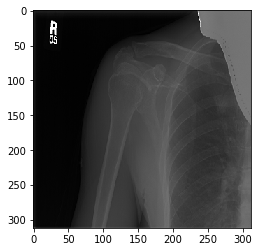

In [11]:
with h5py.File('Saved_Images.h5', 'r') as hf:
    plb.imshow(hf["X19"])
    print(hf["y23"].value)

[1]


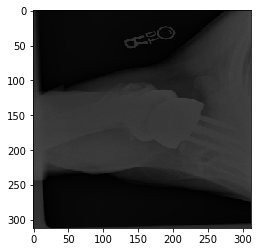

In [12]:
with h5py.File('Saved_Images.h5', 'r') as hf:
    plb.imshow(hf["X325"])
    print(hf["y325"].value)

[1]


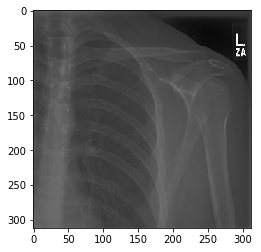

In [13]:
with h5py.File('Saved_Images.h5', 'r') as hf:
    plb.imshow(hf["X864"])
    print(hf["y864"].value)

[1]


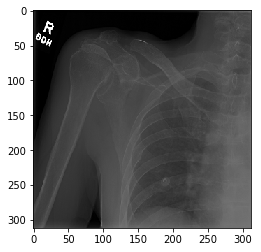

In [14]:
with h5py.File('Saved_Images.h5', 'r') as hf:
    plb.imshow(hf["X493"])
    print(hf["y493"].value)

[0]


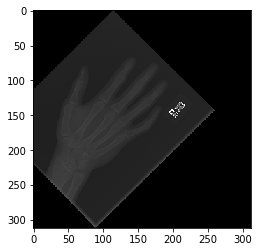

In [15]:
with h5py.File('Saved_Images.h5', 'r') as hf:
    plb.imshow(hf["X33323"])
    print(hf["y33323"].value)

In [16]:
hf

<Closed HDF5 file>